Task:

  A. Lakukan Proses Mining pada Data yang diberikan.

  B. Dari hasil A ada informasi/insight apa saja dari data yang bisa didapatkan.

  C Buat sebuah laporan/presentasi dari hasil B.


In [ ]:
#importing libraries
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

#from dtreeviz.trees import *
#import graphviz
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

# **IMPORTING DATASET**

In [ ]:
#load the data
!gdown 1UyBU6-ABIl0vSCSIEeaaIDmAAPCg3B1I

Downloading...
From: https://drive.google.com/uc?id=1UyBU6-ABIl0vSCSIEeaaIDmAAPCg3B1I
To: /content/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx
100% 110M/110M [00:04<00:00, 25.2MB/s]


In [ ]:
file = '/content/data_kesehatan-Mental-SRQ-2023--Filtered.xlsx'
df = pd.read_excel(file)
df.head()

# **PREPROCESSING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289801 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype  
---  ------                                                                                                             --------------   -----  
 0   ID                                                                                                                 289801 non-null  int64  
 1   WILAYAH                                                                                                            289801 non-null  object 
 2   JENIS KELAMIN                                                                                                      289801 non-null  object 
 3   USIA                                                                                                               289801 non-null  float64
 4   LAMA BERDINAS 

In [ ]:
#persentase missing values
(df.isnull().sum()/len(df)).to_frame('persentase missing values')

persentase missing values
ID                                                                   0.000000
WILAYAH                                                              0.000000
JENIS KELAMIN                                                        0.000000
USIA                                                                 0.000000
LAMA BERDINAS                                                        0.000000
...                                                                       ...
Berapa jarak tempat sampah dengan rumah saudara ?                    0.143716
Apakah di sekitar tempat tinggal Saudara tersed...                   0.000000
Kelompok Umur                                                        0.000000
NILAI IMT                                                            0.000024
IMT                                                                  0.000024

[79 rows x 1 columns]

In [ ]:
#tinggi badan, nilai IMT, sama IMT  didrop aja lah ya cuma 7 missing values
#trus yang di fill 0 sama - karena emg pertanyaan sebelumnya opsional dan pada jawab tidak jadi langsung dilongkapin
df['Jika Ya berapa jumlah gigi saudara yang Karies'].fillna(0, inplace=True)
df['Jika Ya, Berapa Batang Saudara merokok dalam sehari?'].fillna(0, inplace=True)
df['Berapa jarak tempat sampah dengan rumah saudara ?'].fillna("-", inplace=True)
columns_to_dropna = ['TINGGI BADAN', 'NILAI IMT', 'IMT']
df.dropna(subset=columns_to_dropna, inplace=True)

In [ ]:
(df.isnull().sum()/len(df)).to_frame('persentase missing values')

persentase missing values
ID                                                                        0.0
WILAYAH                                                                   0.0
JENIS KELAMIN                                                             0.0
USIA                                                                      0.0
LAMA BERDINAS                                                             0.0
...                                                                       ...
Berapa jarak tempat sampah dengan rumah saudara ?                         0.0
Apakah di sekitar tempat tinggal Saudara tersed...                        0.0
Kelompok Umur                                                             0.0
NILAI IMT                                                                 0.0
IMT                                                                       0.0

[79 rows x 1 columns]

In [ ]:
#ubah ke tipe numerik
df['TINGGI BADAN']=pd.to_numeric(df['TINGGI BADAN'], errors='coerce').astype(float)

#ubah ke tipe kategorik
object_columns = df.select_dtypes(include='object').columns.tolist()

df[object_columns] = df[object_columns].astype('category')
df["USIA"] = df["USIA"].astype("int64")
df["NILAI IMT"] = df["NILAI IMT"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289794 entries, 0 to 289800
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype   
---  ------                                                                                                             --------------   -----   
 0   ID                                                                                                                 289794 non-null  int64   
 1   WILAYAH                                                                                                            289794 non-null  category
 2   JENIS KELAMIN                                                                                                      289794 non-null  category
 3   USIA                                                                                                               289794 non-null  int64   
 4   LAMA BER

In [ ]:
#cek duplikasi
df.duplicated().sum()

0

In [ ]:
#statistika deskriptif
df.describe()

ID          USIA  LAMA BERDINAS   TINGGI BADAN  \
count  289794.000000  2.897940e+05   2.897940e+05  289794.000000   
mean   144904.495704  4.317345e+02   5.984529e+02     169.273921   
std     83656.473728  7.551583e+04   1.201636e+05       7.642022   
min         1.000000  1.500000e+01   0.000000e+00       1.640000   
25%     72456.250000  2.900000e+01   9.000000e+00     167.000000   
50%    144904.500000  3.800000e+01   1.800000e+01     170.000000   
75%    217352.750000  4.400000e+01   2.300000e+01     172.000000   
max    289801.000000  2.309198e+07   3.101201e+07    1799.000000   

         BERAT BADAN  LINGKAR PINGGANG      NILAI IMT  
count  289794.000000     289794.000000  289794.000000  
mean       96.177134         65.558365      50.528637  
std       887.922487        188.432564    2100.095194  
min         1.000000        -75.000000       0.367309  
25%        66.000000         36.000000      23.306680  
50%        72.000000         73.000000      25.099502  
75%        80.000000         84.000000      27.548209  
max     90210.000000     100000.000000  318877.551020

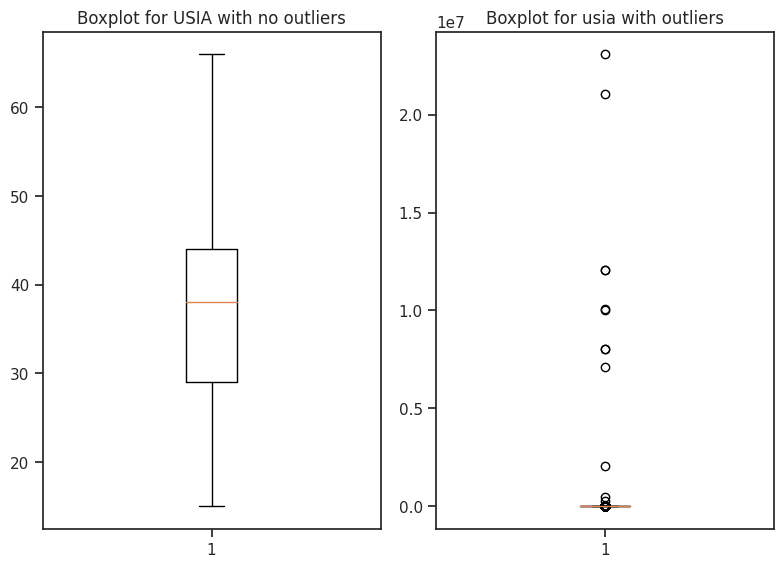

In [ ]:
#menghapus outlier dari variabel usia
Q1 = df['USIA'].quantile(0.25)
Q3 = df['USIA'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier dalam setiap kolom
outliers = ((df['USIA'] < lower_bound) | (df['USIA'] > upper_bound))

noout_df = df[~outliers]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(noout_df['USIA'])
plt.title('Boxplot for USIA with no outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df['USIA'])
plt.title('Boxplot for usia with outliers')

plt.tight_layout()
plt.show()

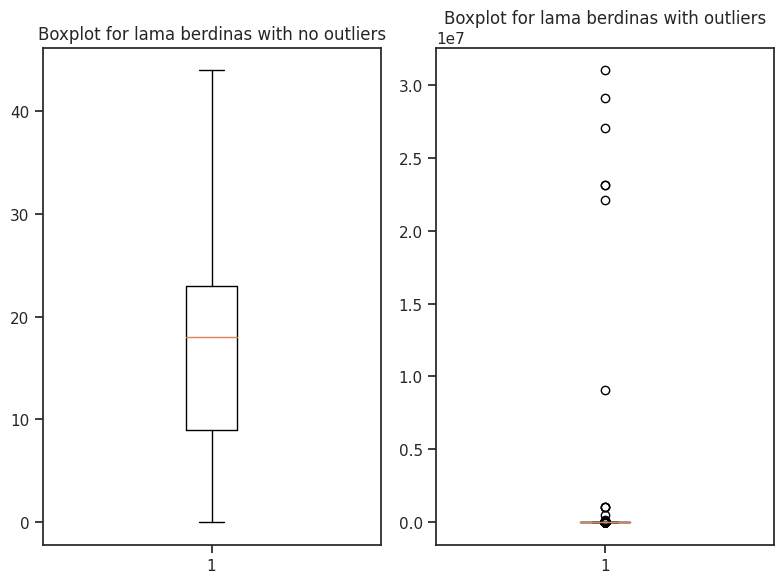

In [ ]:
#menghapus outlier dari variabel lama berdinas
Q1 = df['LAMA BERDINAS'].quantile(0.25)
Q3 = df['LAMA BERDINAS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier dalam setiap kolom
outliers = ((df['LAMA BERDINAS'] < lower_bound) | (df['LAMA BERDINAS'] > upper_bound))


noout_df = noout_df[~outliers]
#menghapus nilai-nilai yang tidak masuk akal
noout_df = noout_df[~((noout_df["LAMA BERDINAS"] == noout_df["USIA"]) | (noout_df["LAMA BERDINAS"] > noout_df["USIA"]))]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(noout_df['LAMA BERDINAS'])
plt.title('Boxplot for lama berdinas with no outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df['LAMA BERDINAS'])
plt.title('Boxplot for lama berdinas with outliers')

plt.tight_layout()
plt.show()

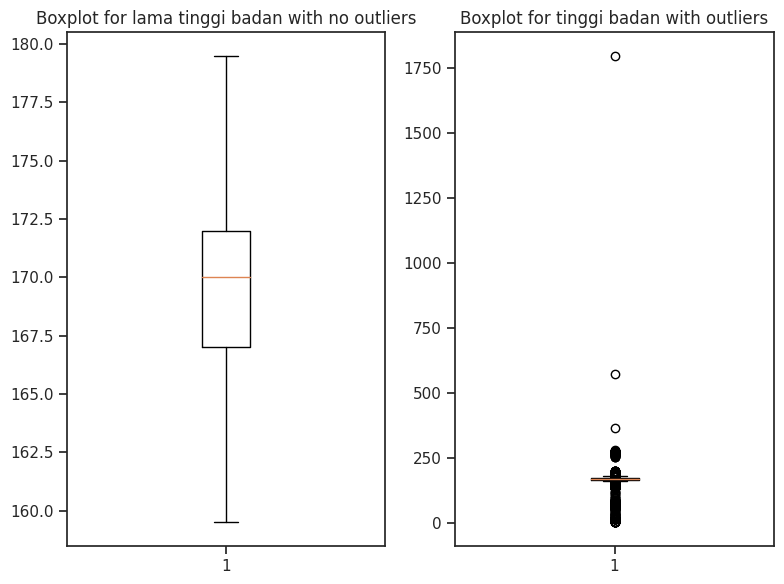

In [ ]:
#menghapus outlier dari variabel tinggi badan
Q1 = df['TINGGI BADAN'].quantile(0.25)
Q3 = df['TINGGI BADAN'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier dalam setiap kolom
outliers = ((df['TINGGI BADAN'] < lower_bound) | (df['TINGGI BADAN'] > upper_bound))

noout_df = noout_df[~outliers]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(noout_df['TINGGI BADAN'])
plt.title('Boxplot for lama tinggi badan with no outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df['TINGGI BADAN'])
plt.title('Boxplot for tinggi badan with outliers')

plt.tight_layout()
plt.show()

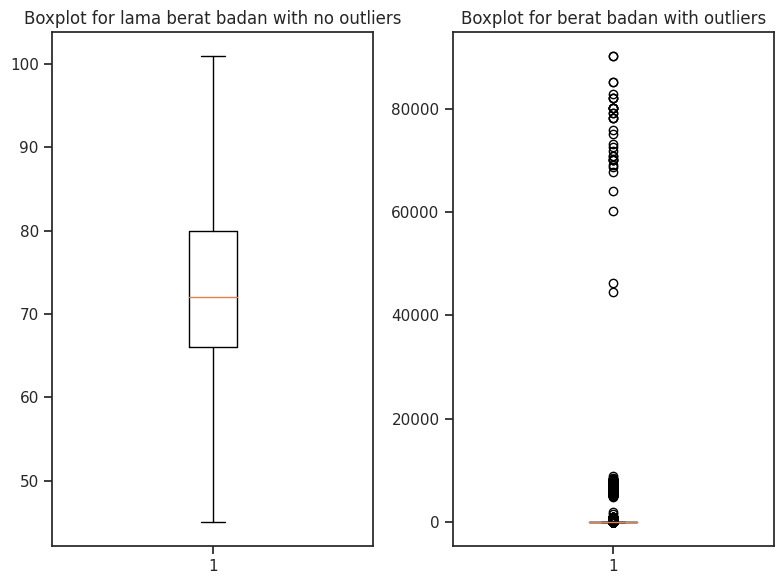

In [ ]:
#menghapus outlier dari variabel berat badan
Q1 = df['BERAT BADAN'].quantile(0.25)
Q3 = df['BERAT BADAN'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier dalam setiap kolom
outliers = ((df['BERAT BADAN'] < lower_bound) | (df['BERAT BADAN'] > upper_bound))

noout_df=noout_df[~outliers]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(noout_df['BERAT BADAN'])
plt.title('Boxplot for lama berat badan with no outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df['BERAT BADAN'])
plt.title('Boxplot for berat badan with outliers')

plt.tight_layout()
plt.show()

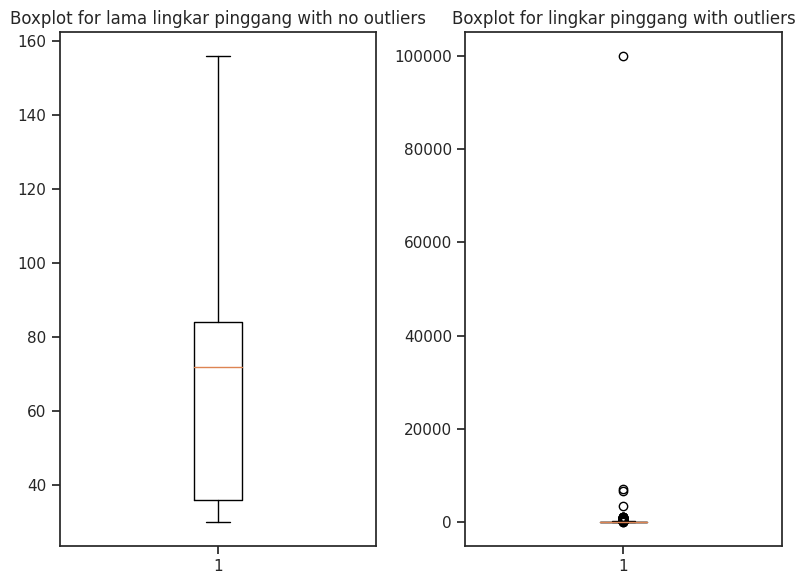

In [ ]:
#menghapus outlier dari variabel lingkar pinggang
Q1 = df['LINGKAR PINGGANG'].quantile(0.25)
Q3 = df['LINGKAR PINGGANG'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier dalam setiap kolom
outliers = ((df['LINGKAR PINGGANG'] < lower_bound) | (df['LINGKAR PINGGANG'] > upper_bound))

noout_df = noout_df[~outliers]
#menghapus nilai-nilai yang tidak masuk akal
noout_df = noout_df[noout_df["LINGKAR PINGGANG"] >= 30]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(noout_df['LINGKAR PINGGANG'])
plt.title('Boxplot for lama lingkar pinggang with no outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df['LINGKAR PINGGANG'])
plt.title('Boxplot for lingkar pinggang with outliers')

plt.tight_layout()
plt.show()

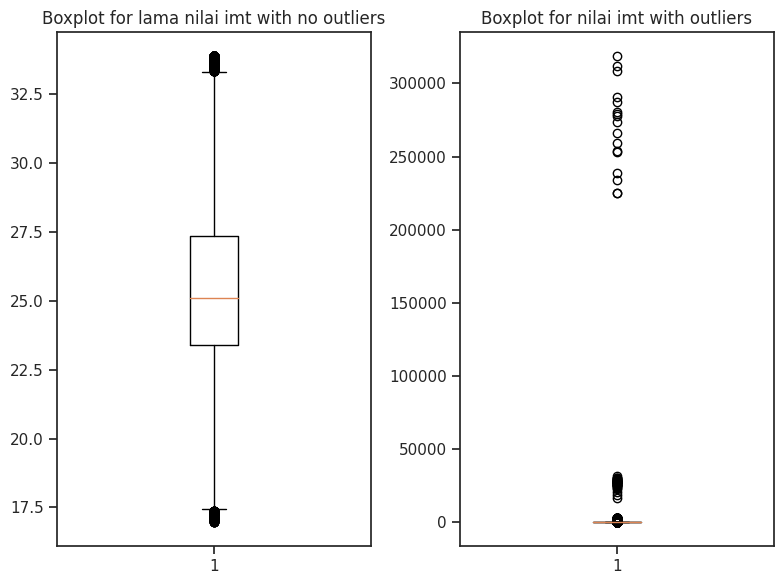

In [ ]:
#menghapus outlier dari variabel nilai imt
Q1 = df['NILAI IMT'].quantile(0.25)
Q3 = df['NILAI IMT'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier dalam setiap kolom
outliers = ((df['NILAI IMT'] < lower_bound) | (df['NILAI IMT'] > upper_bound))

noout_df=noout_df[~outliers]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.boxplot(noout_df['NILAI IMT'])
plt.title('Boxplot for lama nilai imt with no outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df['NILAI IMT'])
plt.title('Boxplot for nilai imt with outliers')

plt.tight_layout()
plt.show()

In [ ]:
##statistika deskriptif
noout_df.describe()

ID           USIA  LAMA BERDINAS   TINGGI BADAN  \
count  263396.000000  263396.000000  263396.000000  263396.000000   
mean   146429.177338      36.973333      16.648378     169.436554   
std     81401.893769       9.718081       9.063071       3.821249   
min         1.000000      15.000000       0.000000     159.500000   
25%     75985.750000      29.000000       9.000000     167.000000   
50%    146181.500000      38.000000      18.000000     170.000000   
75%    216370.250000      44.000000      23.000000     172.000000   
max    289800.000000      66.000000      44.000000     179.500000   

         BERAT BADAN  LINGKAR PINGGANG      NILAI IMT  
count  263396.000000     263396.000000  263396.000000  
mean       72.877042         64.888145      25.369528  
std         9.035740         24.521839       2.908864  
min        45.000000         30.000000      16.955017  
25%        66.000000         36.000000      23.384354  
50%        72.000000         72.000000      25.099502  
75%        80.000000         83.000000      27.358845  
max       101.000000        156.000000      33.910035

In [ ]:
noout_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263396 entries, 0 to 289799
Data columns (total 79 columns):
 #   Column                                                                                                             Non-Null Count   Dtype   
---  ------                                                                                                             --------------   -----   
 0   ID                                                                                                                 263396 non-null  int64   
 1   WILAYAH                                                                                                            263396 non-null  category
 2   JENIS KELAMIN                                                                                                      263396 non-null  category
 3   USIA                                                                                                               263396 non-null  int64   
 4   LAMA BER

## **FEATURE ENGINEERING**

In [ ]:
#ubah indikator kesehatan mental ke numerik
mapping_dict = {'Tidak': 0, 'Kadang - kadang': 1, 'Ya': 2}


columns_to_encode = noout_df.columns[31:51]

noout_df[columns_to_encode] = noout_df[columns_to_encode].replace(mapping_dict)

#total skor kesehatan mental
noout_df["skor_kesehatan_mental"] = noout_df[columns_to_encode].sum(axis=1)

In [ ]:
#bikin variabel baru untuk kategori kesehatan mental
#kriteria dibagi 3
def health(value):
  if value <= 13:
    return "sehat"
  elif value <= 27:
    return "kurang sehat"
  else:
    return "tidak sehat"

noout_df["kategori kesehatan mental"] = noout_df["skor_kesehatan_mental"].apply(health)
noout_df["kategori kesehatan mental"]=noout_df["kategori kesehatan mental"].astype("category")
noout_df["kategori kesehatan mental"]= noout_df["kategori kesehatan mental"].cat.set_categories(["tidak sehat", "kurang sehat", "sehat"], ordered=True)
noout_df.head()

ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0   1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1   2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2   3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3   4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
4   5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   

   TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  ...  \
0         168.9         85.0             100.0           Menikah  ...   
1         169.5         70.0              80.0           Menikah  ...   
2         169.5         60.0              78.0     Belum Menikah  ...   
3         166.8         80.0              34.0           Menikah  ...   
4         164.5         62.0              32.0           Menikah  ...   

  Berapa jarak jamban dengan sumur dirumah saudara ?  \
0                                Lebih dari 12 meter   
1                                Lebih dari 12 meter   
2                        Tidak memiliki jamban sehat   
3                        Tidak memiliki jamban sehat   
4                                Lebih dari 12 meter   

  Bagaimana saluran pembuangan air (sanitasi) rumah tangga?  \
0                                                Ada          
1                                                Ada          
2                                                Ada          
3                                                Ada          
4                                                Ada          

  Apakah terdapat tempat sampah di sekitar rumah?   \
0                                     Ada, terbuka   
1                                    Ada, tertutup   
2                                        Tidak ada   
3                                    Ada, tertutup   
4                                    Ada, tertutup   

  Berapa jarak tempat sampah dengan rumah saudara ?  \
0                               Lebih dari 10 meter   
1                               Lebih dari 10 meter   
2                                                 -   
3                               Lebih dari 10 meter   
4                               Lebih dari 10 meter   

  Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?  \
0                                          Tidak ada                                                             
1                                          Tidak ada                                                             
2                                          Tidak ada                                                             
3                                          Tidak ada                                                             
4                                                Ada                                                             

  Kelompok Umur  NILAI IMT       IMT skor_kesehatan_mental  \
0       25 - 34  29.796114  Obesitas                     1   
1       35 - 44  24.364563    Normal                     0   
2       15 - 24  20.883912    Normal                     2   
3       35 - 44  28.753975  Obesitas                     0   
4       25 - 34  22.911836    Normal                     1   

  kategori kesehatan mental  
0                     sehat  
1                     sehat  
2                     sehat  
3                     sehat  
4                     sehat  

[5 rows x 81 columns]

In [ ]:
print(noout_df.groupby(['kategori kesehatan mental'])['kategori kesehatan mental'].count())

kategori kesehatan mental
tidak sehat        165
kurang sehat      3457
sehat           259774
Name: kategori kesehatan mental, dtype: int64


In [ ]:
#saving the dataset
from google.colab import files

noout_df.to_csv('preprocessed.csv', sep=',', index=False)

# EDA

## Visualisasi subtema Identitas

In [ ]:
noout_df.iloc[:, 1:11].head()

WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
4  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   

   TINGGI BADAN  BERAT BADAN  LINGKAR PINGGANG Status Perkawinan  \
0         168.9         85.0             100.0           Menikah   
1         169.5         70.0              80.0           Menikah   
2         169.5         60.0              78.0     Belum Menikah   
3         166.8         80.0              34.0           Menikah   
4         164.5         62.0              32.0           Menikah   

         PENGELUARAN/BULAN  
0  Rp. 7 Juta s.d. 10 Juta  
1   Rp. 2 Juta s.d. 6 Juta  
2   Rp. 2 Juta s.d. 6 Juta  
3  Rp. 7 Juta s.d. 10 Juta  
4   Rp. 2 Juta s.d. 6 Juta

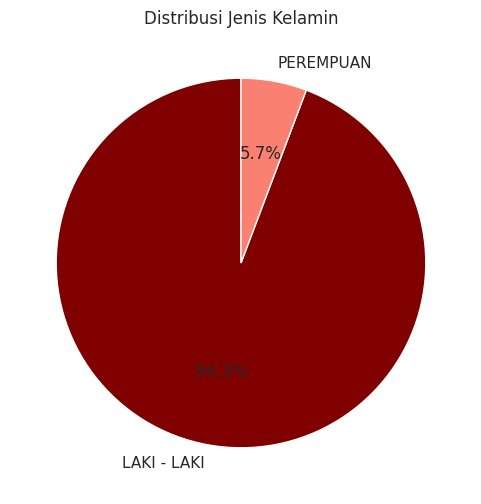

In [ ]:
#Visualisasi Persebaran Jenis Kelamin

jeniskelamin_counts = noout_df['JENIS KELAMIN'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(jeniskelamin_counts, labels=jeniskelamin_counts.index, autopct='%1.1f%%', startangle=90, colors=['maroon', 'salmon'])
plt.title('Distribusi Jenis Kelamin')
plt.show()

Didapati mayoritas (94.3%) dari responden berjenis kelamin laki-laki

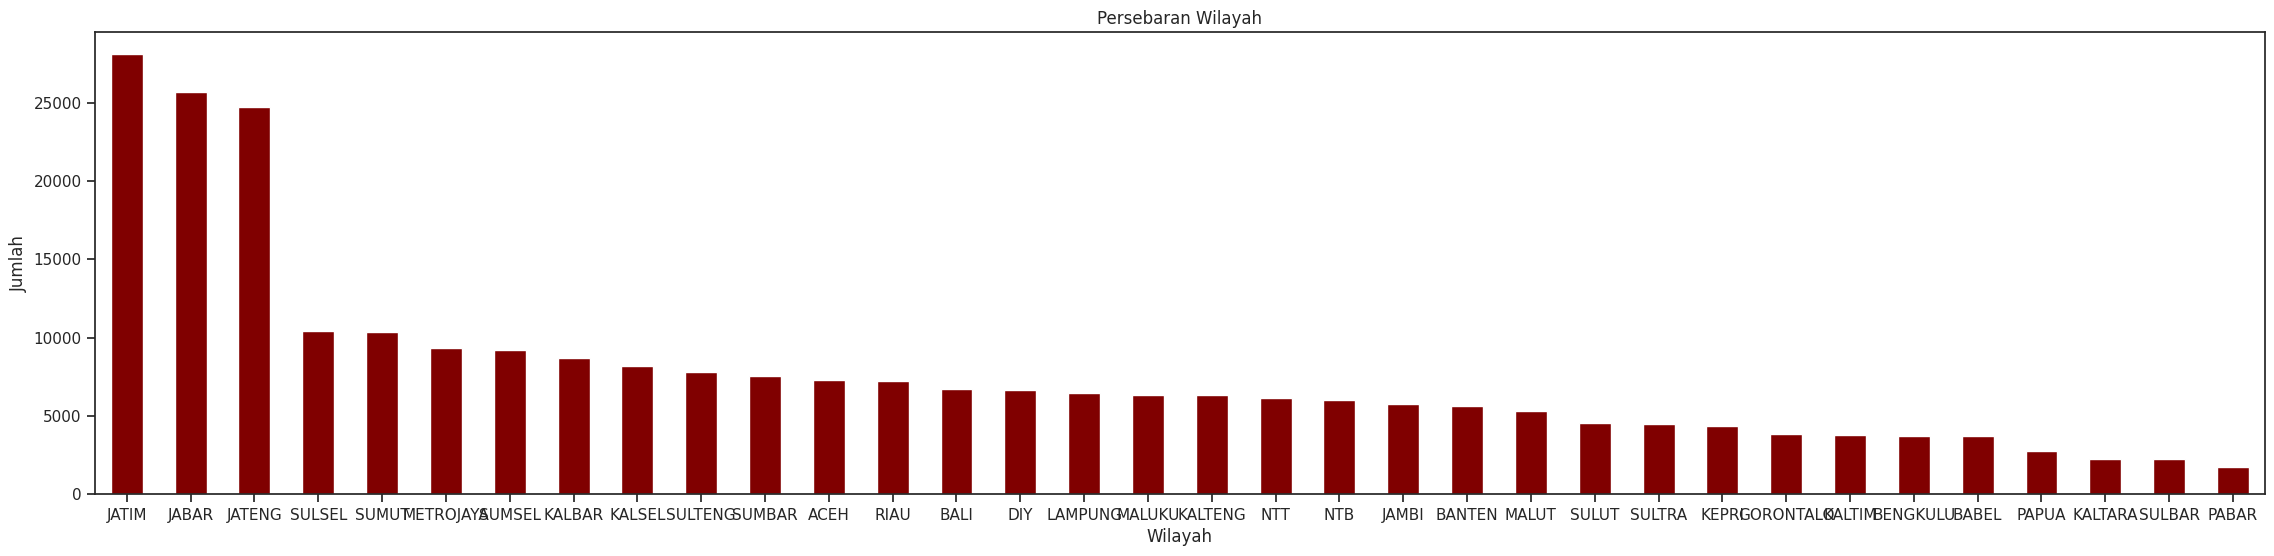

In [ ]:
#Visualisasi Persebaran Wilayah

wilayah_counts = noout_df['WILAYAH'].value_counts()

fig, ax_wilayah = plt.subplots(figsize=(28, 6))
wilayah_counts.plot(kind='bar', color='maroon', ax=ax_wilayah)
plt.title('Persebaran Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')
ax_wilayah.set_xticklabels(ax_wilayah.get_xticklabels(), rotation=0)
plt.show()

Didapati bahwa mayoritas responden berasal dari wilayah Jawa Timur. Jumlah responden paling sedikit berasal dari Papua Barat

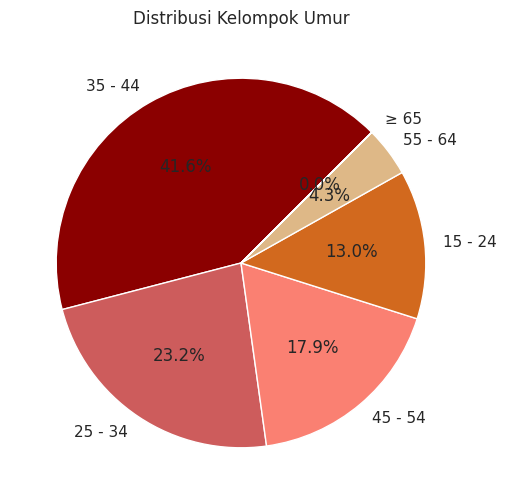

In [ ]:
#Visualisasi Distribusi Kelompok Umur

kelumur_counts = noout_df['Kelompok Umur'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(kelumur_counts, labels=kelumur_counts.index, autopct='%1.1f%%', startangle=45, colors=['darkred','indianred','salmon','chocolate','burlywood'])
plt.title('Distribusi Kelompok Umur')
plt.show()

Mayoritas responden berasal dari kelompok umur 35-44 tahun dan paling sedikit berasal dari kelompok umur >= 65 tahun.

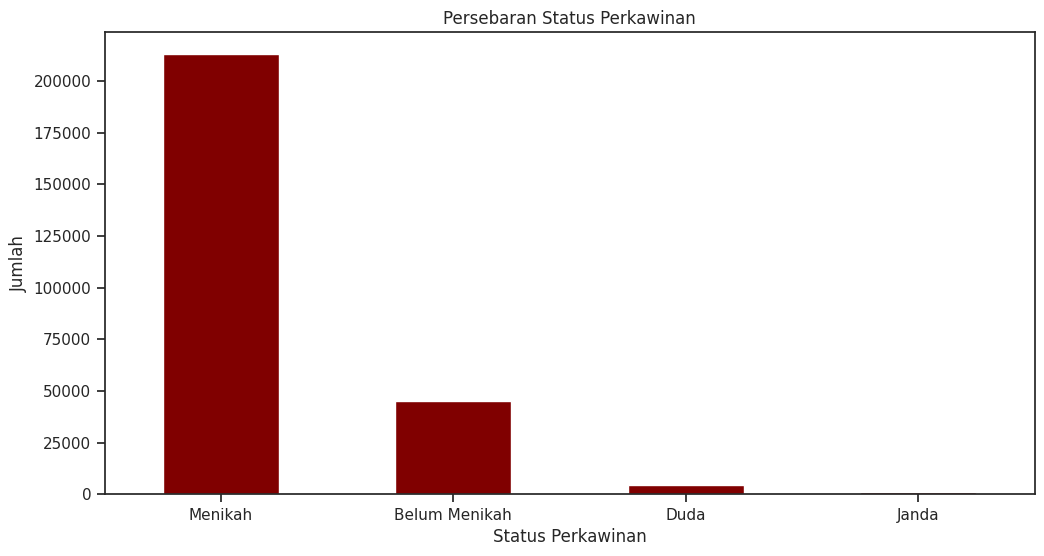

In [ ]:
#Visualisasi Persebaran Status Perkawinan

perkawinan_counts = noout_df['Status Perkawinan'].value_counts()

plt.figure(figsize=(12, 6))
ax_perkawinan = perkawinan_counts.plot(kind='bar', color='maroon')
plt.title('Persebaran Status Perkawinan')
plt.xlabel('Status Perkawinan')
plt.ylabel('Jumlah')
ax_perkawinan.set_xticklabels(ax_perkawinan.get_xticklabels(), rotation=0)
plt.show()

Mayoritas dari responden memiliki status sedang menikah.

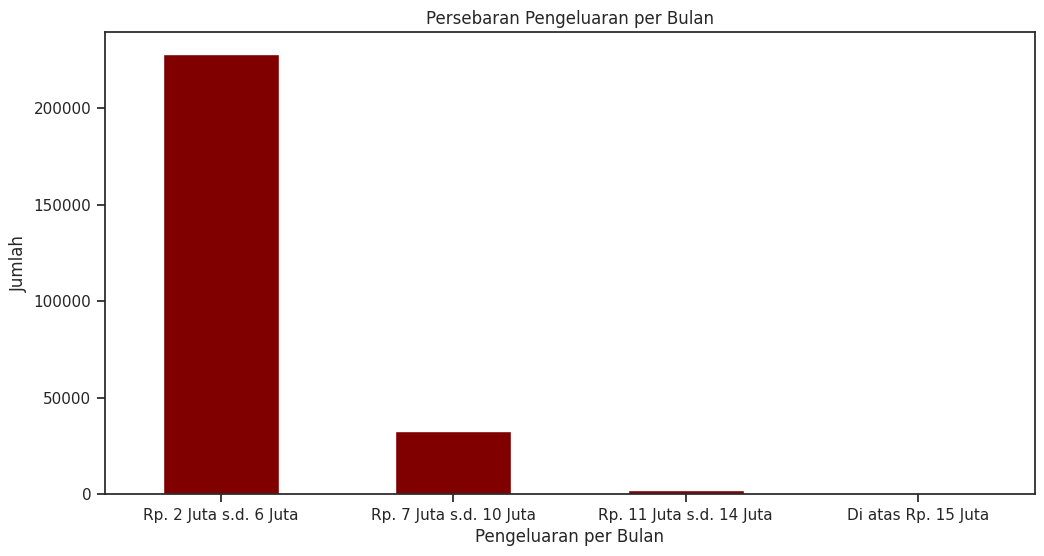

In [ ]:
#Visualisasi Persebaran Pengeluaran per Bulan

pengeluaran_counts = noout_df['PENGELUARAN/BULAN'].value_counts()

plt.figure(figsize=(12, 6))
ax_pengeluaran = pengeluaran_counts.plot(kind='bar', color='maroon')
plt.title('Persebaran Pengeluaran per Bulan')
plt.xlabel('Pengeluaran per Bulan')
plt.ylabel('Jumlah')
ax_pengeluaran.set_xticklabels(ax_pengeluaran.get_xticklabels(), rotation=0)
plt.show()

Mayoritas responden memiliki pengeluaran per bulan sebesar 2-6 juta rupiah. Hampir tidak terdapat responden yang memiliki pengeluaran di atas 15 juta rupiah per bulan.

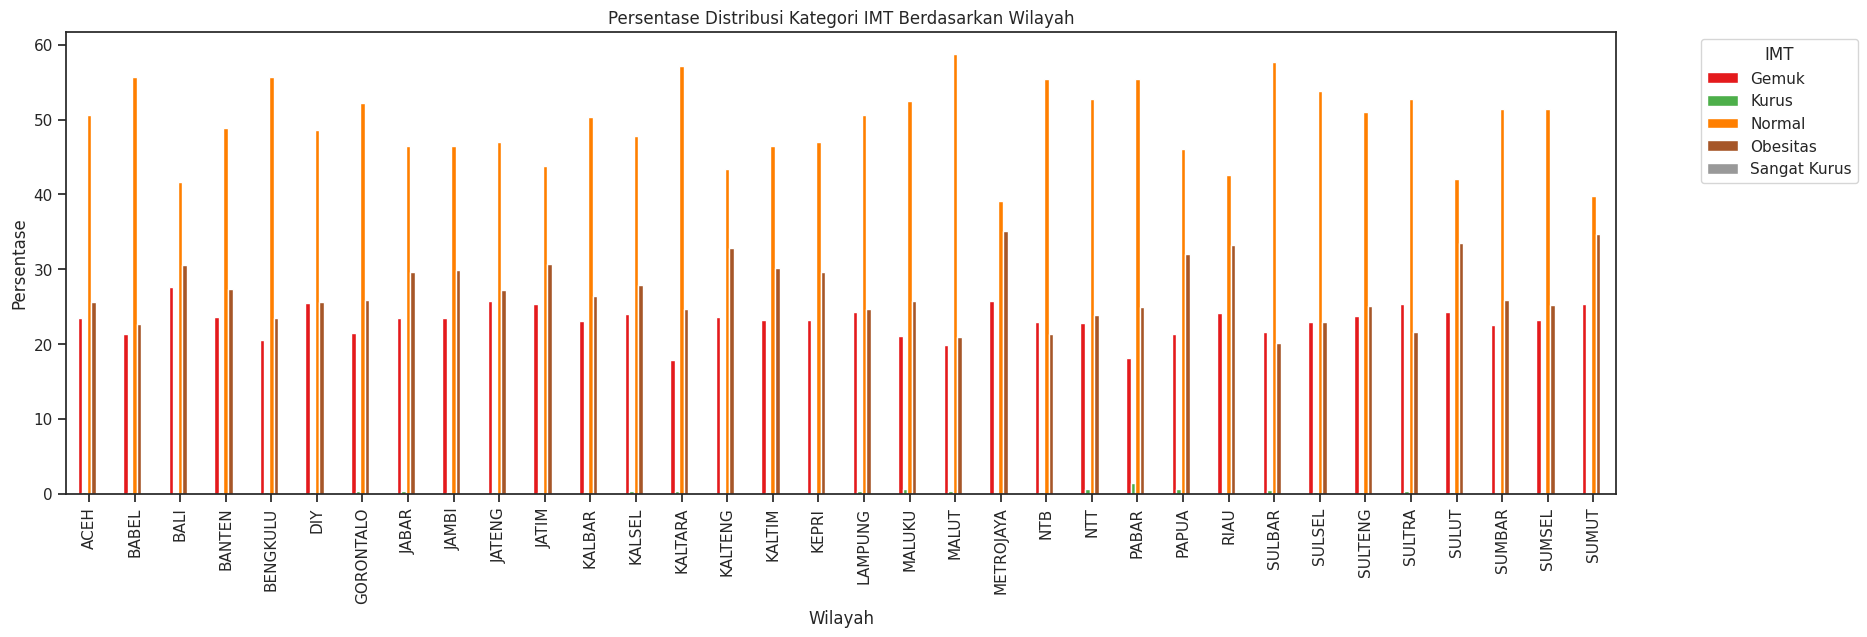

In [ ]:
#Visualisasi Persentase Distribusi Kategori IMT Berdasarkan Wilayah

imtwil_percentage = noout_df.groupby(['WILAYAH', 'IMT']).size().unstack(fill_value=0)
imtwil_percentage = imtwil_percentage.div(imtwil_percentage.sum(axis=1), axis=0) * 100

imtwil_percentage.plot(kind='bar', stacked=False, colormap='Set1', figsize=(20, 6))

plt.title('Persentase Distribusi Kategori IMT Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Persentase')

plt.legend(title='IMT', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Wilayah yang memiliki persentase kategori obesitas tertinggi adalah Metrojaya, Sumatera Utara, dan Sulawesi Utara. Wilayah dengan persentase kategori kurus tertinggi adalah Papua Barat dan Papua.

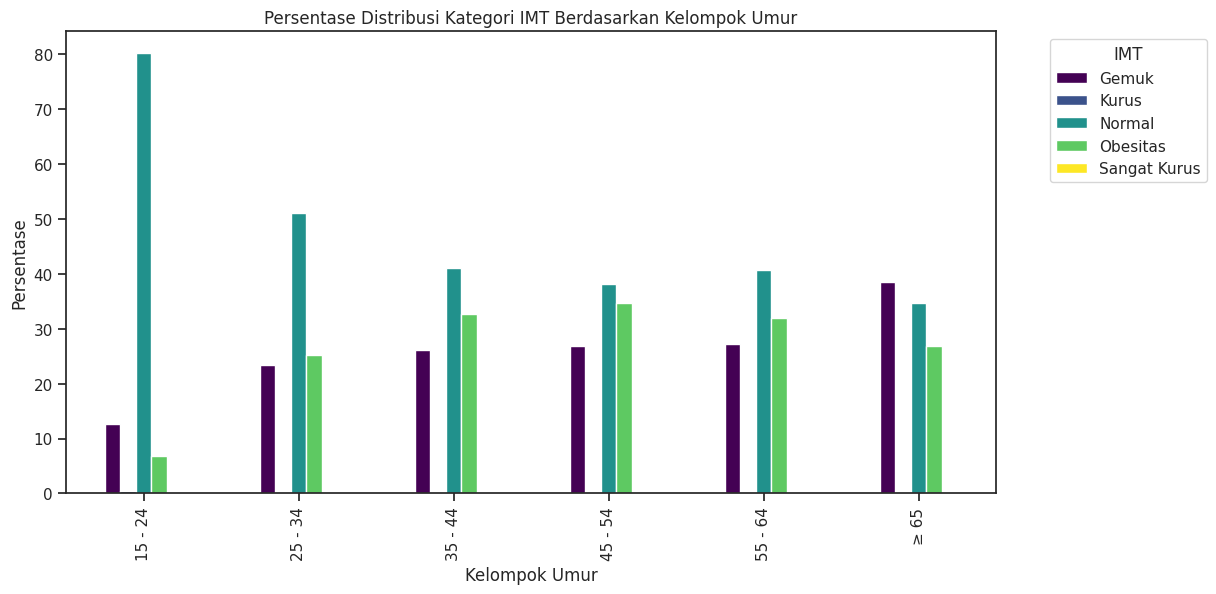

In [ ]:
#Visualisasi Persentase Distribusi Kategori IMT Berdasarkan Kelompok Umur

imtusia_percentage = noout_df.groupby(['Kelompok Umur', 'IMT']).size().unstack(fill_value=0)
imtusia_percentage = imtusia_percentage.div(imtusia_percentage.sum(axis=1), axis=0) * 100

imtusia_percentage.plot(kind='bar', stacked=False, colormap='viridis', figsize=(12, 6))

plt.title('Persentase Distribusi Kategori IMT Berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Persentase')

plt.legend(title='IMT', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Seiring seseorang bertambah umur, kecenderungan ia untuk masuk dalam kategori 'Gemuk' bertambah.

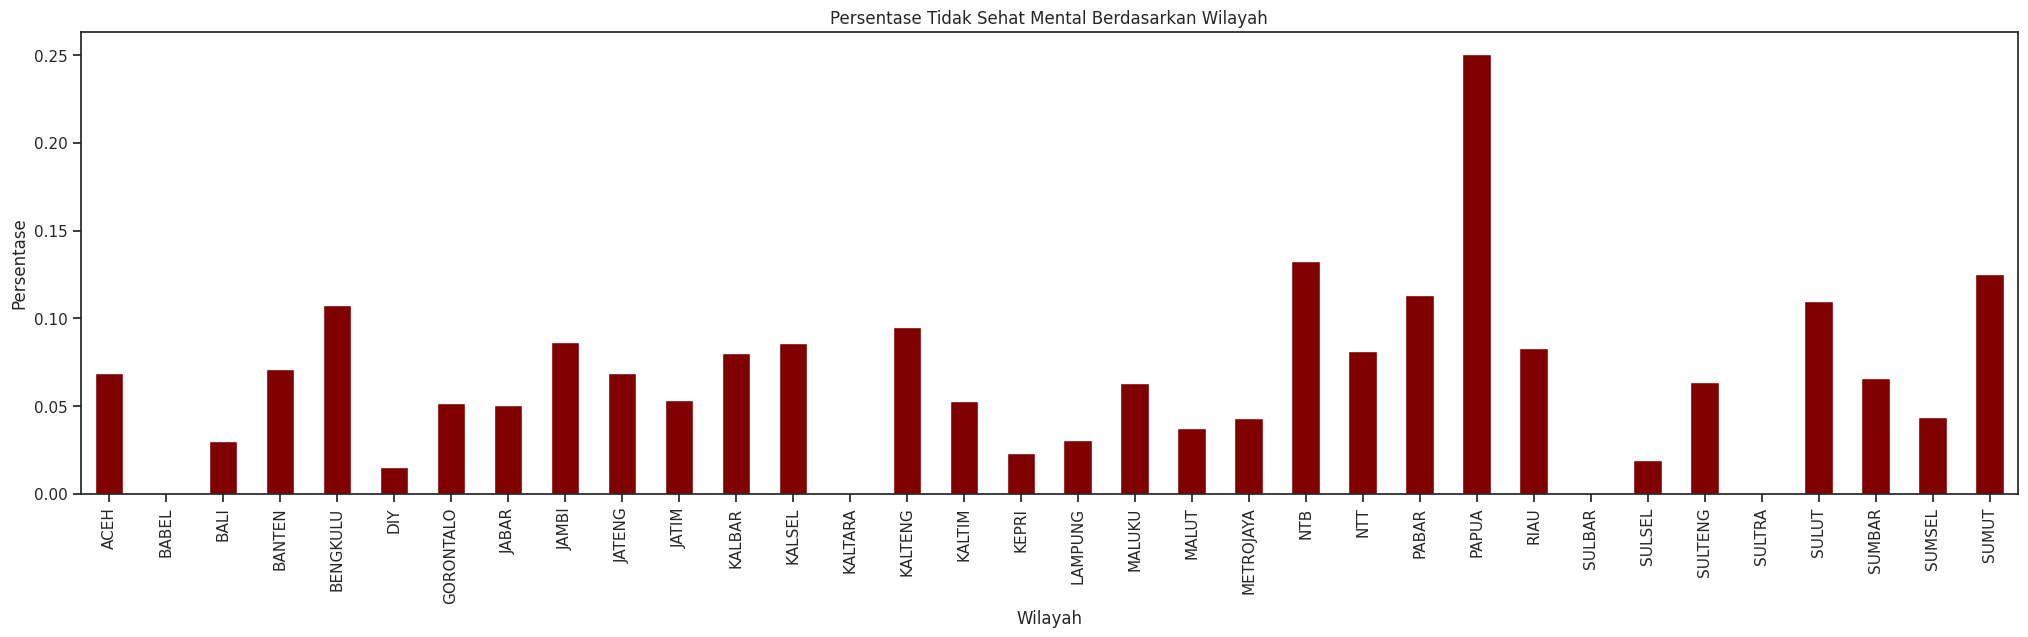

In [ ]:
#Visualisasi Persentase Tidak Sehat Mental Berdasarkan Wilayah

tidaksehat_percentage = noout_df[noout_df['kategori kesehatan mental']=='tidak sehat'].groupby('WILAYAH').size()/noout_df.groupby('WILAYAH').size() * 100
tidaksehat_percentage.plot(kind='bar', color='maroon', figsize=(25, 6))
plt.title('Persentase Tidak Sehat Mental Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Persentase')
plt.show()

Wilayah dengan persentase kesehatan mental kategori 'tidak sehat' tertinggi adalah Papua.

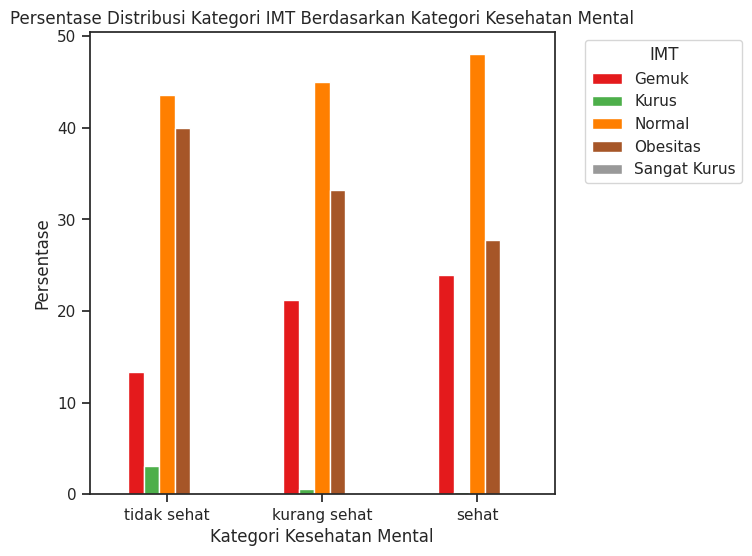

In [ ]:
#Visualisasi Persentase Distribusi Kategori IMT Berdasarkan Kategori Kesehatan Mental

imtkesehatan_percentage = noout_df.groupby(['kategori kesehatan mental', 'IMT']).size().unstack(fill_value=0)
imtkesehatan_percentage = imtkesehatan_percentage.div(imtkesehatan_percentage.sum(axis=1), axis=0) * 100

order = ['tidak sehat','kurang sehat','sehat']

ax =imtkesehatan_percentage.loc[order].plot(kind='bar', stacked=False, colormap='Set1', figsize=(6, 6))

plt.title('Persentase Distribusi Kategori IMT Berdasarkan Kategori Kesehatan Mental')
plt.xlabel('Kategori Kesehatan Mental')
plt.ylabel('Persentase')

plt.legend(title='IMT', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Semakin sehat mental seseorang, semakin rendah kecenderungannya untuk menjadi obesitas. Namun, semakin tinggi kecenderungannya untuk menjadi gemuk.

## Visualisasi subtema riwayat penyakit

In [ ]:
noout_df.iloc[:, 11:30].head()

Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?  \
0                                              Tidak                    
1                                              Tidak                    
2                                              Tidak                    
3                                              Tidak                    
4                                              Tidak                    

  Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?  \
0                                              Tidak                             
1                                              Tidak                             
2                                              Tidak                             
3                                              Tidak                             
4                                              Tidak                             

  Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?  \
0                                              Tidak                       
1                                              Tidak                       
2                                              Tidak                       
3                                              Tidak                       
4                                              Tidak                       

  Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?  \
0                                              Tidak                   
1                                              Tidak                   
2                                              Tidak                   
3                                              Tidak                   
4                                              Tidak                   

  Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?  \
0                                              Tidak                  
1                                              Tidak                  
2                                              Tidak                  
3                                              Tidak                  
4                                              Tidak                  

  Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?  \
0                                              Tidak                          
1                                              Tidak                          
2                                              Tidak                          
3                                              Tidak                          
4                                              Tidak                          

  Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?  \
0                                                 Ya                    
1                                              Tidak                    
2                                              Tidak                    
3                                              Tidak                    
4                                              

PENYAKIT JANTUNG

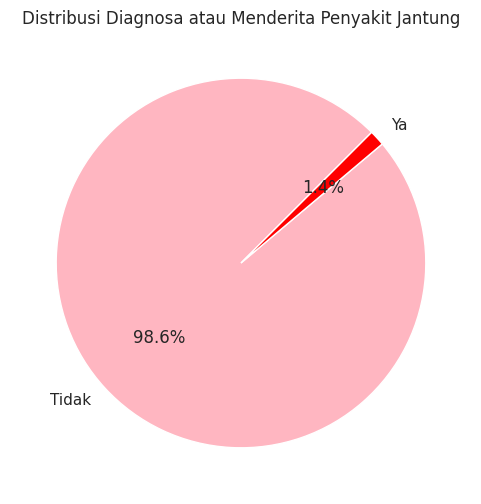

In [ ]:
penyakitjantung_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitjantung_counts, labels=penyakitjantung_counts.index, autopct='%1.1f%%', startangle=45, colors=['Lightpink','Red','Yellow'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Jantung')
plt.show()

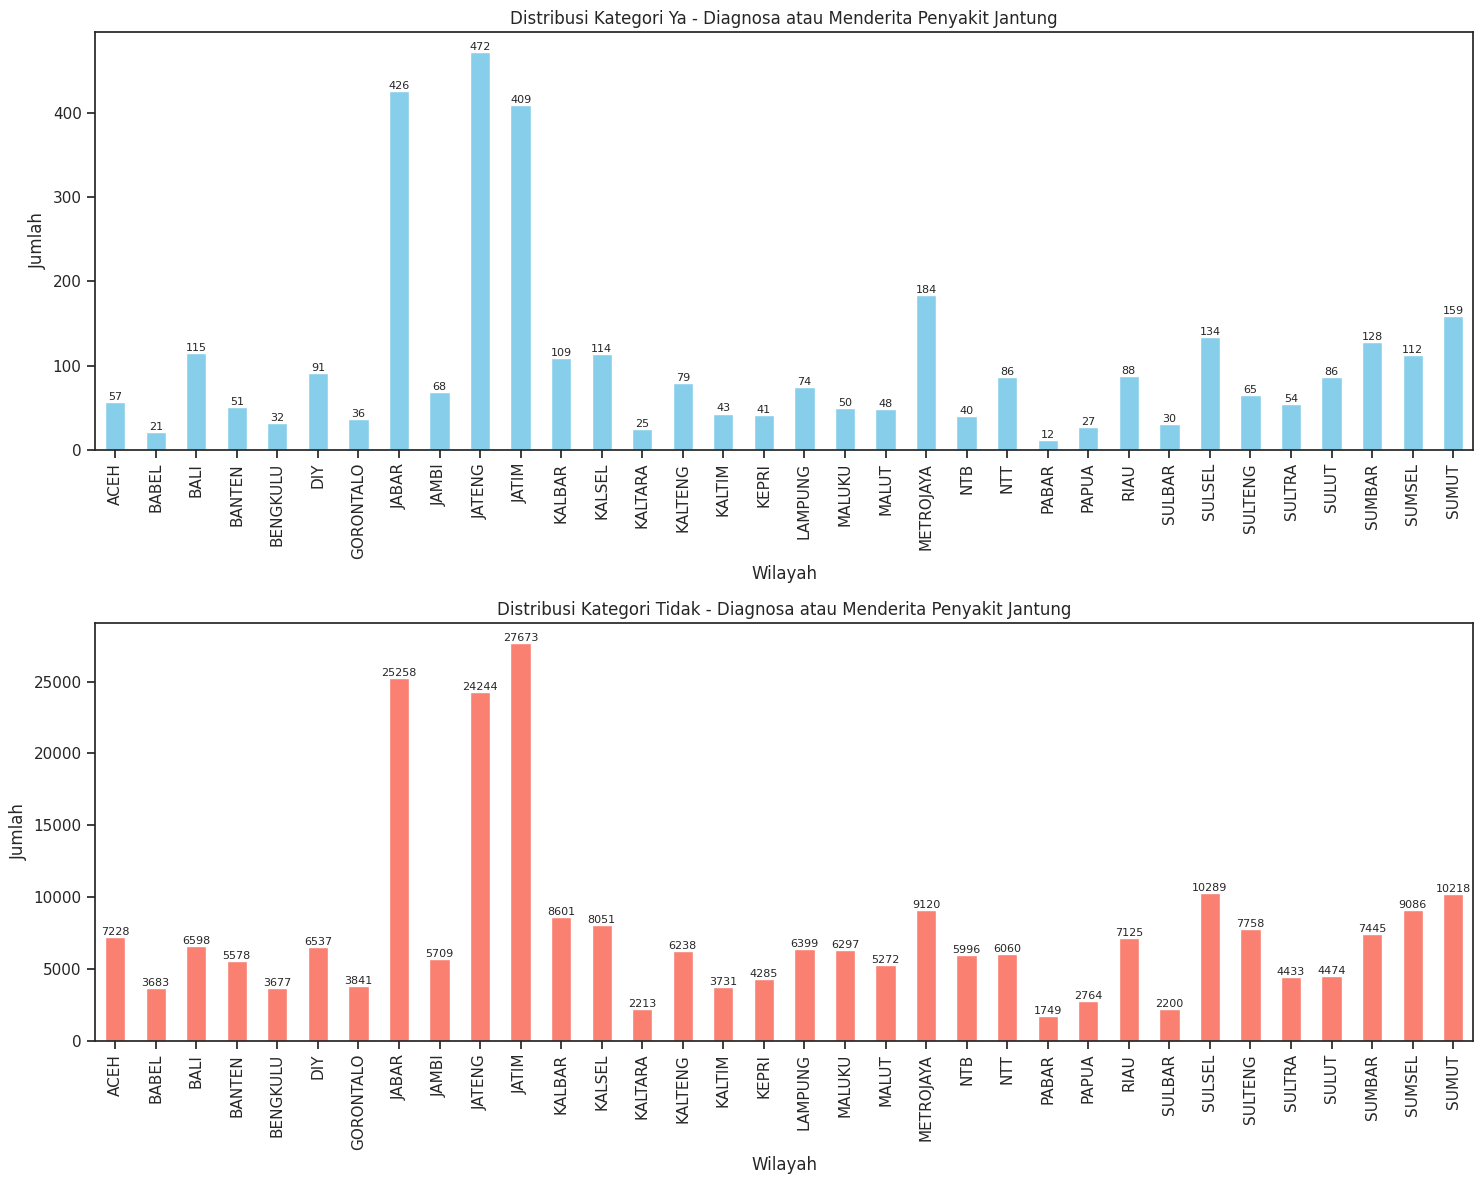

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Jantung')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Jantung')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

PENYAKIT STROKE

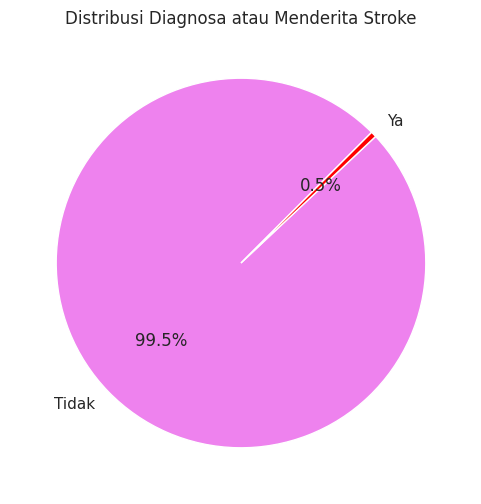

In [ ]:
penyakitstroke_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitstroke_counts, labels=penyakitstroke_counts.index, autopct='%1.1f%%', startangle=45, colors=['Violet','Red','Yellow'])
plt.title('Distribusi Diagnosa atau Menderita Stroke')
plt.show()

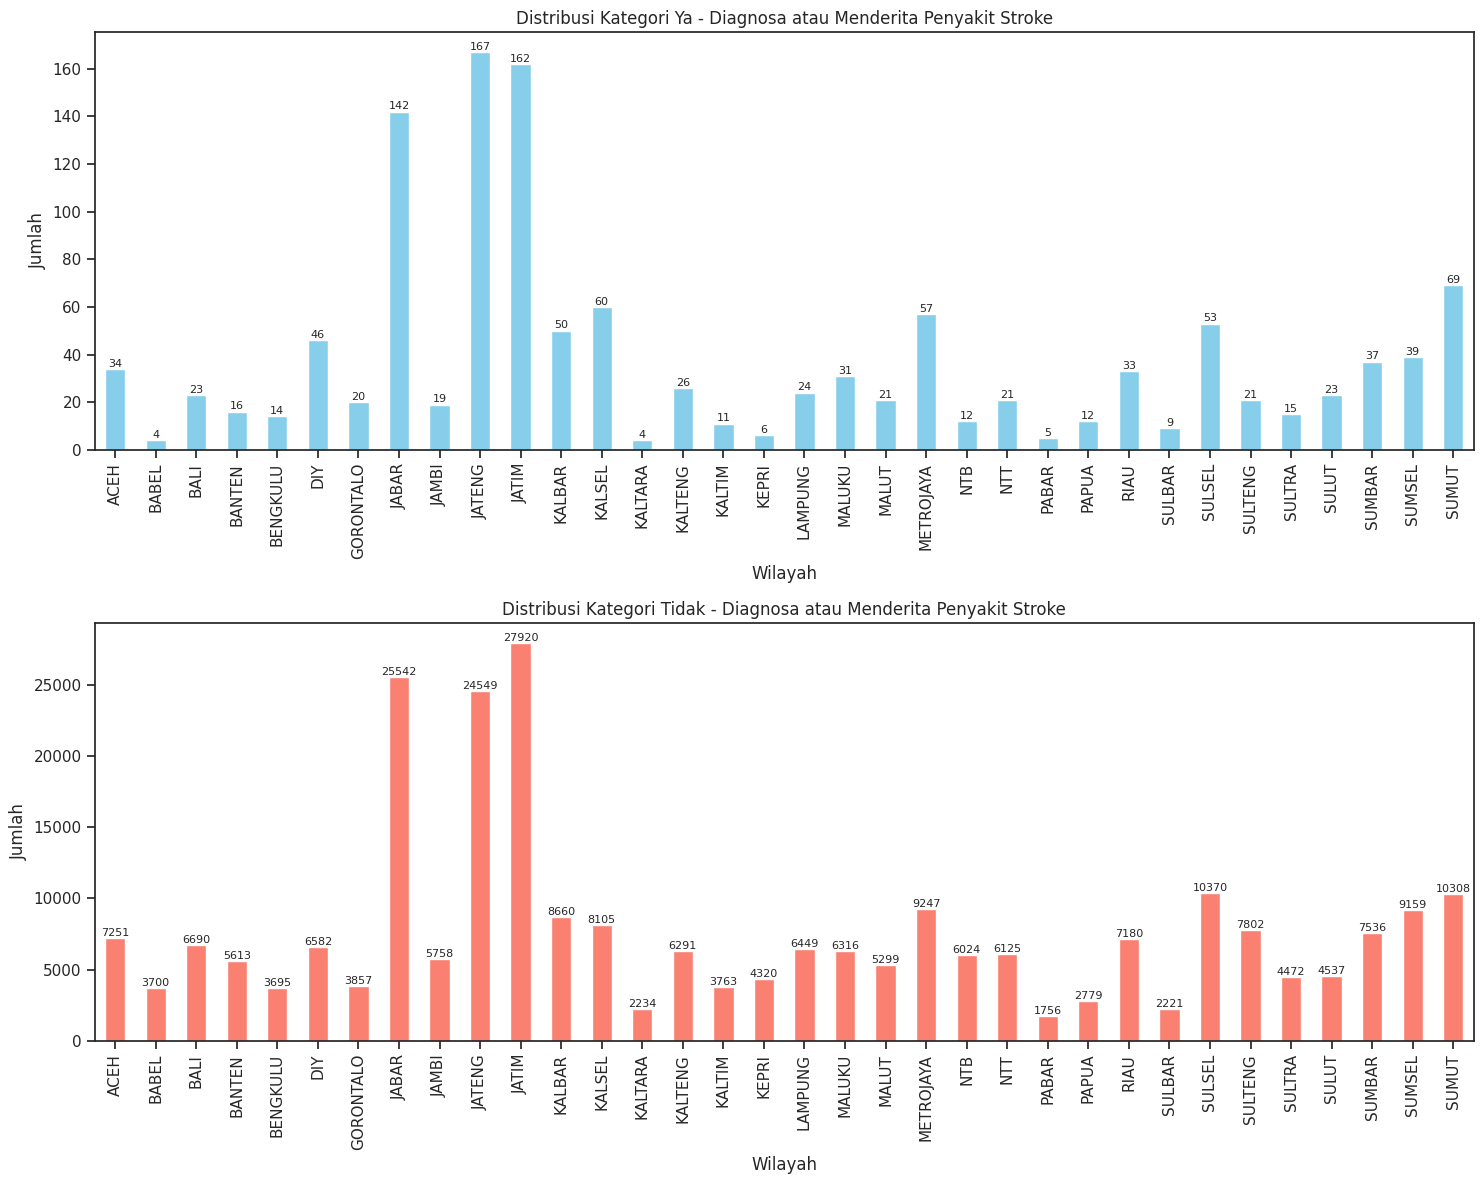

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Stroke')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Stroke')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

DIABETES MELITUS

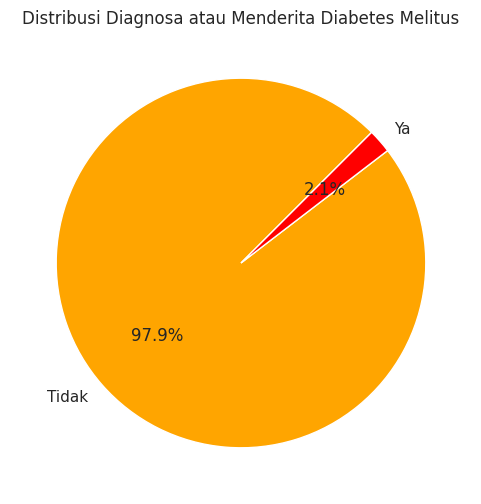

In [ ]:
penyakitdiabetes_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitdiabetes_counts, labels=penyakitdiabetes_counts.index, autopct='%1.1f%%', startangle=45, colors=['Orange','Red','Yellow'])
plt.title('Distribusi Diagnosa atau Menderita Diabetes Melitus')
plt.show()

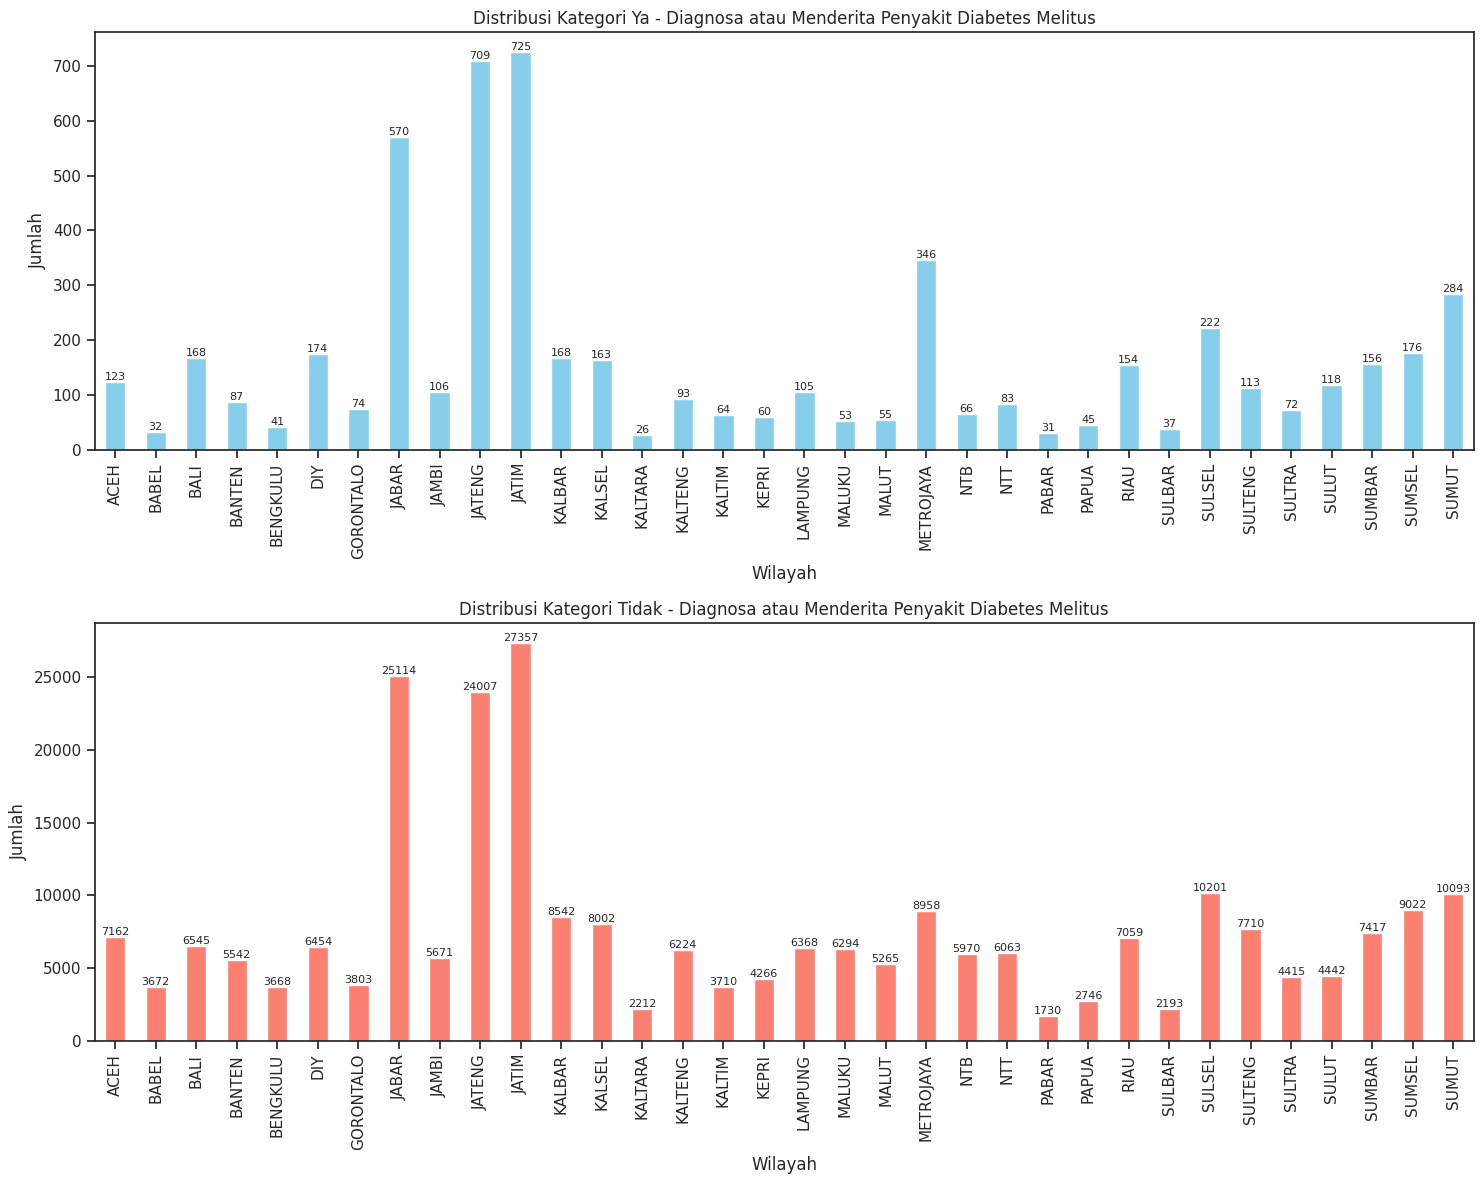

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Diabetes Melitus')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Diabetes Melitus')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

HIPERTENSI

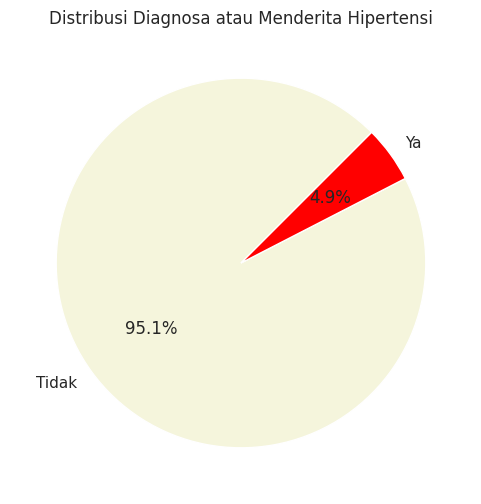

In [ ]:
penyakithipertensi_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakithipertensi_counts, labels=penyakithipertensi_counts.index, autopct='%1.1f%%', startangle=45, colors=['Beige','Red','Yellow'])
plt.title('Distribusi Diagnosa atau Menderita Hipertensi')
plt.show()

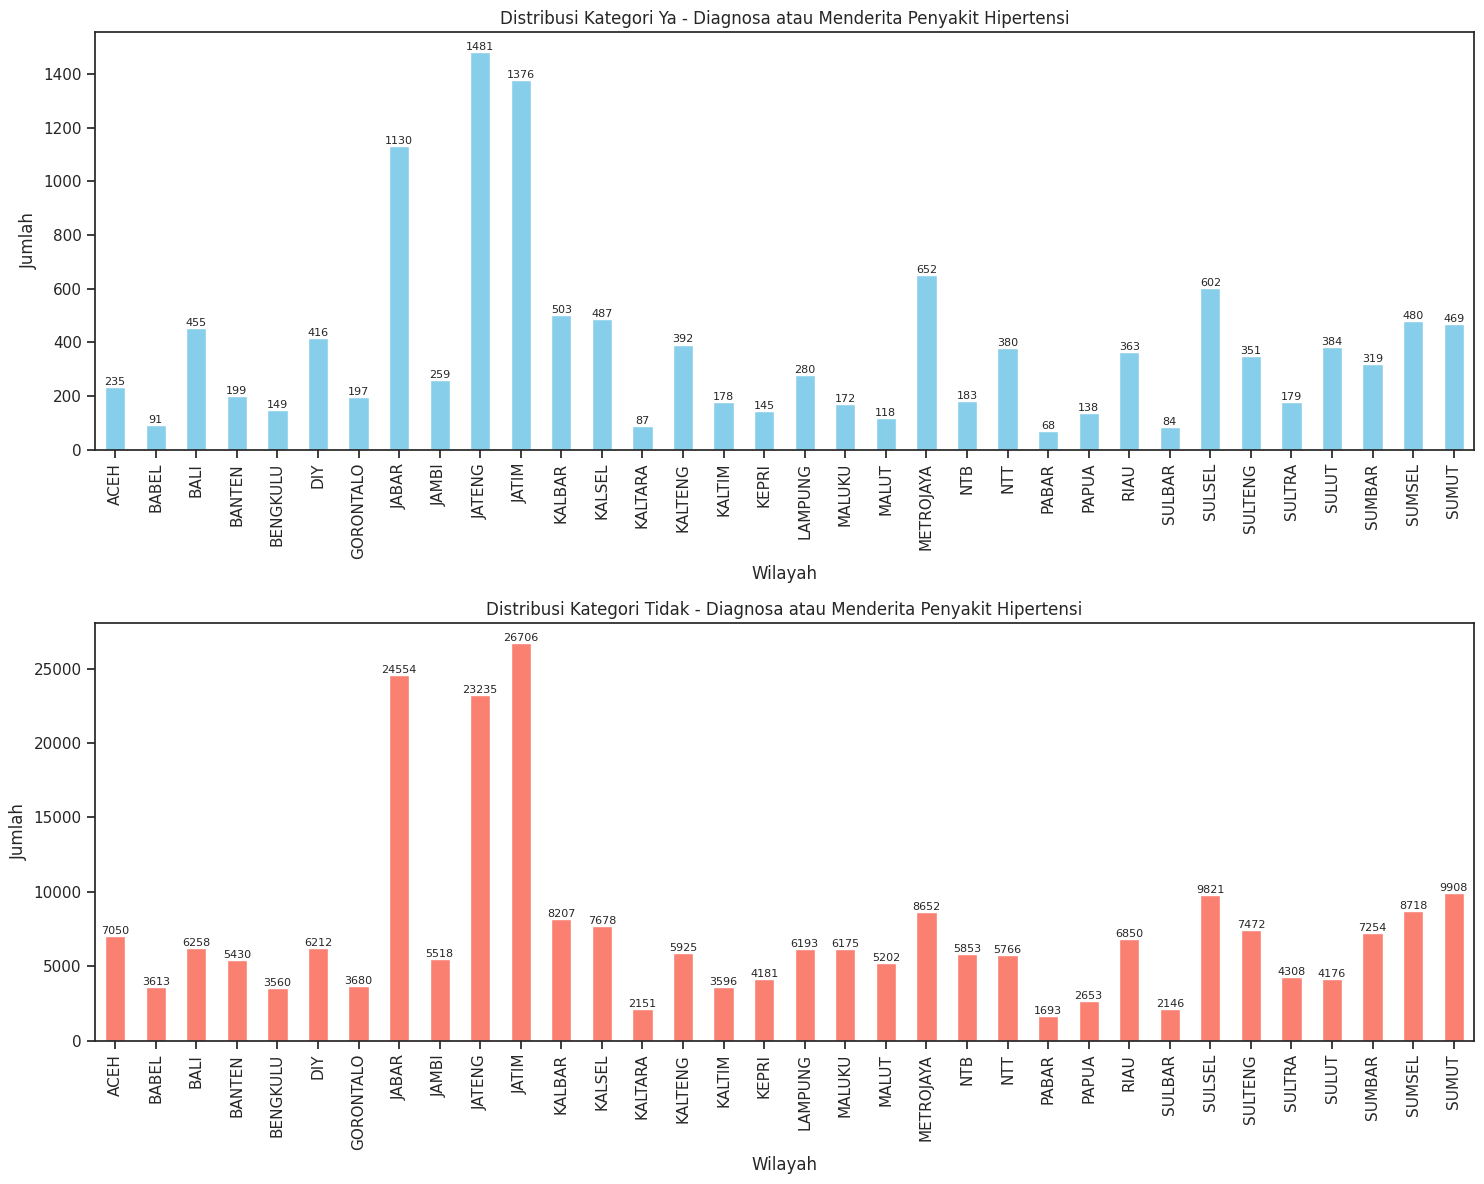

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Hipertensi')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Hipertensi')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

KANKER

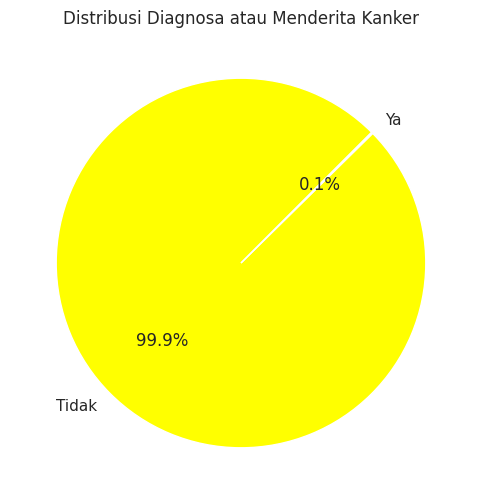

In [ ]:
penyakitkanker_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitkanker_counts, labels=penyakitkanker_counts.index, autopct='%1.1f%%', startangle=45, colors=['Yellow','Red'])
plt.title('Distribusi Diagnosa atau Menderita Kanker')
plt.show()

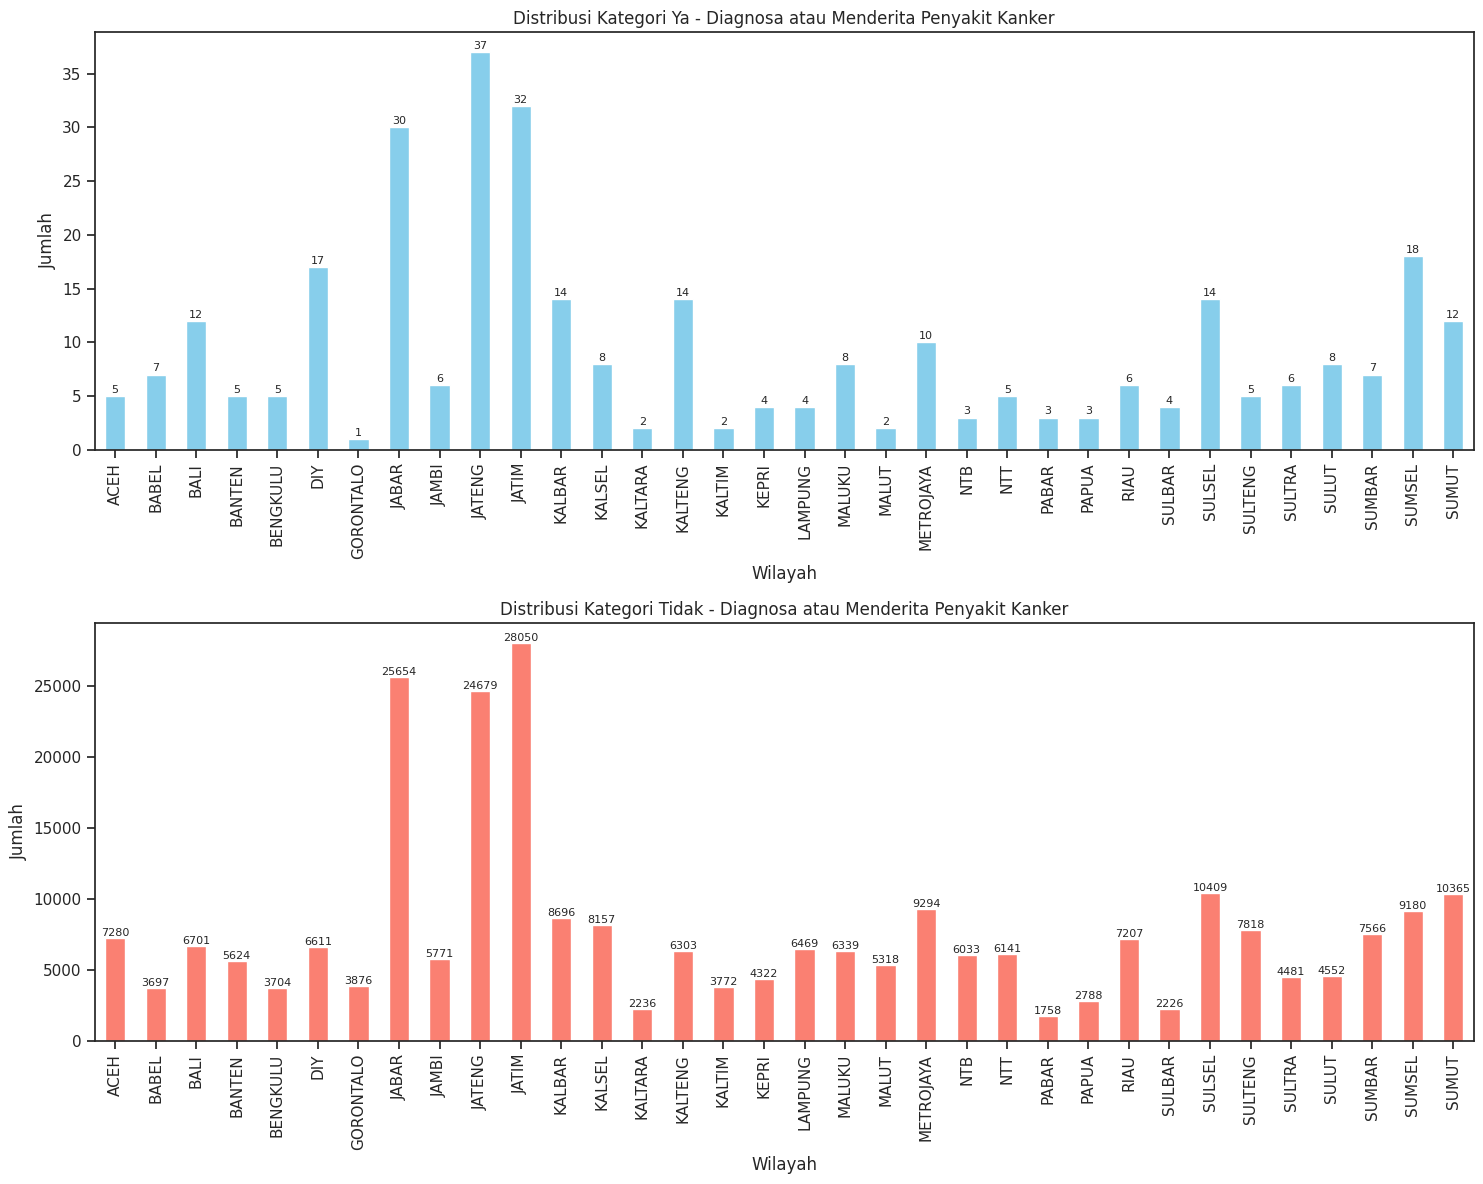

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Kanker')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Kanker')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

GINJAL

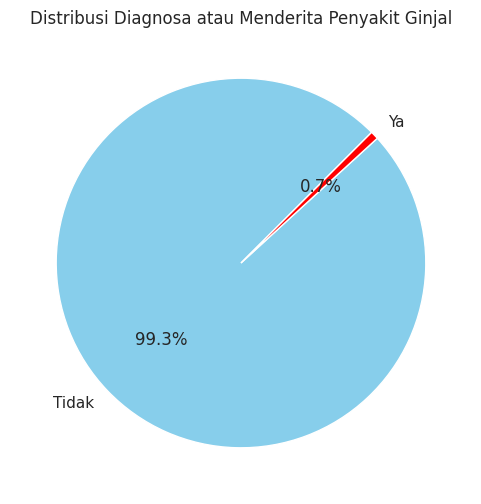

In [ ]:
penyakitginjal_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitginjal_counts, labels=penyakitginjal_counts.index, autopct='%1.1f%%', startangle=45, colors=['SkyBlue','Red','Yellow'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Ginjal')
plt.show()

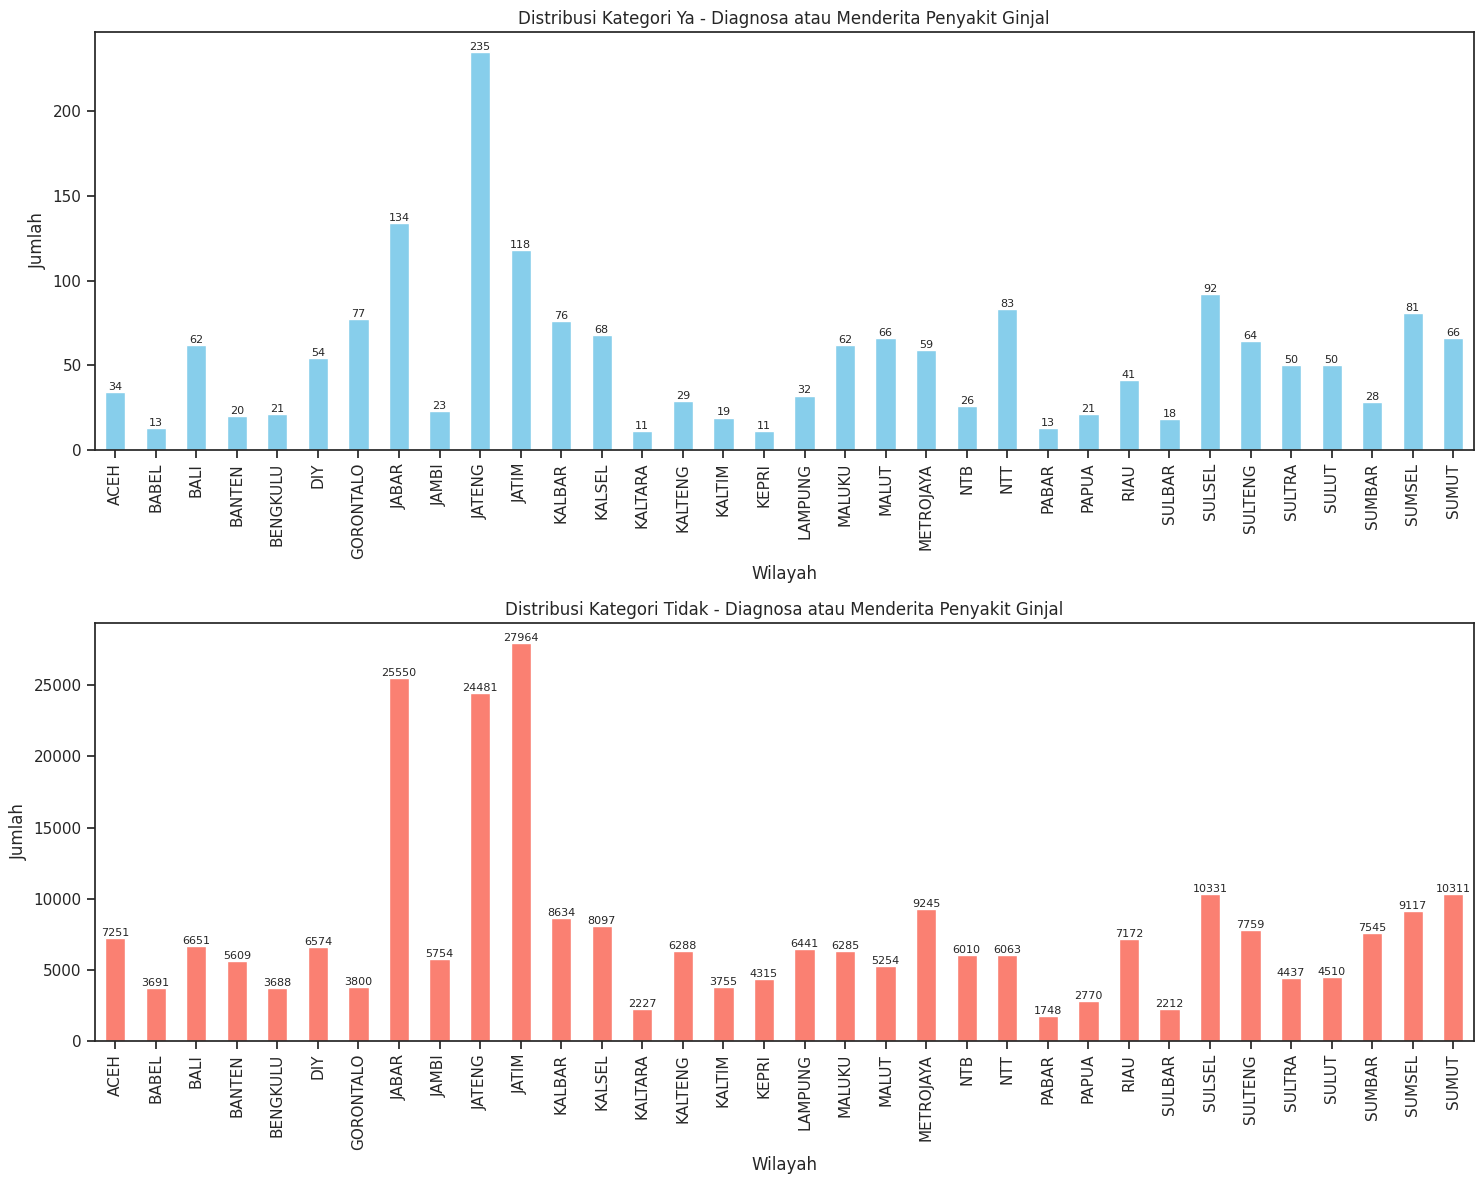

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Ginjal')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Ginjal')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

TUMOR

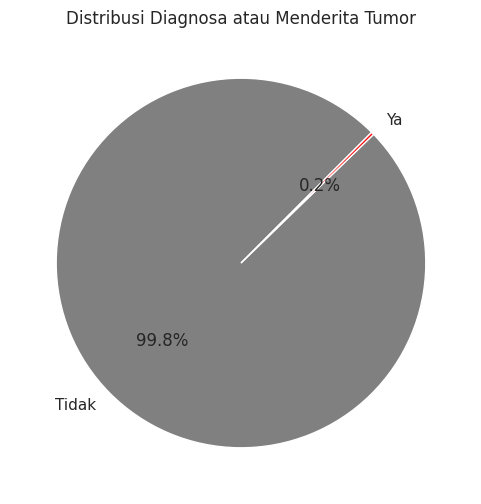

In [ ]:
penyakittumor_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakittumor_counts, labels=penyakittumor_counts.index, autopct='%1.1f%%', startangle=45, colors=['Gray','Red'])
plt.title('Distribusi Diagnosa atau Menderita Tumor')
plt.show()

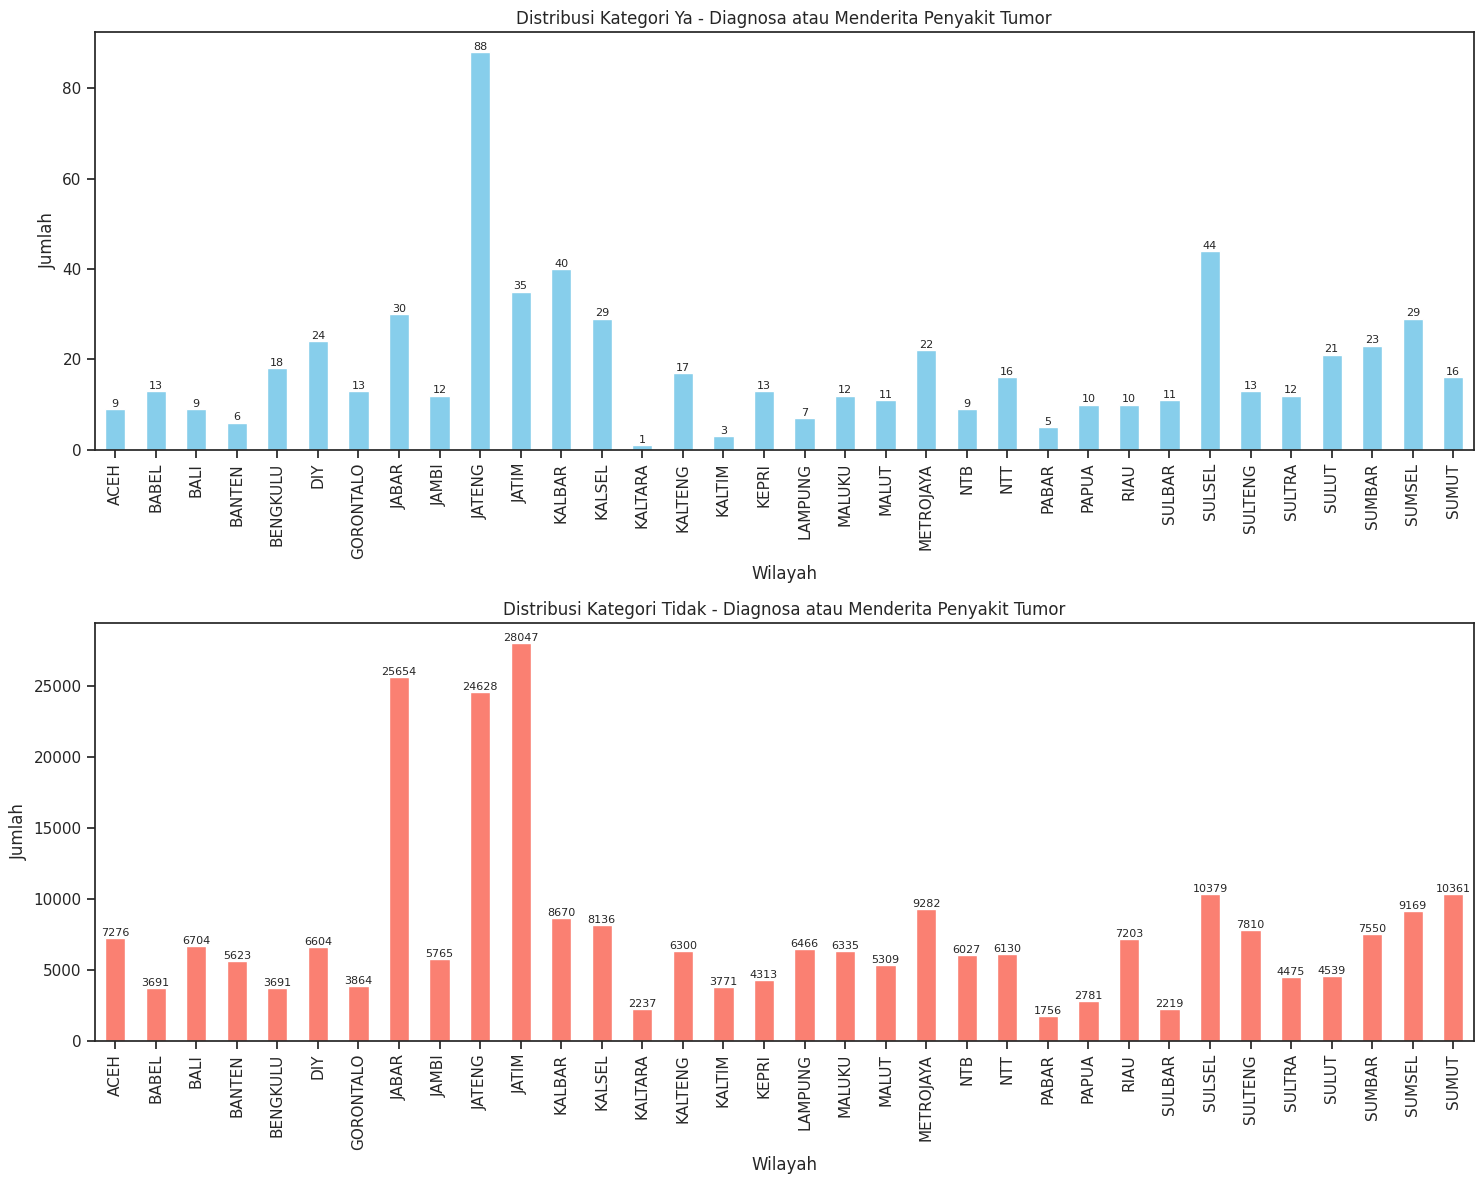

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Tumor')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Tumor')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

OSTEOARTRITIS

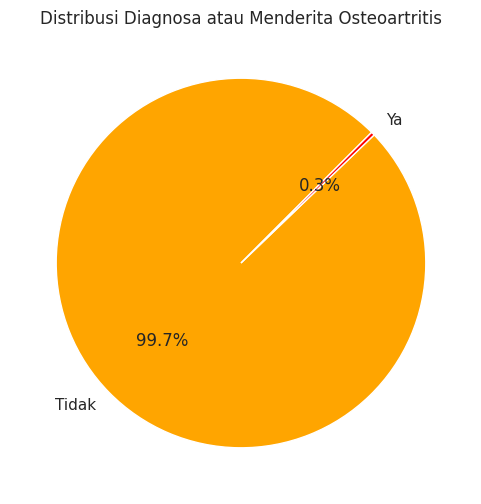

In [ ]:
penyakitosteoartritis_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitosteoartritis_counts, labels=penyakitosteoartritis_counts.index, autopct='%1.1f%%', startangle=45, colors=['Orange','Red'])
plt.title('Distribusi Diagnosa atau Menderita Osteoartritis')
plt.show()

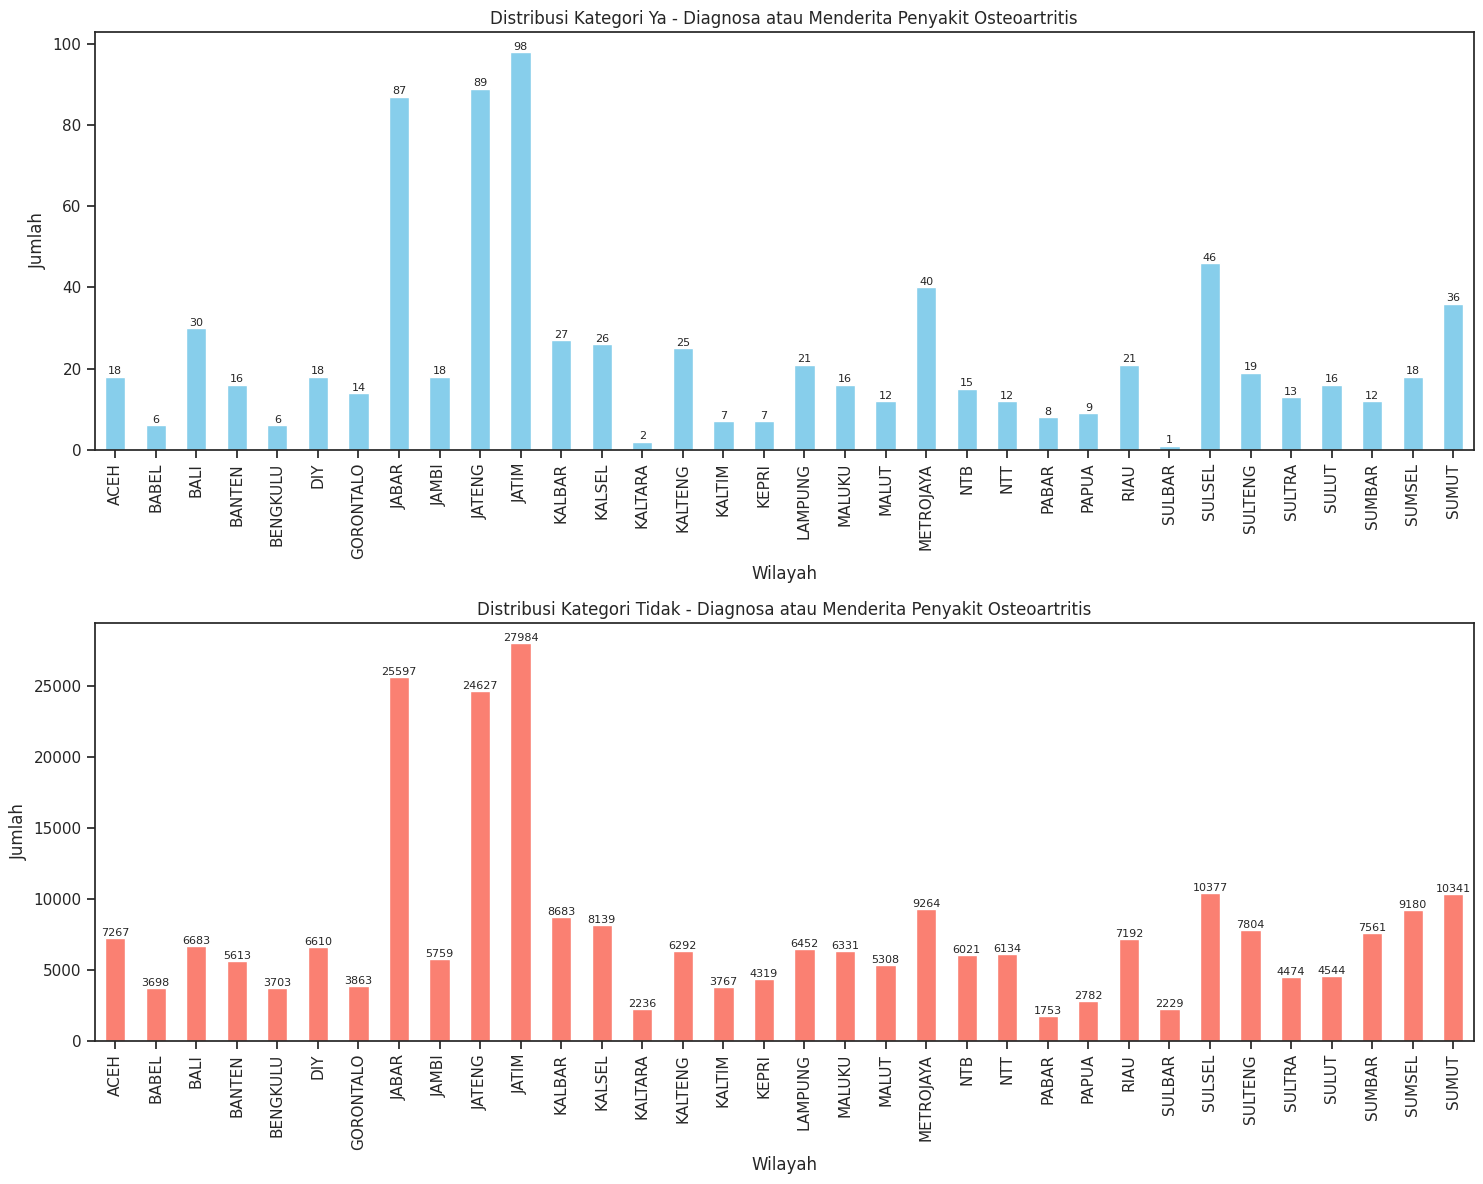

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Osteoartritis')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Osteoartritis')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

LAMBUNG

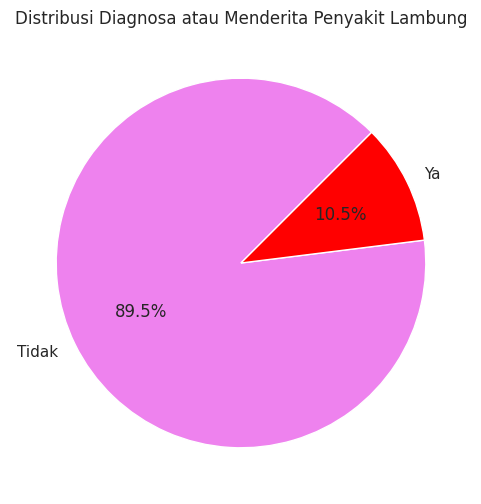

In [ ]:
penyakitlambung_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitlambung_counts, labels=penyakitlambung_counts.index, autopct='%1.1f%%', startangle=45, colors=['Violet','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Lambung')
plt.show()

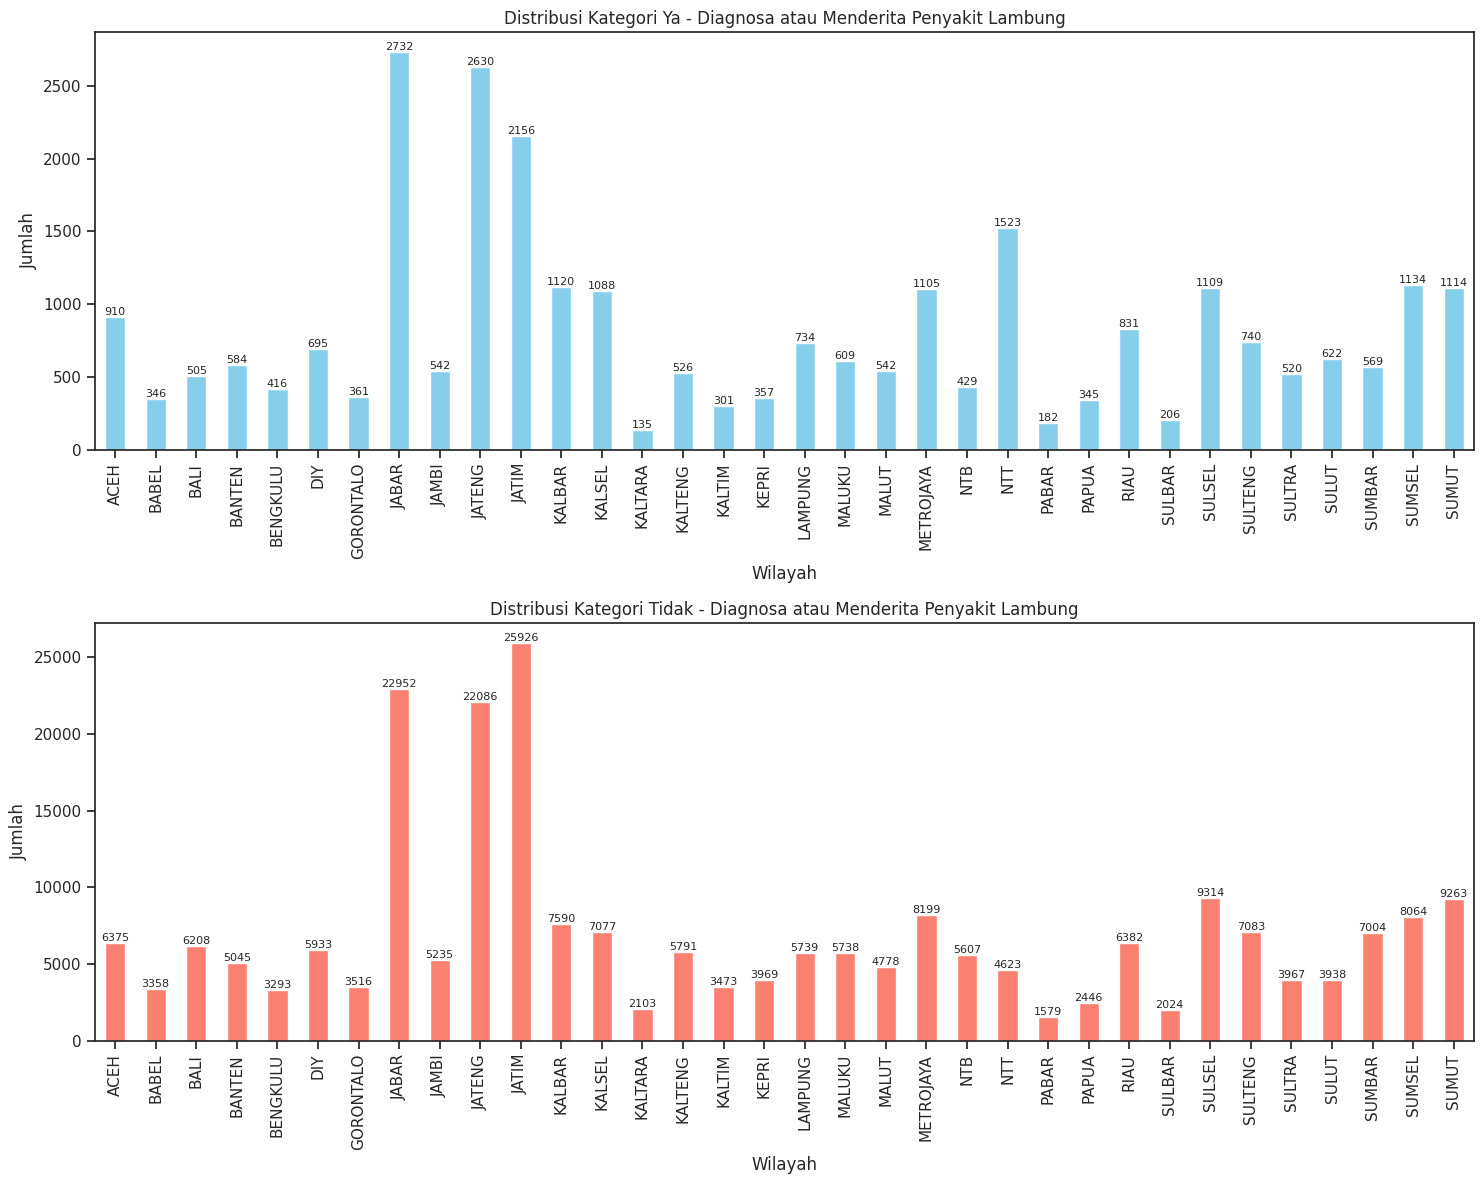

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Lambung')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Lambung')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

LIVER

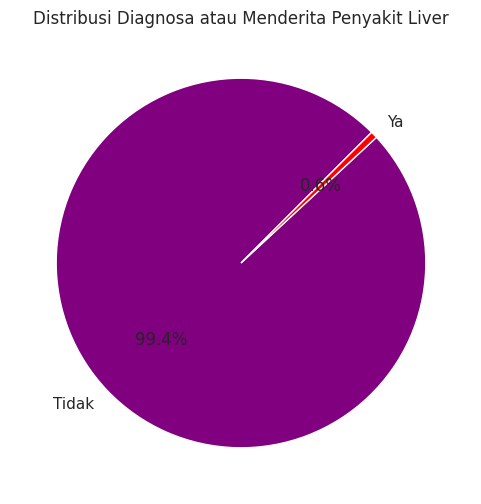

In [ ]:
penyakitliver_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitliver_counts, labels=penyakitliver_counts.index, autopct='%1.1f%%', startangle=45, colors=['Purple','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Liver')
plt.show()

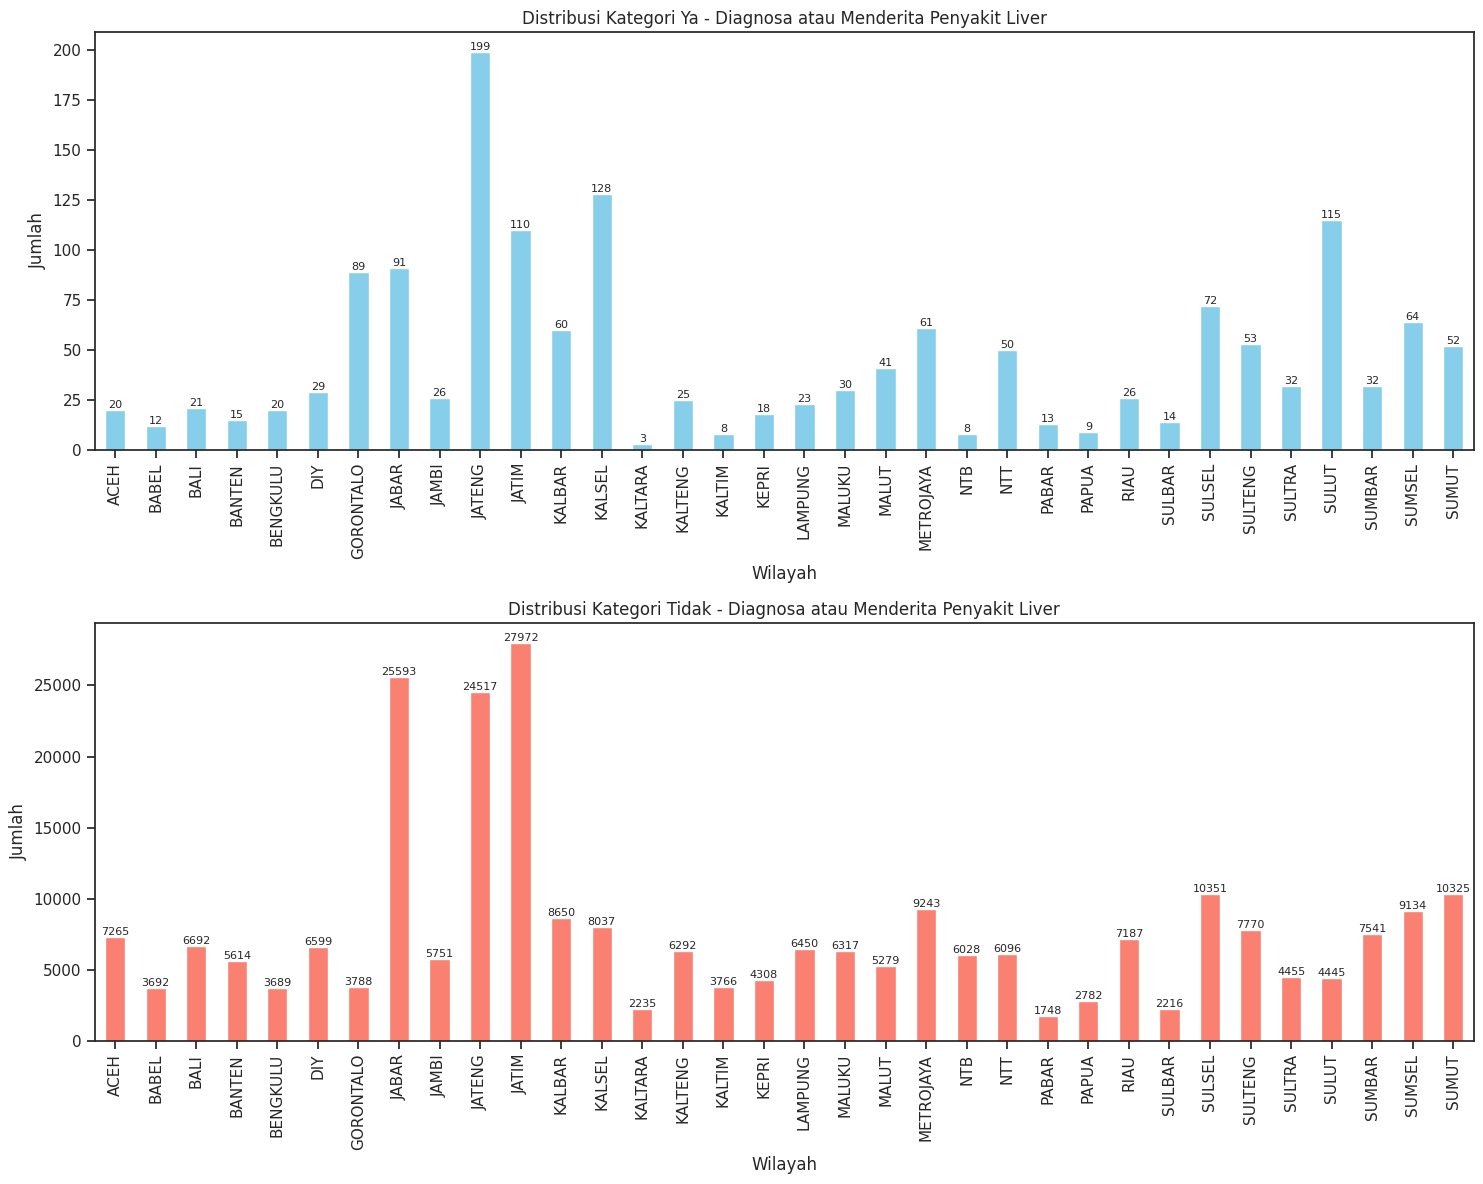

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Liver')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Liver')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

TUBERCULOSIS (TBC)

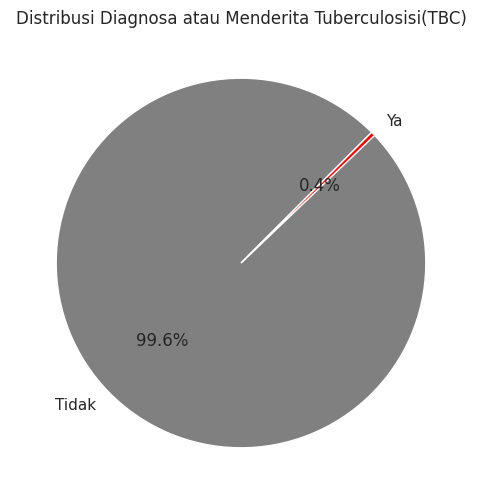

In [ ]:
penyakittuberculosis_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakittuberculosis_counts, labels=penyakittuberculosis_counts.index, autopct='%1.1f%%', startangle=45, colors=['Grey','Red'])
plt.title('Distribusi Diagnosa atau Menderita Tuberculosisi(TBC)')
plt.show()

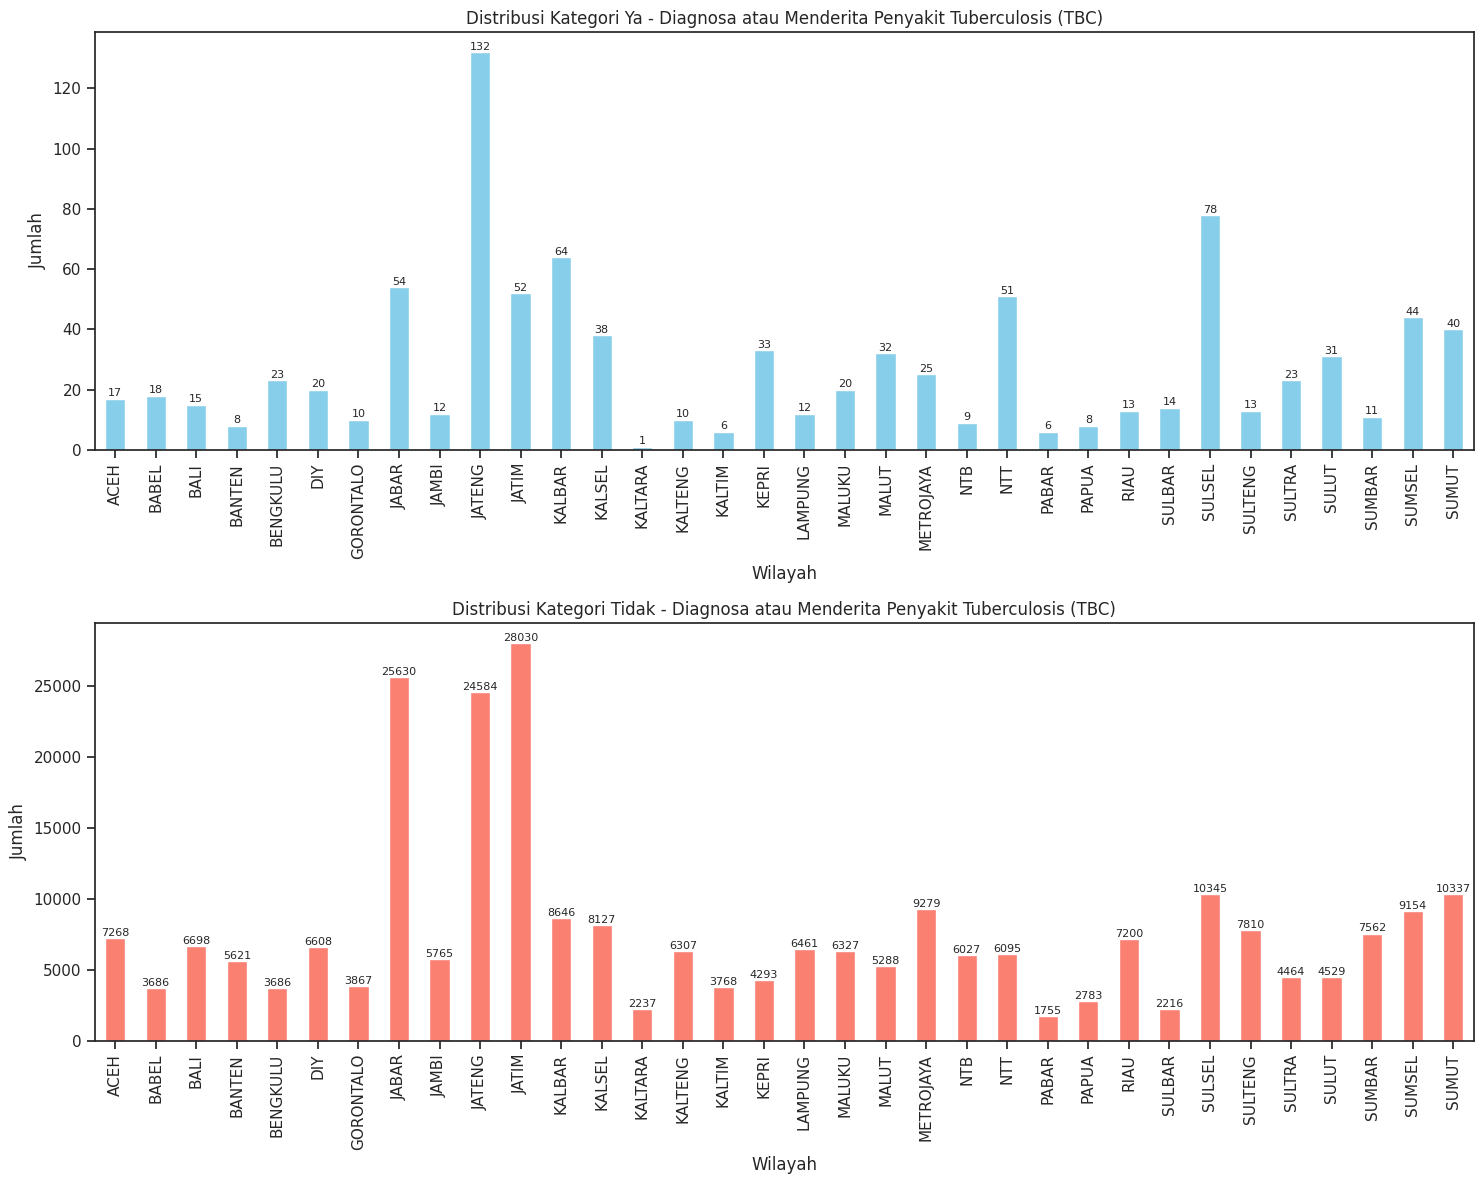

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Tuberculosis (TBC)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Tuberculosis (TBC)')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Demam BERDARAH (DBD)

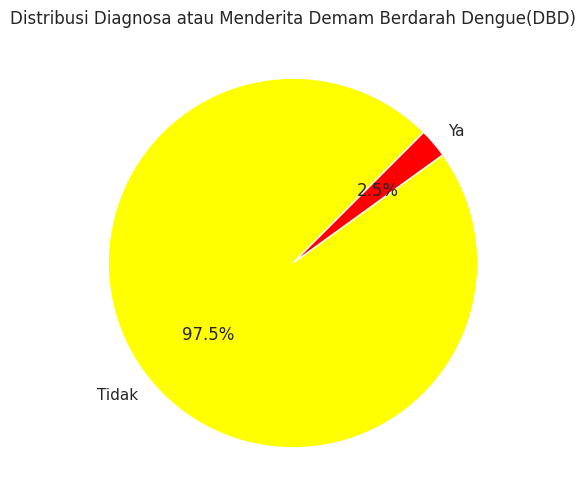

In [ ]:
penyakitdemamberdarah_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitdemamberdarah_counts, labels=penyakitdemamberdarah_counts.index, autopct='%1.1f%%', startangle=45, colors=['Yellow','Red','Yellow'])
plt.title('Distribusi Diagnosa atau Menderita Demam Berdarah Dengue(DBD)')
plt.show()

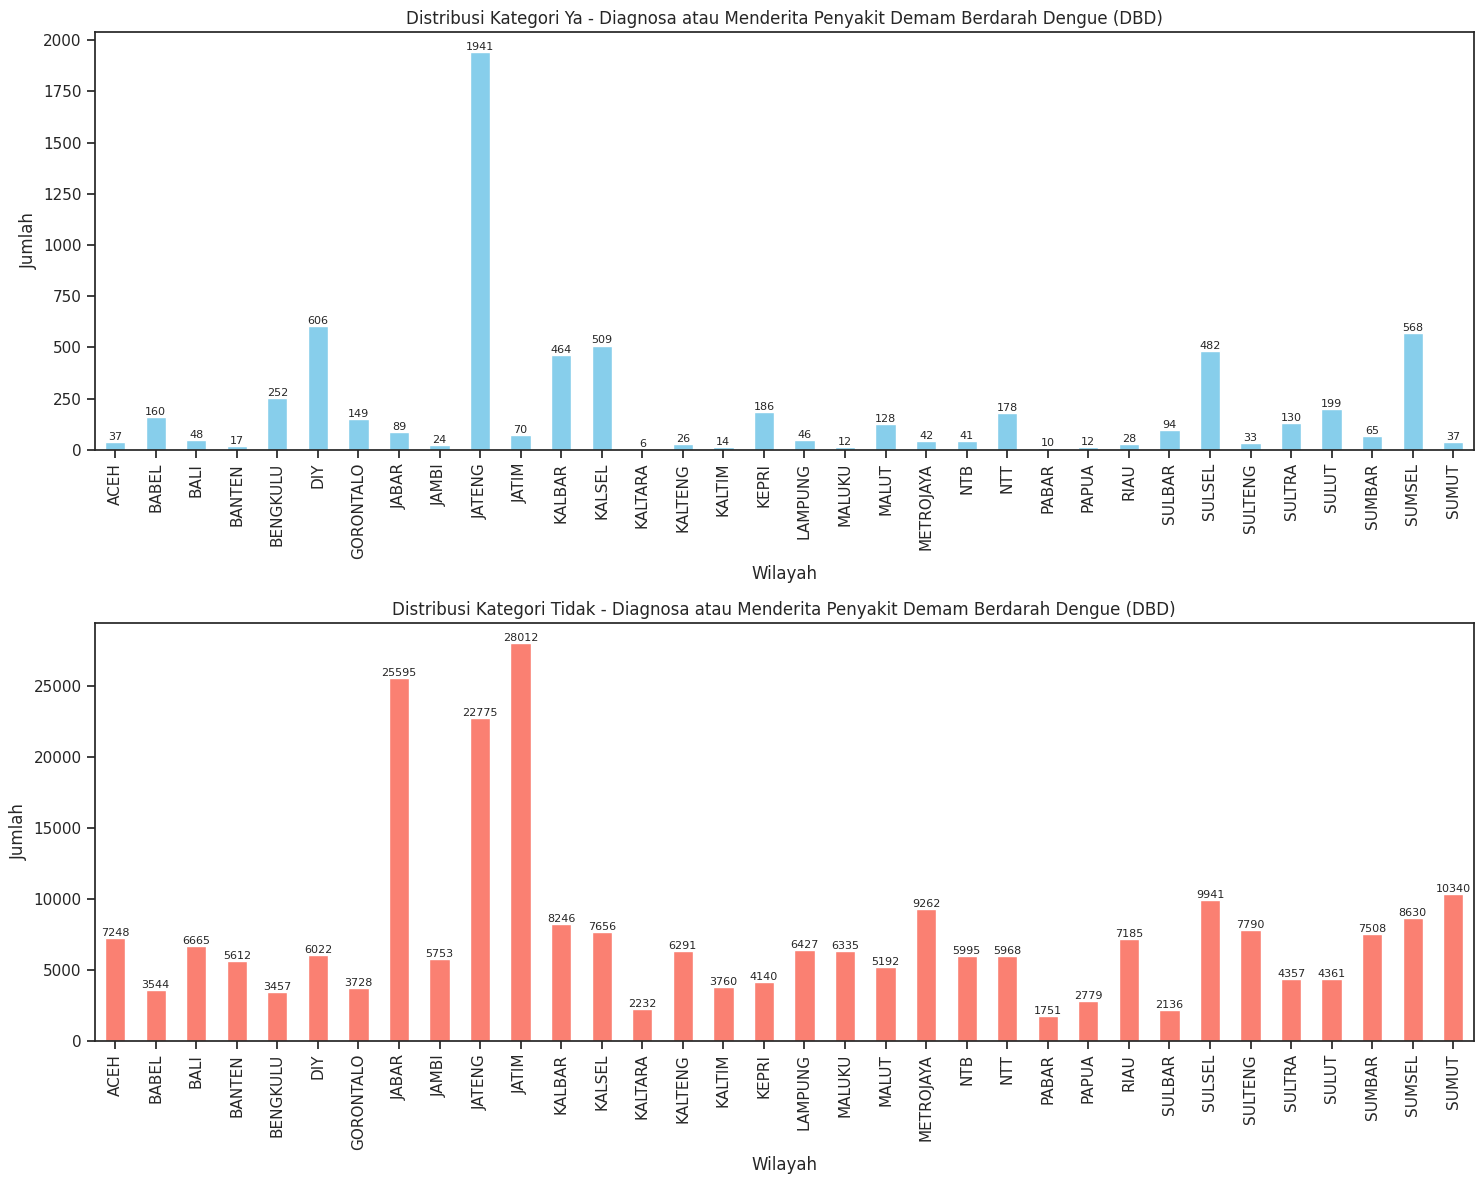

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD) ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Demam Berdarah Dengue (DBD)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Demam Berdarah Dengue (DBD)')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

COVID-19

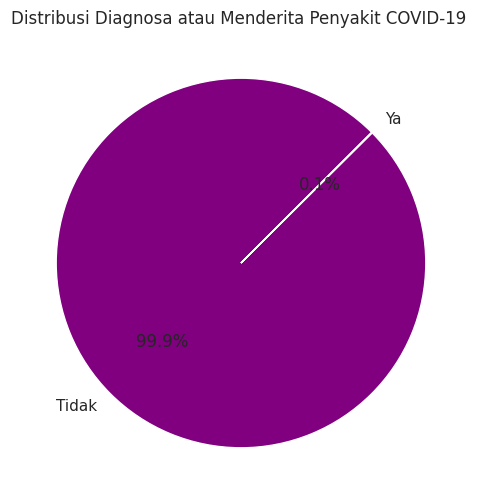

In [ ]:
penyakitcovid_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitHIV_counts, labels=penyakitcovid_counts.index, autopct='%1.1f%%', startangle=45, colors=['purple','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit COVID-19 ')
plt.show()

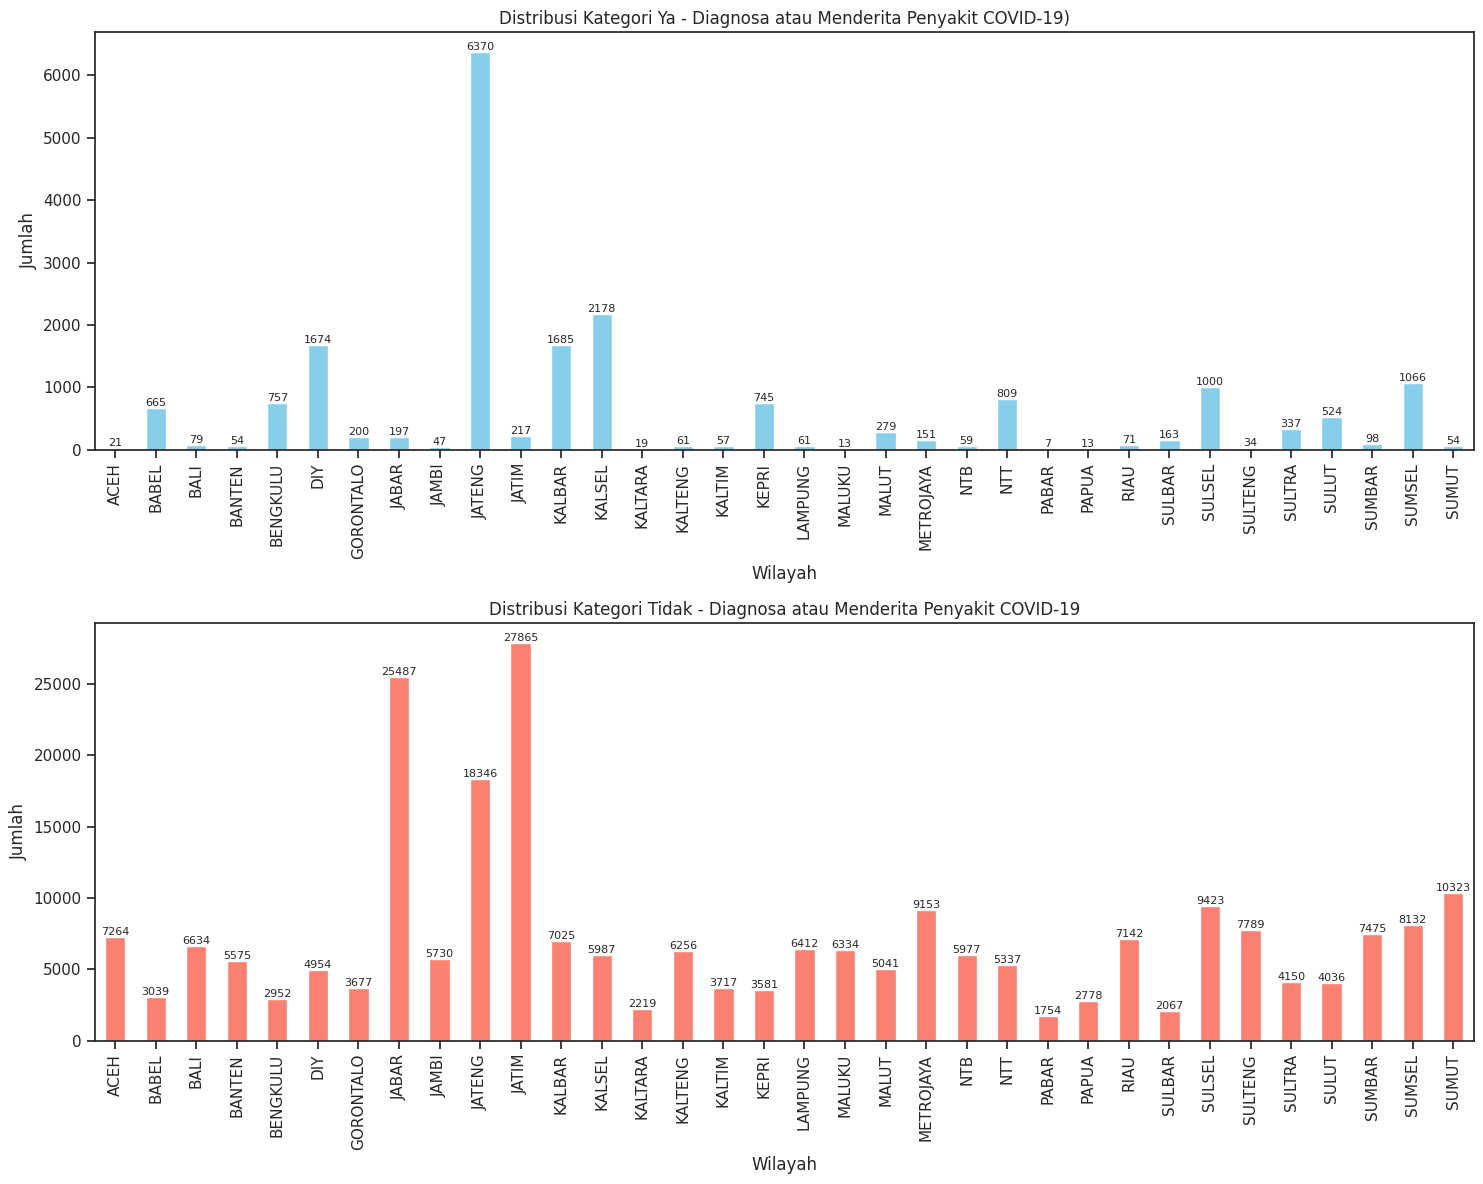

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  COVID-19 ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit COVID-19)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit COVID-19')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

HIV/AIDS

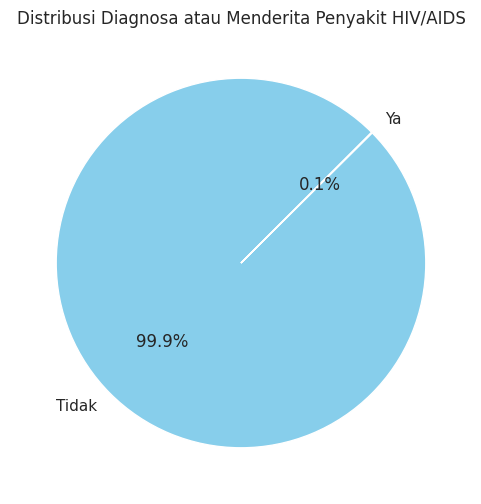

In [ ]:
penyakitHIV_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitHIV_counts, labels=penyakitHIV_counts.index, autopct='%1.1f%%', startangle=45, colors=['Skyblue','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit HIV/AIDS')
plt.show()

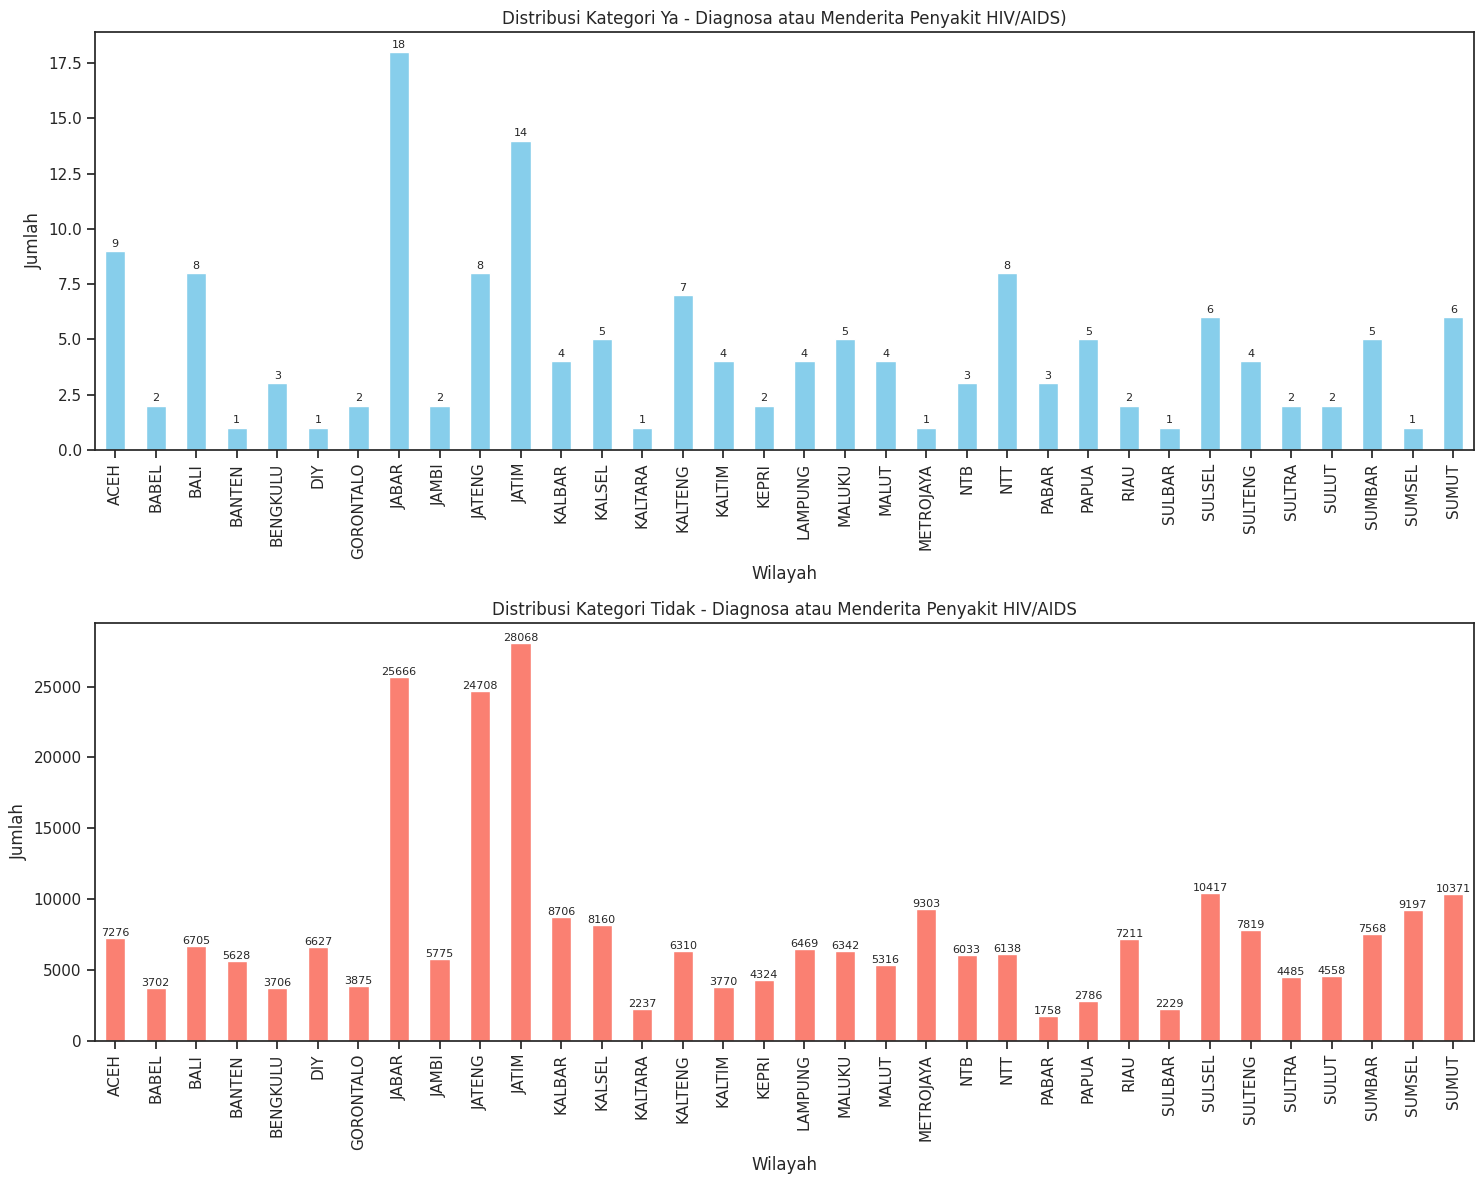

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  HIV/AIDS ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit HIV/AIDS)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit HIV/AIDS')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

DIARE

Text(0.5, 1.0, 'Distribusi Diagnosa atau Menderita Penyakit Diare')

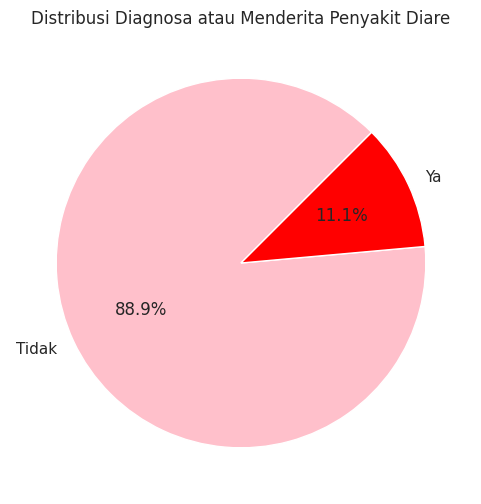

In [ ]:
penyakitdiare_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitdiare_counts, labels=penyakitdiare_counts.index, autopct='%1.1f%%', startangle=45, colors=['pink','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Diare')

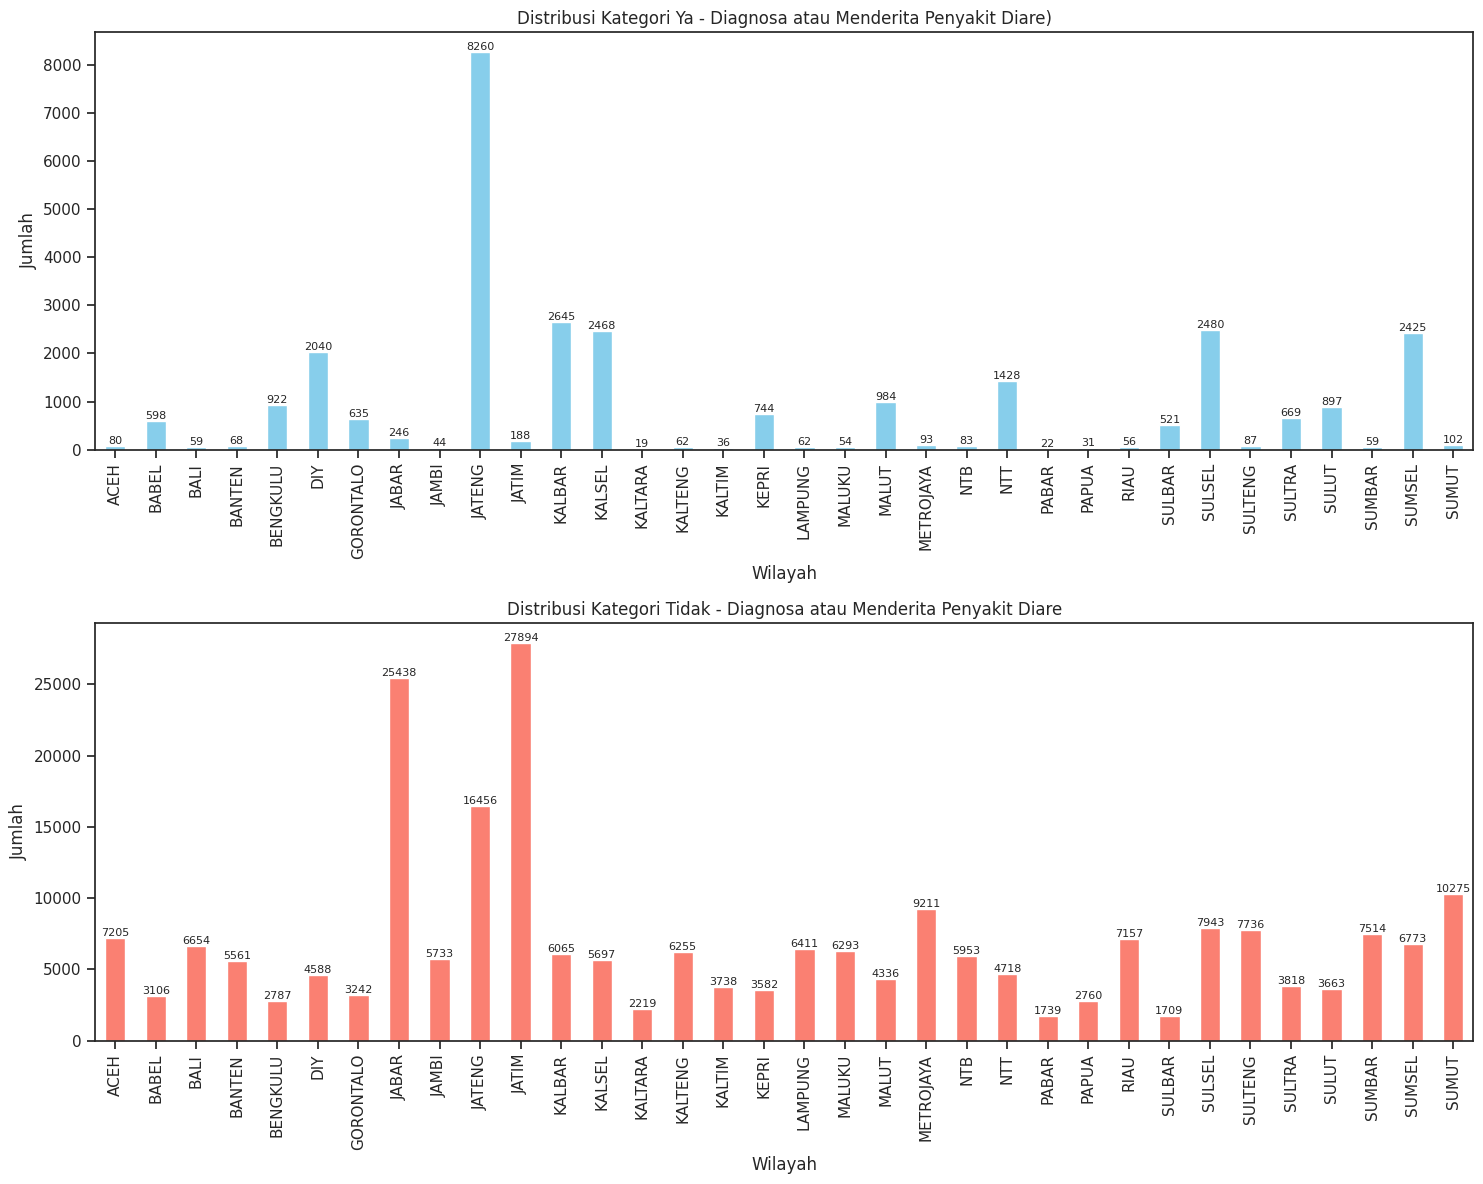

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Diare ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Diare)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Diare')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

MALARIA

Text(0.5, 1.0, 'Distribusi Diagnosa atau Menderita Penyakit Malaria')

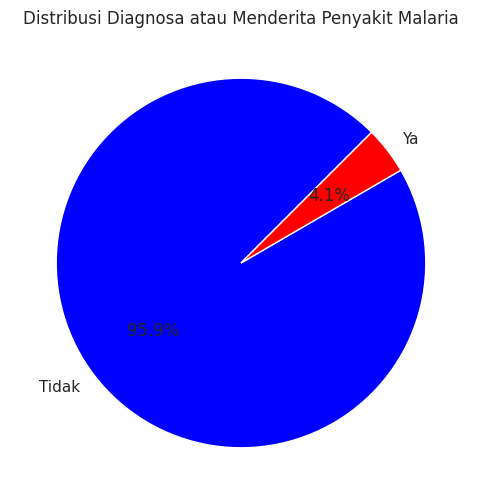

In [ ]:
penyakitmalaria_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitmalaria_counts, labels=penyakitmalaria_counts.index, autopct='%1.1f%%', startangle=45, colors=['Blue','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Malaria')

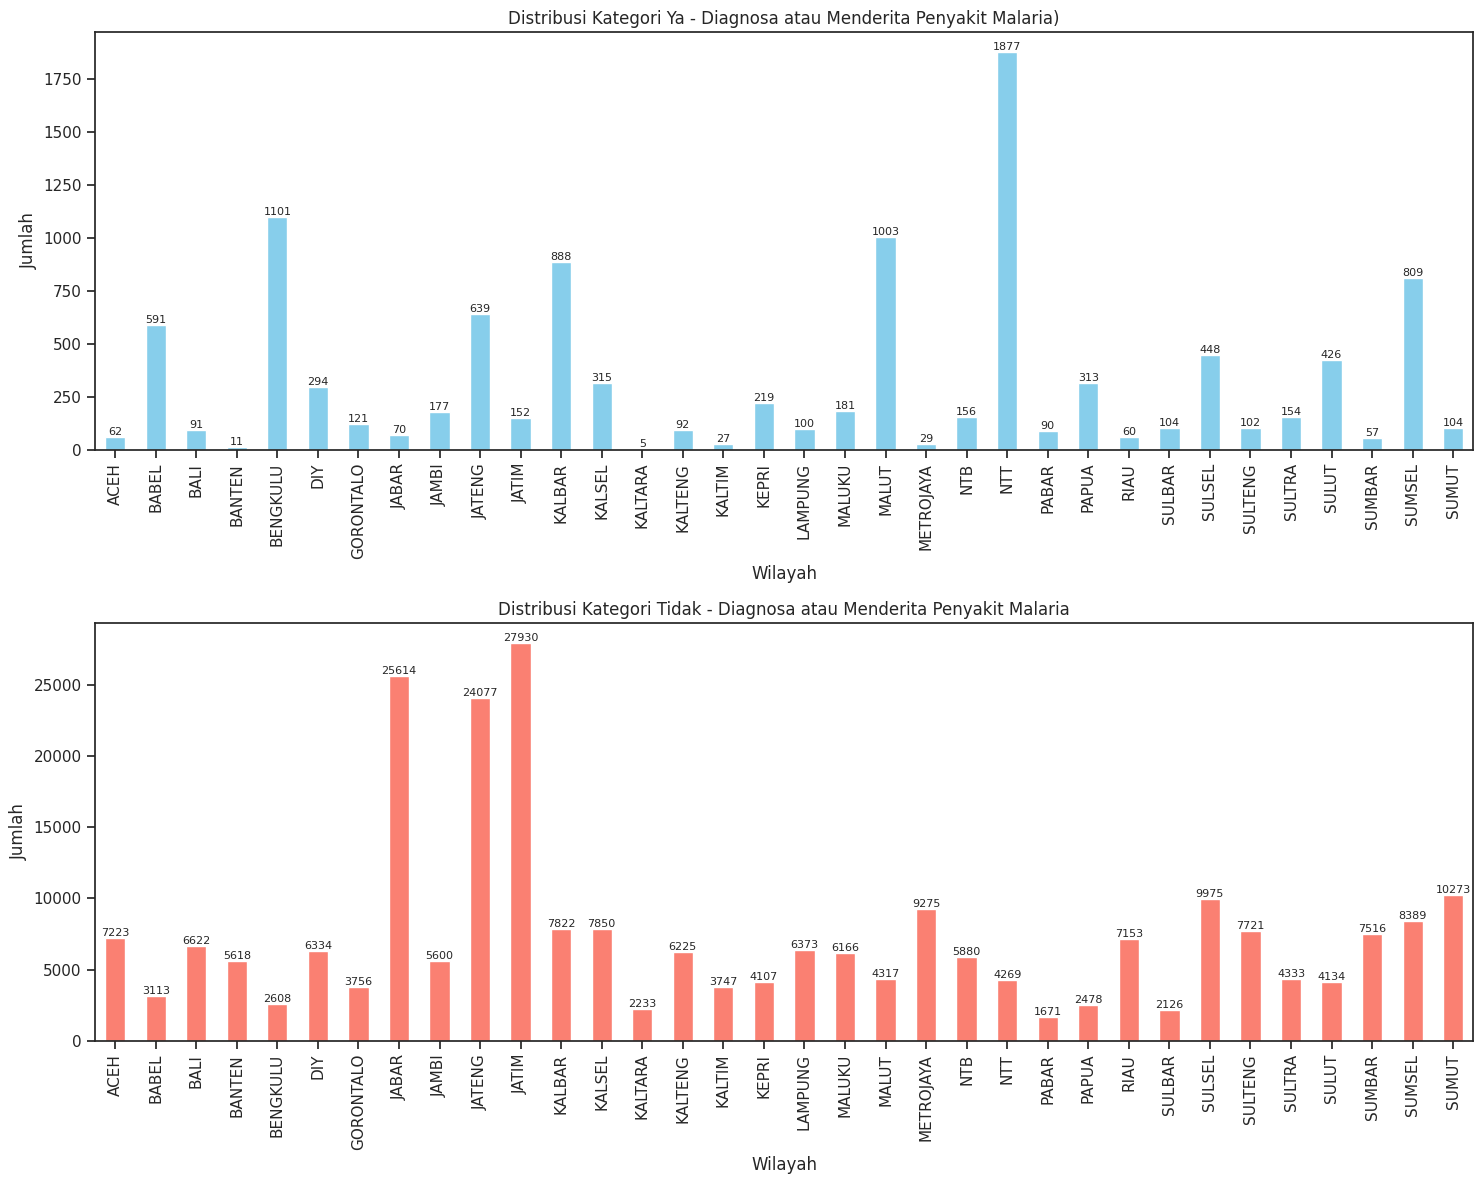

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Malaria ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Malaria)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Malaria')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

GONORE atau Sipilis

Text(0.5, 1.0, 'Distribusi Diagnosa atau Menderita Penyakit Gonore atau Sipilis')

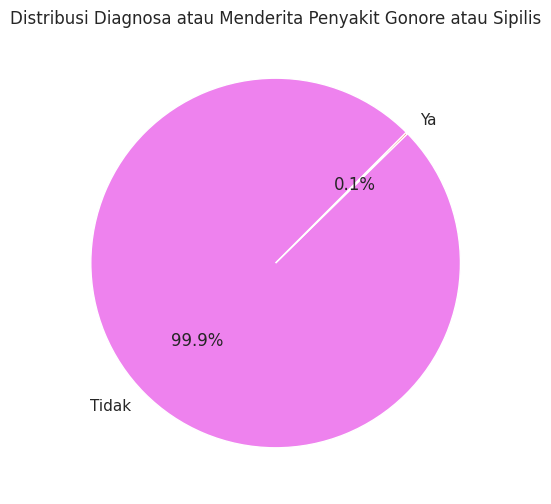

In [ ]:
penyakitgonore_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitgonore_counts, labels=penyakitgonore_counts.index, autopct='%1.1f%%', startangle=45, colors=['violet','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Gonore atau Sipilis')

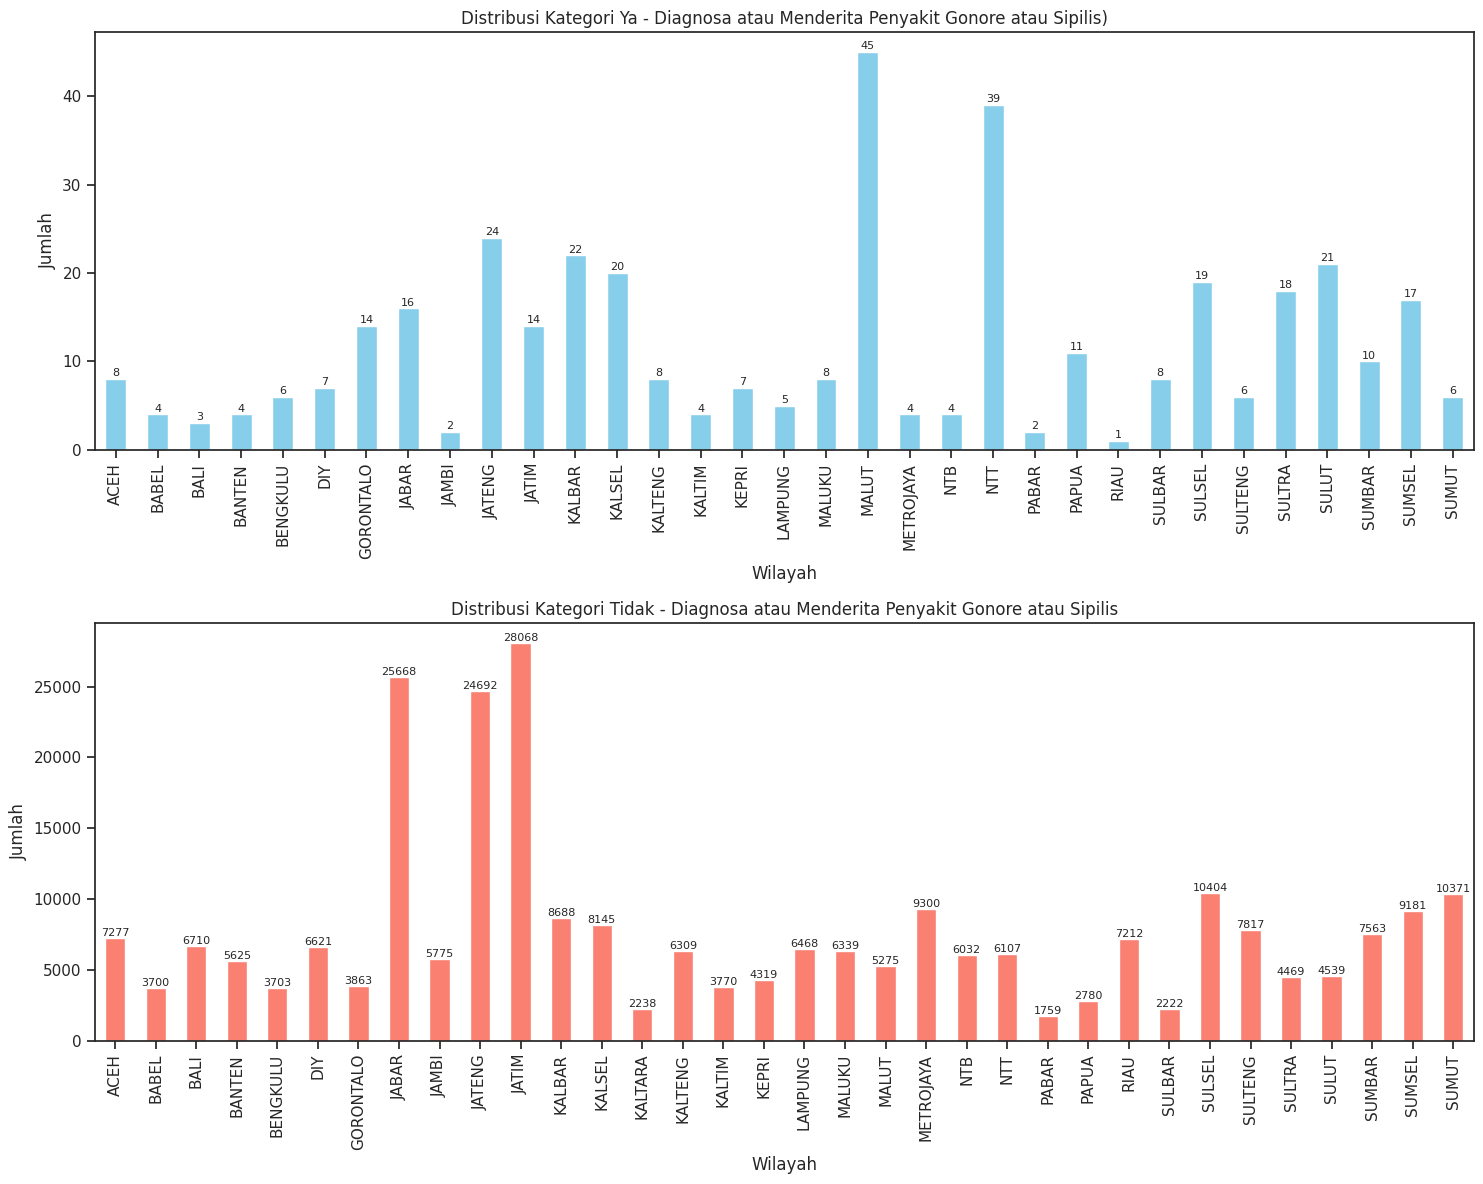

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Gonore atau Sipilis ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Gonore atau Sipilis)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Gonore atau Sipilis')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

THYPUS

Text(0.5, 1.0, 'Distribusi Diagnosa atau Menderita Penyakit Thypus')

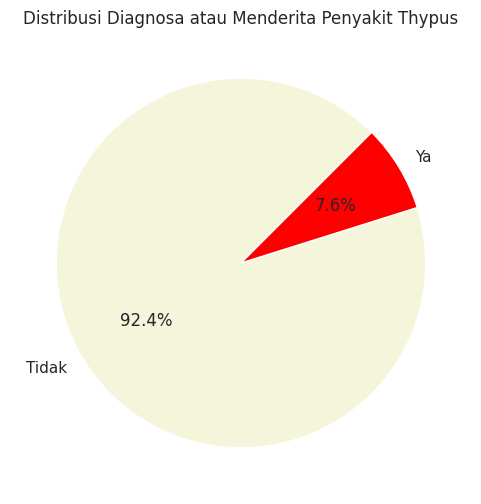

In [ ]:
penyakitthypus_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitthypus_counts, labels=penyakitthypus_counts.index, autopct='%1.1f%%', startangle=45, colors=['Beige','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Thypus')

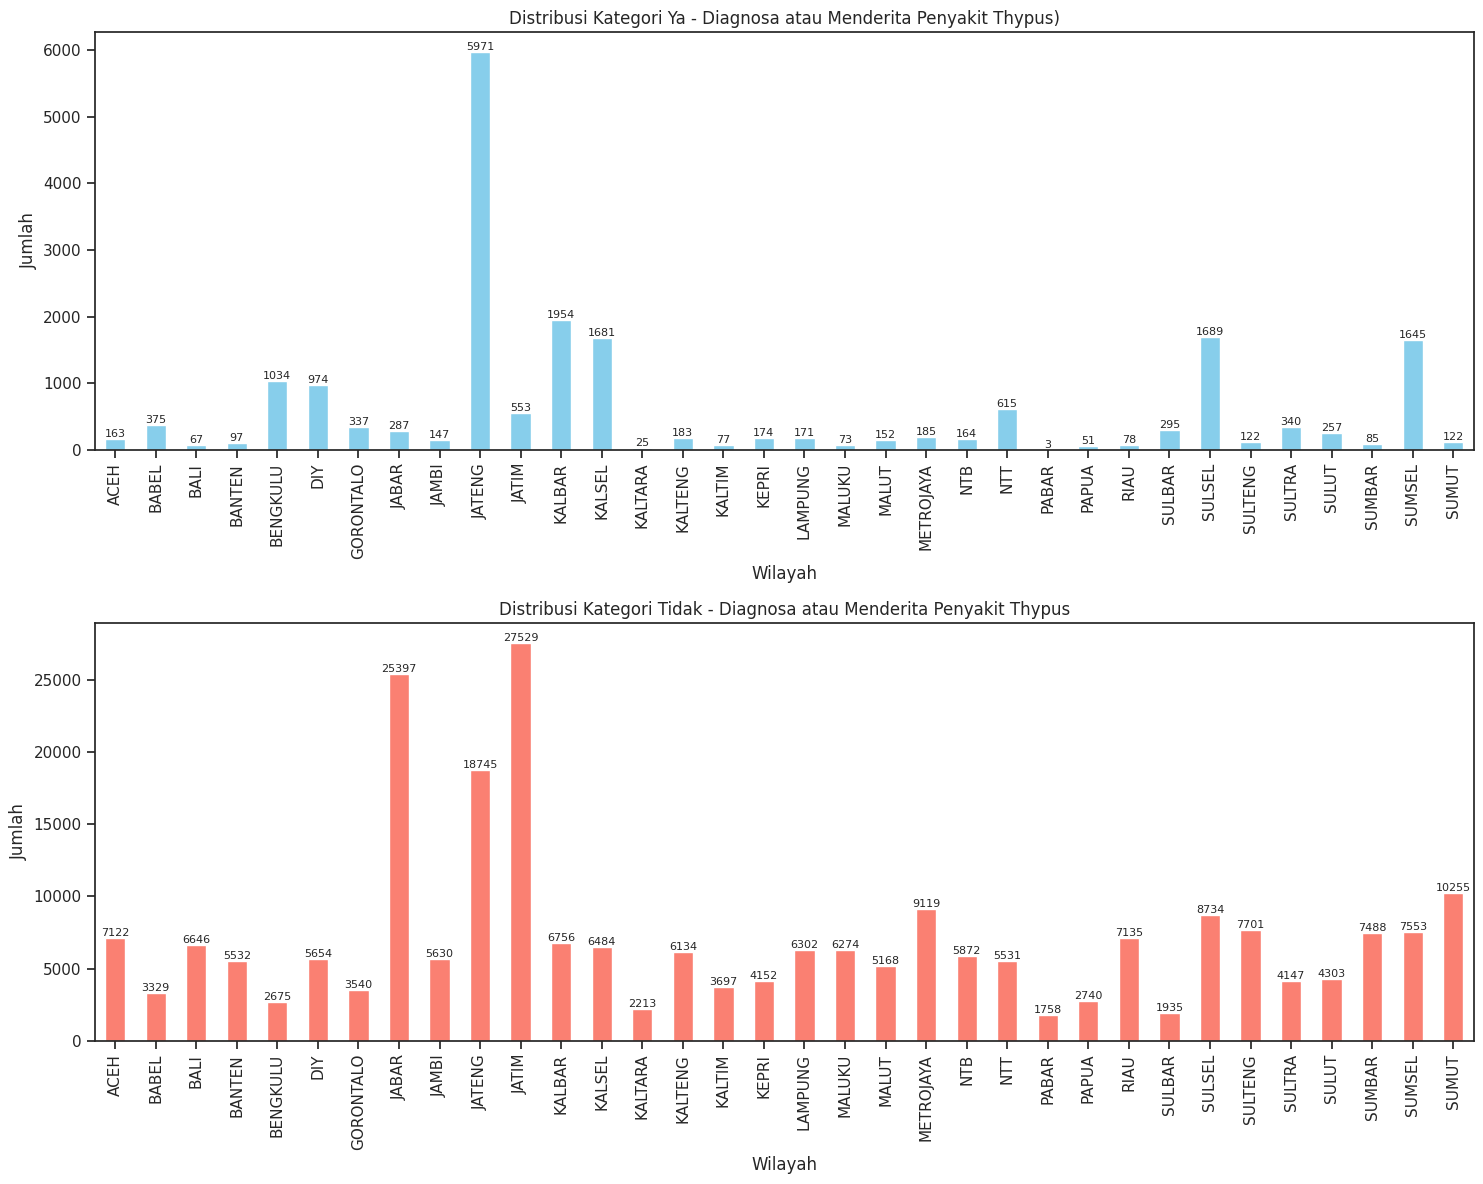

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Thypus ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Thypus)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Thypus')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

DERMATITIS

Text(0.5, 1.0, 'Distribusi Diagnosa atau Menderita Penyakit Dermatitis (Skabies)')

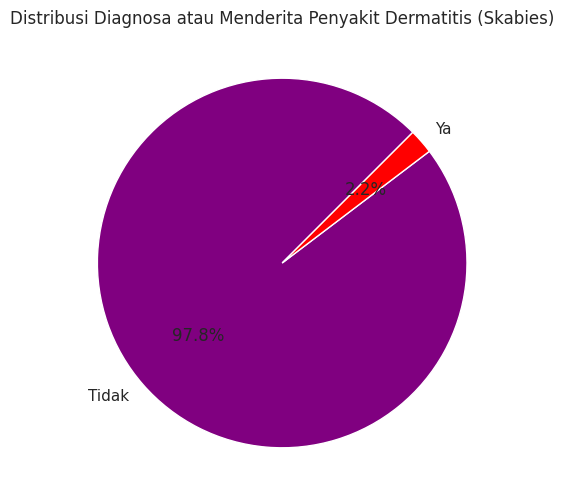

In [ ]:
penyakitskabies_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitskabies_counts, labels=penyakitskabies_counts.index, autopct='%1.1f%%', startangle=45, colors=['Purple','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Dermatitis (Skabies)')

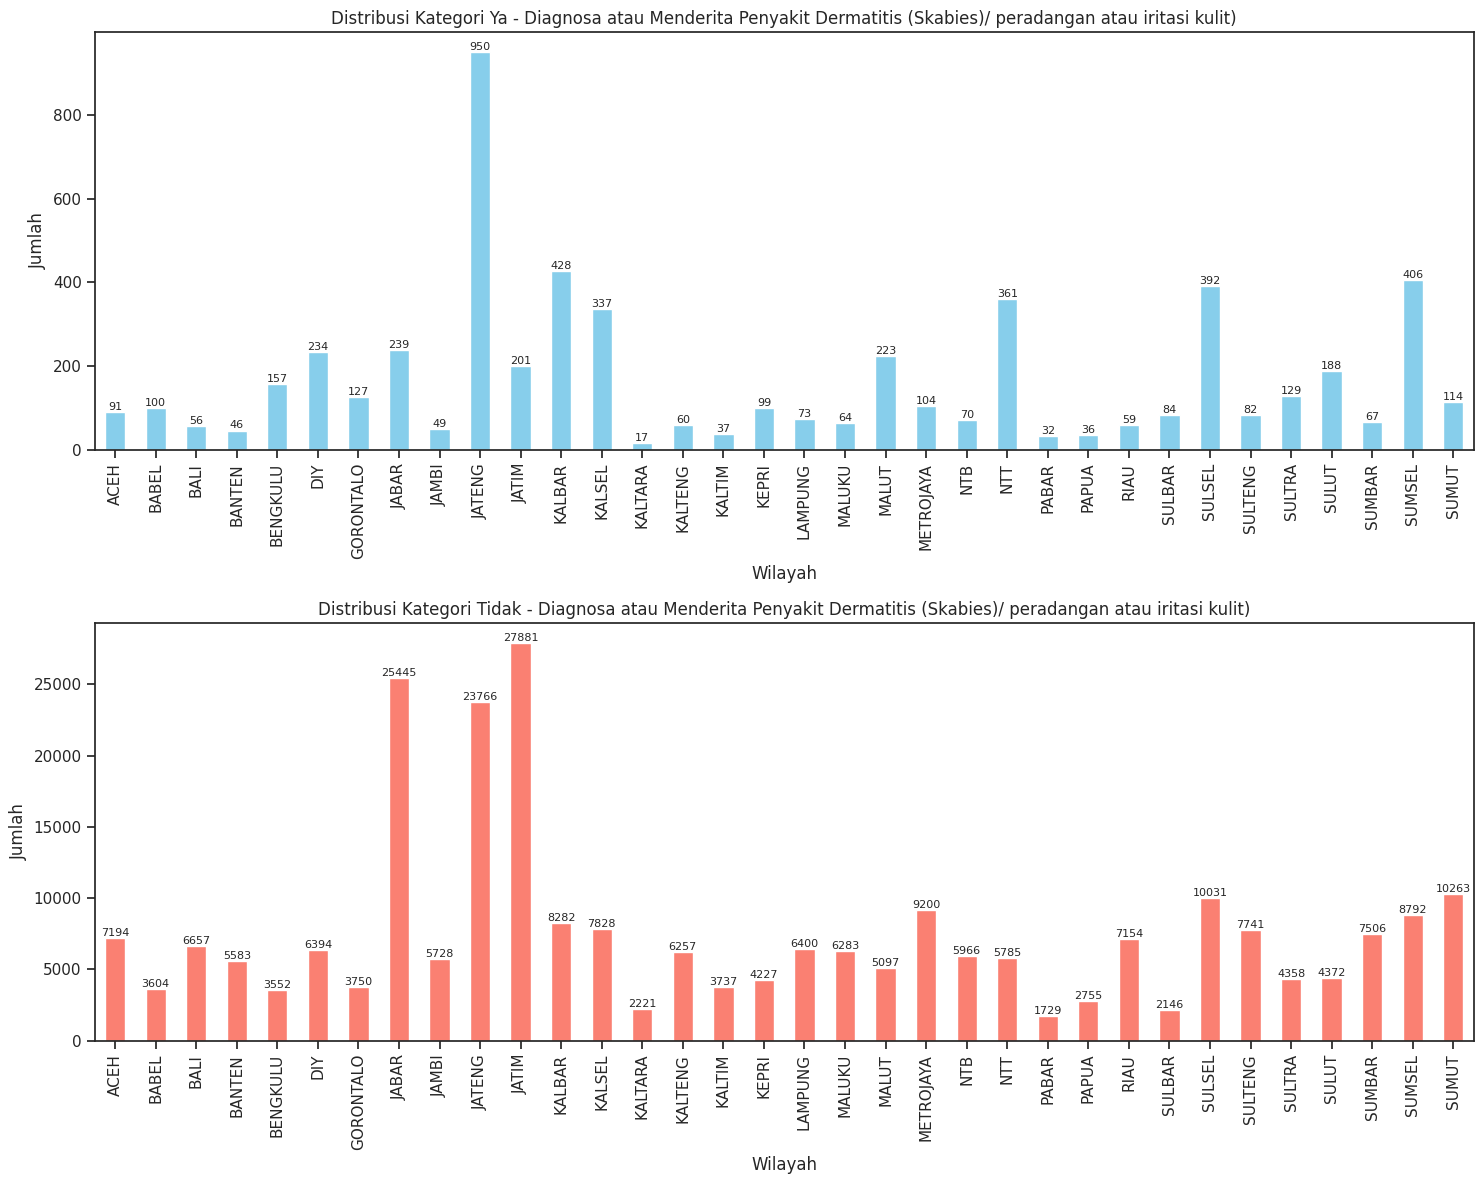

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Dermatitis (Skabies)/ peradangan atau iritasi kulit ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Dermatitis (Skabies)/ peradangan atau iritasi kulit)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Dermatitis (Skabies)/ peradangan atau iritasi kulit)')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

MIKOSIS

Text(0.5, 1.0, 'Distribusi Diagnosa atau Menderita Penyakit Mikosis (infeksi jamur)')

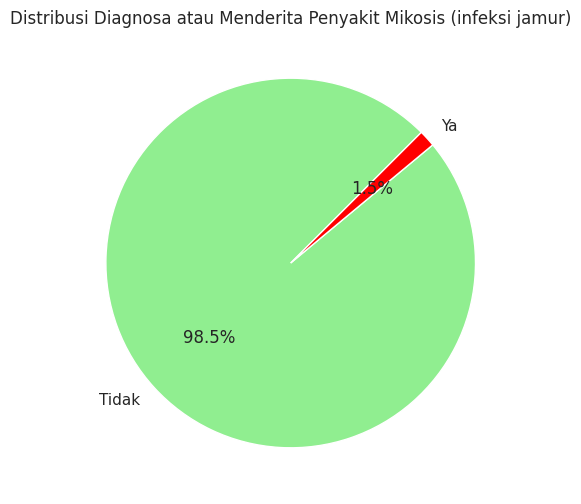

In [ ]:
penyakitmikosis_counts = noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(penyakitmikosis_counts, labels=penyakitmikosis_counts.index, autopct='%1.1f%%', startangle=45, colors=['lightGreen','Red'])
plt.title('Distribusi Diagnosa atau Menderita Penyakit Mikosis (infeksi jamur)')

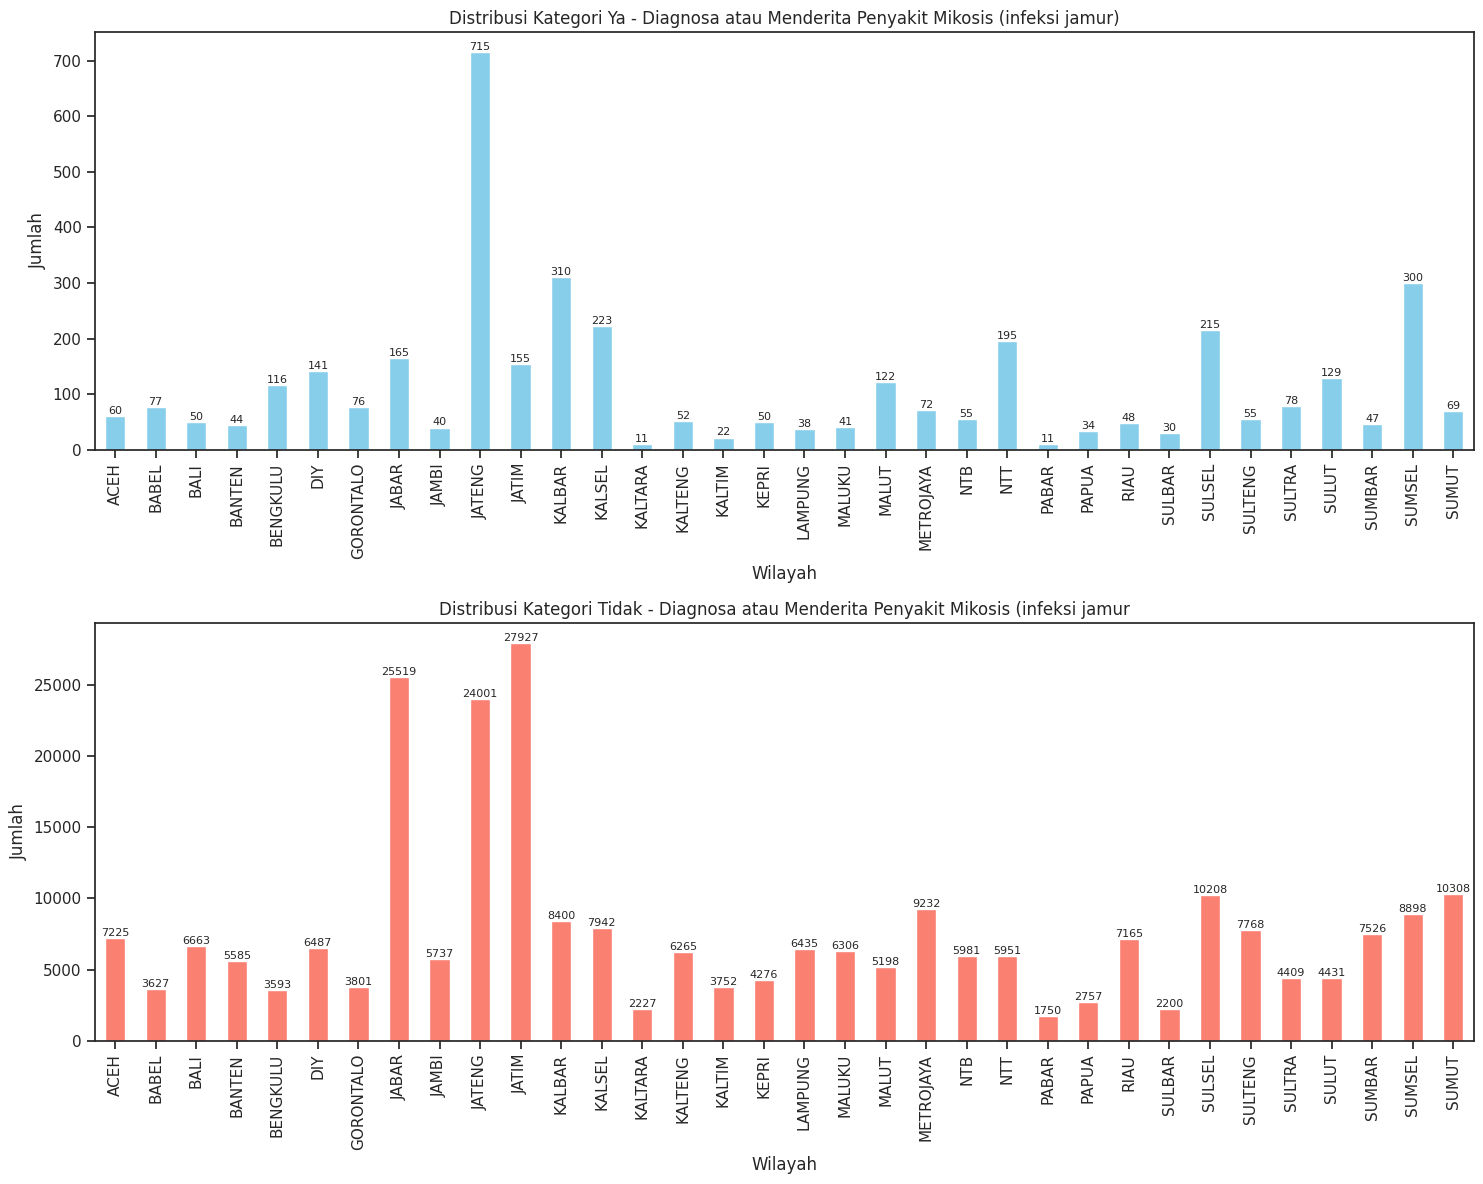

In [ ]:
ya_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?'] == 'Ya']

# Filter DataFrame for 'Tidak'
tidak_df = noout_df[noout_df['Apakah saudara pernah di diagnosa atau menderita penyakit  Mikosis (infeksi jamur) ?'] == 'Tidak']

# Create separate bar plots for 'Ya' and 'Tidak'
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Ya'
ya_counts = ya_df.groupby('WILAYAH').size()
ya_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Kategori Ya - Diagnosa atau Menderita Penyakit Mikosis (infeksi jamur)')
axes[0].set_xlabel('Wilayah')
axes[0].set_ylabel('Jumlah')

# Add annotations for 'Ya'
for i, v in enumerate(ya_counts):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

# Plot for 'Tidak'
tidak_counts = tidak_df.groupby('WILAYAH').size()
tidak_counts.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Kategori Tidak - Diagnosa atau Menderita Penyakit Mikosis (infeksi jamur')
axes[1].set_xlabel('Wilayah')
axes[1].set_ylabel('Jumlah')

# Add annotations for 'Tidak'
for i, v in enumerate(tidak_counts):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## Visualisasi subtema metrik kesehatan mental

In [ ]:
noout_df.iloc[:, 31:51].head()

Sering menderita sakit kepala ?  Tidak nafsu makan ?  Sulit tidur ?  \
0                                1                    0              0   
1                                0                    0              0   
2                                1                    0              0   
3                                0                    0              0   
4                                1                    0              0   

   Mudah takut ?  Merasa tegang, cemas atau kuatir ?  Tangan anda gemetar ?  \
0              0                                   0                      0   
1              0                                   0                      0   
2              1                                   0                      0   
3              0                                   0                      0   
4              0                                   0                      0   

   Pencernaan anda terganggu / buruk ?  Sulit untuk berpikir jernih ?  \
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   

   Merasa tidak bahagia ?  Menangis lebih sering ?  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

   Merasa sulit untuk menikmati kegiatan sehari – hari?  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Sulit untuk mengambil keputusan ?  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Pekerjaan anda sehari – hari terganggu ?  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Tidak mampu melakukan hal – hal yang bermanfaat dalam hidup?  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Kehilangan minat pada berbagai hal ?  Tidak merasa berharga?  \
0                                     0                       0   
1                                     0                       0   
2                                     0                       0   
3                                     0                       0   
4                                     0                       0   

   Mempunyai pikiran untuk mengakhiri hidup?  Merasa lelah sepanjang waktu?  \
0                                          0                              0   
1                                          0                              0   
2                                          0                              0   
3                                          0                              0   
4                                          0                              0   

   Mengalami rasa tidak enak di perut?  Mudah lelah ?  
0                                    0              0  
1                                    0         

In [ ]:
noout_df["skor_kesehatan_mental"].describe()

count    263396.000000
mean          1.622682
std           3.069153
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          40.000000
Name: skor_kesehatan_mental, dtype: float64

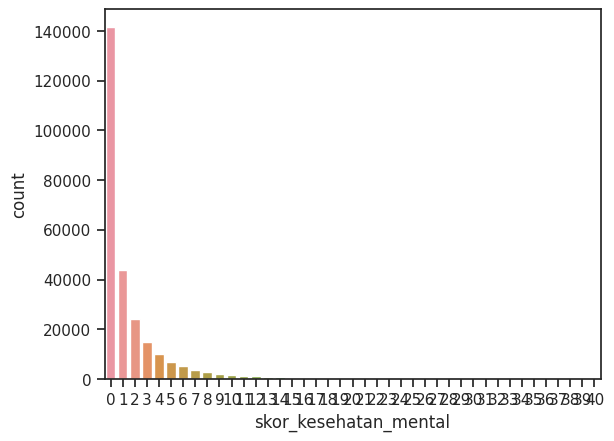

In [ ]:
p= sns.countplot(x="skor_kesehatan_mental", data=noout_df)

Mayoritas populasi memiliki skor kesehatan mental yang rendah, yang berarti memiliki kesehatan mental baik.

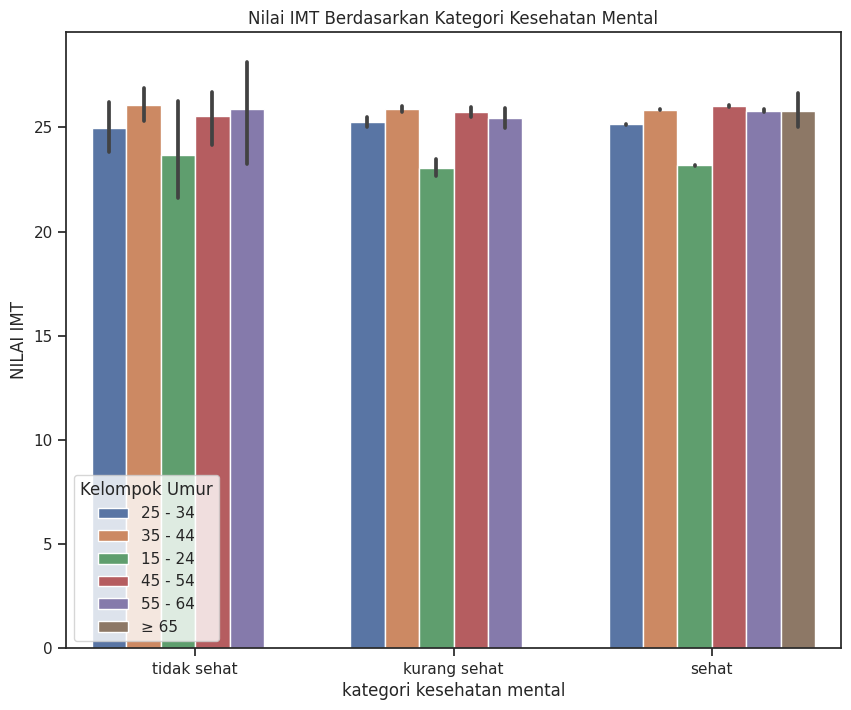

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Nilai IMT Berdasarkan Kategori Kesehatan Mental')

p= sns.barplot(x="kategori kesehatan mental", y="NILAI IMT", hue="Kelompok Umur", data=noout_df)

Semakin baik kesehatan mental seseorang, maka nilai IMTnya akan cenderung lebih kecil

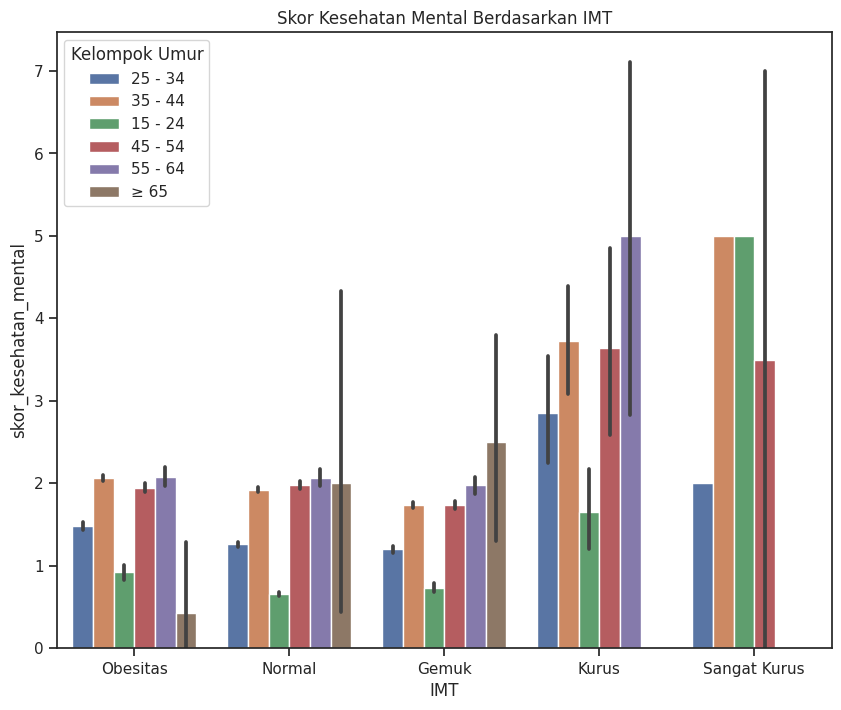

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Skor Kesehatan Mental Berdasarkan IMT')

p= sns.barplot(x="IMT", y="skor_kesehatan_mental", hue="Kelompok Umur", data=noout_df)

Semakin kurus kategori IMT seseorang, maka kesehatan mentalnya akan cenderung lebih buruk

Selanjutnya akapn dianalisis variabel dari kategori kesehatan mental

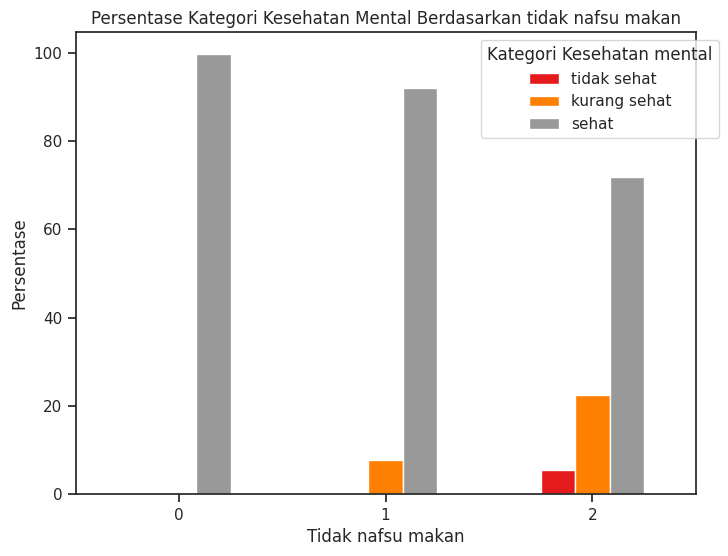

In [ ]:
mentalnafsu = noout_df.groupby(['Tidak nafsu makan ?', 'kategori kesehatan mental']).size().unstack(fill_value=0)
mentalnafsu = mentalnafsu.div(mentalnafsu.sum(axis=1), axis=0) * 100


ax = mentalnafsu.plot(kind='bar', stacked=False, colormap='Set1', figsize=(8, 6))

plt.title('Persentase Kategori Kesehatan Mental Berdasarkan tidak nafsu makan')
plt.xlabel('Tidak nafsu makan')
plt.ylabel('Persentase')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.legend(title='Kategori Kesehatan mental', bbox_to_anchor=(1.05, 1), loc='best')

plt.show()

Semakin tidak nafsu makan seseorang, maka kesehatan mentalnya akan cenderung lebih tidak sehat

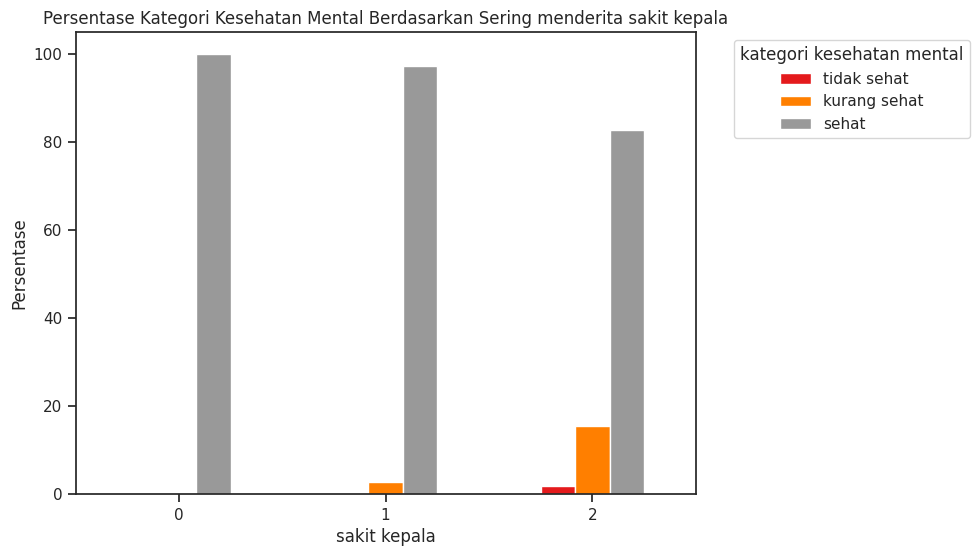

In [ ]:
mentalkepala = noout_df.groupby(['Sering menderita sakit kepala ?', 'kategori kesehatan mental']).size().unstack(fill_value=0)
mentalkepala = mentalkepala.div(mentalkepala.sum(axis=1), axis=0) * 100


ax = mentalkepala.plot(kind='bar', stacked=False, colormap='Set1', figsize=(8, 6))

plt.title('Persentase Kategori Kesehatan Mental Berdasarkan Sering menderita sakit kepala')
plt.xlabel('sakit kepala')
plt.ylabel('Persentase')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.legend(title='kategori kesehatan mental', bbox_to_anchor=(1.05, 1), loc='best')

plt.show()

Jika seseorang semakin sering menderita sakit kepala, maka kesehatan mentalnya akan cenderung lebih tidak sehat

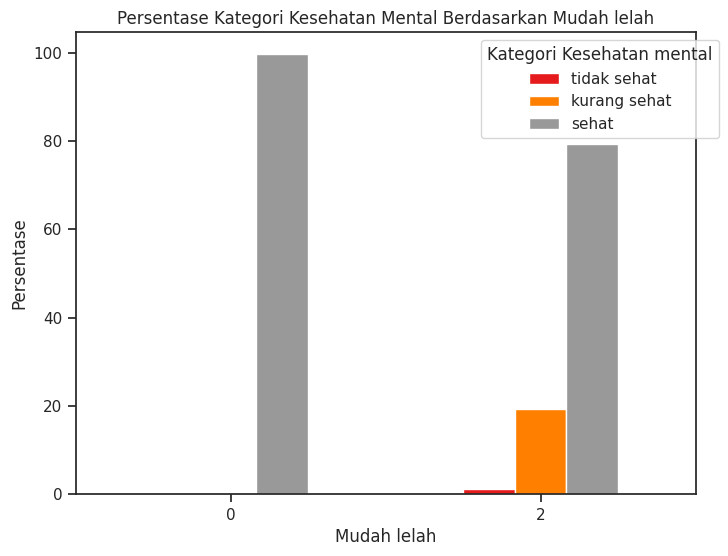

In [ ]:
mentallelah = noout_df.groupby(['Mudah lelah ?', 'kategori kesehatan mental']).size().unstack(fill_value=0)
mentallelah = mentallelah.div(mentallelah.sum(axis=1), axis=0) * 100


ax = mentallelah.plot(kind='bar', stacked=False, colormap='Set1', figsize=(8, 6))

plt.title('Persentase Kategori Kesehatan Mental Berdasarkan Mudah lelah')
plt.xlabel('Mudah lelah')
plt.ylabel('Persentase')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.legend(title='Kategori Kesehatan mental', bbox_to_anchor=(1.05, 1), loc='best')

plt.show()

Jika seseorang lebih mudah lelah, maka kesehatan mentalnya cenderung lebih tidak sehat.

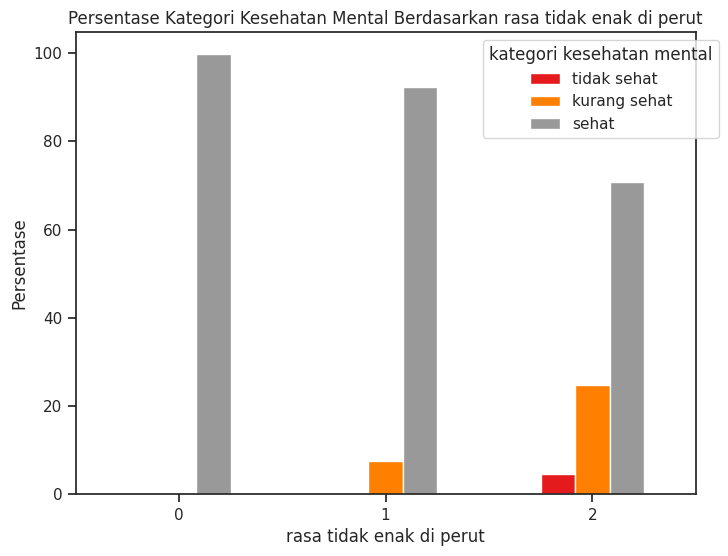

In [ ]:
mentalperut = noout_df.groupby(['Mengalami rasa tidak enak di perut?', 'kategori kesehatan mental']).size().unstack(fill_value=0)
mentalperut = mentalperut.div(mentalperut.sum(axis=1), axis=0) * 100


ax = mentalperut.plot(kind='bar', stacked=False, colormap='Set1', figsize=(8, 6))

plt.title('Persentase Kategori Kesehatan Mental Berdasarkan rasa tidak enak di perut')
plt.xlabel('rasa tidak enak di perut')
plt.ylabel('Persentase')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.legend(title='kategori kesehatan mental', bbox_to_anchor=(1.05, 1), loc='best')

plt.show()

Jika seseorang lebih sering merasa tidak enak di perut, maka kesehatan mentalnya akan cenderung lebih tidak sehat

## Visualisasi kebiasaan menjaga diri

In [ ]:
noout_df.iloc[:, 51:67].head()

Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)  \
0                                              Tidak                         
1                                              Tidak                         
2                                              Tidak                         
3                                              Tidak                         
4                                              Tidak                         

  Jika Ya berapa jumlah gigi saudara yang Karies  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?  \
0                   4 kali atau lebih dalam seminggu               
1                   4 kali atau lebih dalam seminggu               
2                   4 kali atau lebih dalam seminggu               
3                  Kurang dari 4 kali dalam seminggu               
4                  Kurang dari 4 kali dalam seminggu               

  Seberapa banyak Saudara mengkonsumsi air mineral dalam satu hari?  \
0                                 Lebih dari 2 liter                  
1                                 Lebih dari 2 liter                  
2                                            2 Liter                  
3                                            2 Liter                  
4                                            2 Liter                  

  Seberapa sering Saudara mengkonsumsi buah dan sayur dalam sehari?  \
0                                  Kurang dari 400gr                  
1                                  Kurang dari 400gr                  
2                                        400gr/lebih                  
3                                  Kurang dari 400gr                  
4                                  Kurang dari 400gr                  

  Dalam 1 hari berapa kali Saudara mandi/ mencuci badan?  \
0                                           > 2 Kali       
1                                             2 Kali       
2                                             2 Kali       
3                                             2 Kali       
4                                             2 Kali       

  Berapa lama saudara mandi ? Apakah saudara merokok ?  \
0                 2 - 5 menit                       Ya   
1                   > 5 menit                    Tidak   
2                 2 - 5 menit                    Tidak   
3                 2 - 5 menit                    Tidak   
4                   > 5 menit                       Ya   

  Jika Ya, Berapa Batang Saudara merokok dalam sehari?  \
0                          Dibawah 1 bungkus/perhari     
1                                                  0     
2                                                  0     
3                                                  0     
4                          Dibawah 1 bungkus/perhari     

  Seberapa banyak saudara mengkonsumsi gula/pemanis setiap harinya ?  \
0                           Kurang dari 6 sendok teh                   
1                                       Tidak pernah                   
2                           Kurang dari 6 sendok teh                   
3                            Lebih dari 6 sendok teh                   
4                           Kurang dari 6 sendok teh                   

  Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?  \
0                                       Tidak pernah           
1                                       Tidak pernah           
2                                       Tidak pernah           
3                                       Tidak pernah           
4                                       Tidak pernah           

  Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak d

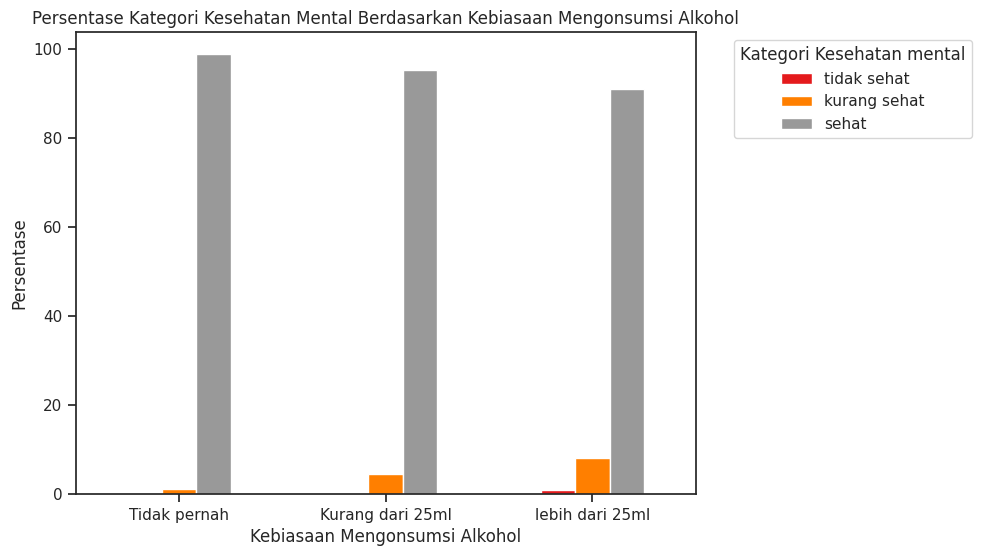

In [ ]:
#Visualisasi Persentase Kategori Kesehatan Mental Berdasarkan Kebiasaan Mengonsumsi Alkohol

mentalalkohol_percentage = noout_df.groupby(['Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?', 'kategori kesehatan mental']).size().unstack(fill_value=0)
mentalalkohol_percentage = mentalalkohol_percentage.div(mentalalkohol_percentage.sum(axis=1), axis=0) * 100

order = ['Tidak pernah', 'Kurang dari 25ml', 'lebih dari 25ml']

ax = mentalalkohol_percentage.loc[order].plot(kind='bar', stacked=False, colormap='Set1', figsize=(8, 6))

plt.title('Persentase Kategori Kesehatan Mental Berdasarkan Kebiasaan Mengonsumsi Alkohol')
plt.xlabel('Kebiasaan Mengonsumsi Alkohol')
plt.ylabel('Persentase')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.legend(title='Kategori Kesehatan mental', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Semakin banyak alkohol yang dikonsumsi per hari, semakin tinggi kecenderungan seseorang untuk masuk dalam kategori kesehatan mental ‘kurang sehat’.

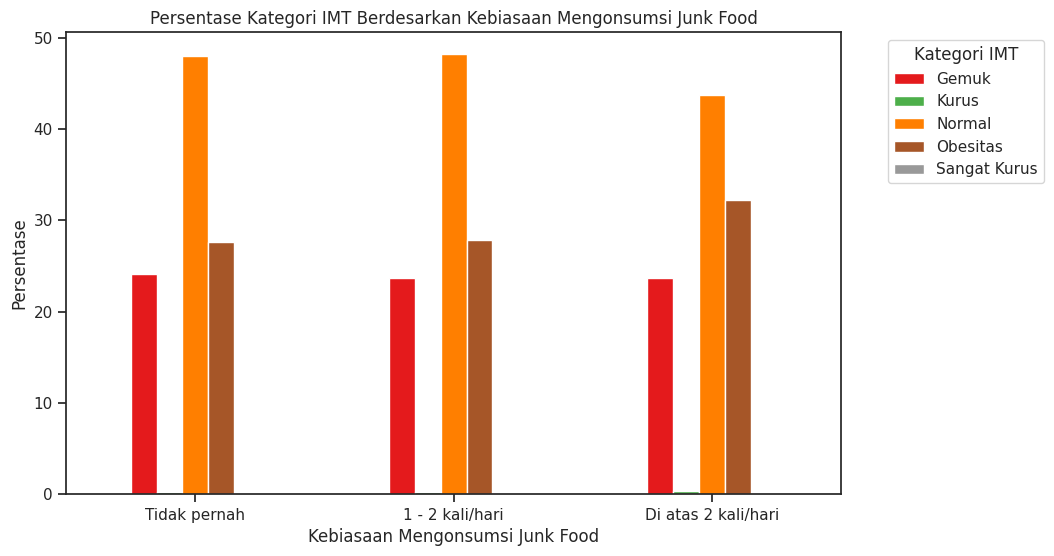

In [ ]:
#Visualisasi Persentase Kategori IMT Berdesarkan Kebiasaan Mengonsumsi Junk Food

imtjunkfood_percentage = noout_df.groupby(['Seberapa banyak Saudara mengkonsumsi makanan-makanan junk food dan berminyak dalam sehari', 'IMT']).size().unstack(fill_value=0)
imtjunkfood_percentage = imtjunkfood_percentage.div(imtjunkfood_percentage.sum(axis=1), axis=0) * 100

order = ['Tidak pernah', '1 - 2 kali/hari', 'Di atas 2 kali/hari']

ax = imtjunkfood_percentage.loc[order].plot(kind='bar', stacked=False, colormap='Set1', figsize=(10, 6))

plt.title('Persentase Kategori IMT Berdesarkan Kebiasaan Mengonsumsi Junk Food')
plt.xlabel('Kebiasaan Mengonsumsi Junk Food')
plt.ylabel('Persentase')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.legend(title='Kategori IMT', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Semakin sering seseorang mengonsumsi junk food per hari, semakin tinggi kecenderungannya untuk masuk dalam kategori obesitas.

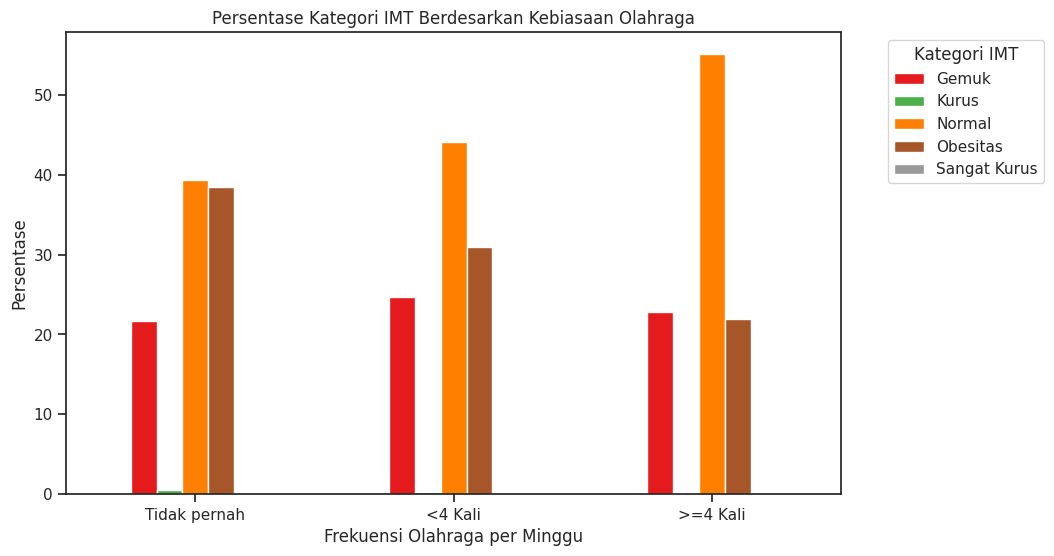

In [ ]:
#Visualisasi Persentase Kategori IMT Berdesarkan Kebiasaan Olahraga

imtolahraga_percentage = noout_df.groupby(['Berapa kali saudara olahraga/aktifitas fisik selama seminggu ?', 'IMT']).size().unstack(fill_value=0)
imtolahraga_percentage = imtolahraga_percentage.div(imtolahraga_percentage.sum(axis=1), axis=0) * 100

order = ['Tidak pernah', 'Kurang dari 4 kali dalam seminggu', '4 kali atau lebih dalam seminggu']

ax = imtolahraga_percentage.loc[order].plot(kind='bar', stacked=False, colormap='Set1', figsize=(10, 6))

plt.title('Persentase Kategori IMT Berdesarkan Kebiasaan Olahraga')
plt.xlabel('Frekuensi Olahraga per Minggu')
plt.ylabel('Persentase')

ax.set_xticks(range(len(order)))
ax.set_xticklabels(['Tidak pernah', '<4 Kali', '>=4 Kali'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.legend(title='Kategori IMT', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Semakin sering seseorang berolahraga dan melakukan kegiatan fisik per minggu, semakin kecil kecenderungannya untuk masuk dalam kategori obesitas.

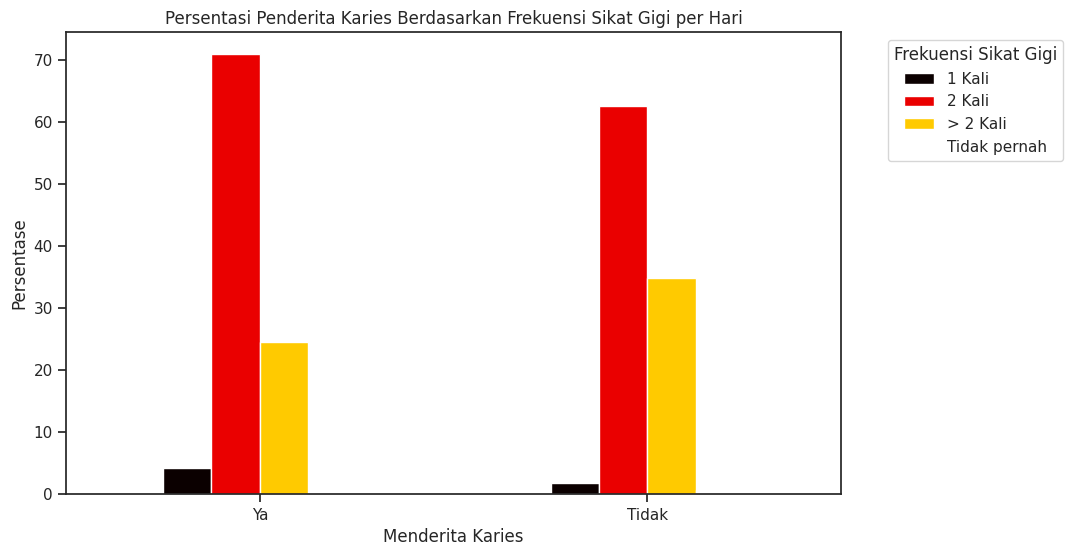

In [ ]:
#Visualisasi Persentasi Penderita Karies Berdasarkan Frekuensi Sikat Gigi per Hari

kariessikatgigi_percentage = noout_df.groupby(['Apakah saudara menderita penyakit gigi dan mulut (karies/gigi berlubang)', 'Dalam satu hari berapa kali Saudara membersihkan/ menggosok gigi ?']).size().unstack(fill_value=0)
kariessikatgigi_percentage = kariessikatgigi_percentage.div(kariessikatgigi_percentage.sum(axis=1), axis=0) * 100

order = ['Ya', 'Tidak']

ax = kariessikatgigi_percentage.loc[order].plot(kind='bar', stacked=False, colormap='hot', figsize=(10, 6))

plt.title('Persentasi Penderita Karies Berdasarkan Frekuensi Sikat Gigi per Hari')
plt.xlabel('Menderita Karies')
plt.ylabel('Persentase')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.legend(title='Frekuensi Sikat Gigi', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Semakin banyak frekuensi menyikat gigi seseorang dalam sehari, semakin rendah kecenderungannya untuk mengalami karies gigi.

## Visualisasi lingkungan

In [ ]:
noout_df.iloc[:, 67:75].head()

Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?  \
0                       Lebih dari 1 sirkulasi udara                               
1                       Lebih dari 1 sirkulasi udara                               
2                       Lebih dari 1 sirkulasi udara                               
3                       Lebih dari 1 sirkulasi udara                               
4                       Lebih dari 1 sirkulasi udara                               

  Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?  \
0                                              Tidak                                                                  
1                                              Tidak                                                                  
2                                              Tidak                                                                  
3                                              Tidak                                                                  
4                                              Tidak                                                                  

  Sumber air bersih di tempat tinggal saudara ?  \
0                                       Air PAM   
1                                       Air PAM   
2                                       Air PAM   
3                                       Air PAM   
4                                       Air PAM   

  Penggunaan air bersih untuk makan & minum bersumber dari :   \
0                                        Tadah hujan            
1                              Air mineral isi ulang            
2                              Air mineral isi ulang            
3                              Air mineral isi ulang            
4                              Air mineral isi ulang            

  Berapa jarak jamban dengan sumur dirumah saudara ?  \
0                                Lebih dari 12 meter   
1                                Lebih dari 12 meter   
2                        Tidak memiliki jamban sehat   
3                        Tidak memiliki jamban sehat   
4                                Lebih dari 12 meter   

  Bagaimana saluran pembuangan air (sanitasi) rumah tangga?  \
0                                                Ada          
1                                                Ada          
2                                                Ada          
3                                                Ada          
4                                                Ada          

  Apakah terdapat tempat sampah di sekitar rumah?   \
0                                     Ada, terbuka   
1                                    Ada, tertutup   
2                                        Tidak ada   
3                                    Ada, tertutup   
4                                    Ada, tertutup   

  Berapa jarak tempat sampah dengan rumah saudara ?  
0                               Lebih dari 10 meter  
1                               Lebih dari 10 meter  
2                                                 -  
3                               Lebih dari 10 meter  
4                               Lebih dari 10 meter

SIRKULASI UDARA

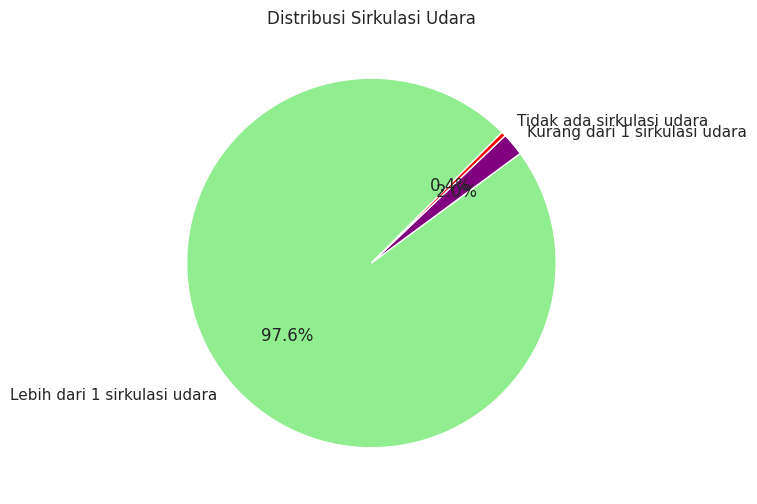

In [ ]:
sirkulasiudara_counts = noout_df['Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sirkulasiudara_counts, labels=sirkulasiudara_counts.index, autopct='%1.1f%%', startangle=45, colors=['Lightgreen','Purple','Red'])
plt.title('Distribusi Sirkulasi Udara')
plt.show()

Text(0, 0.5, 'Jumlah')

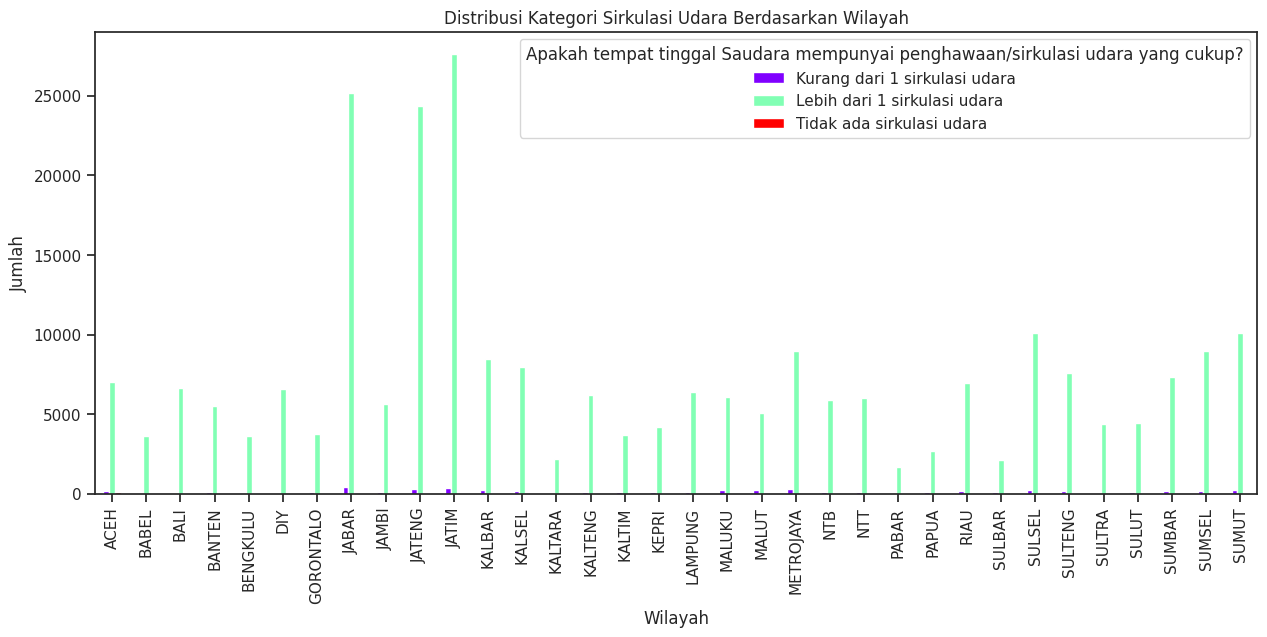

In [ ]:
imt_counts = noout_df.groupby(['WILAYAH', 'Apakah tempat tinggal Saudara mempunyai penghawaan/sirkulasi udara yang cukup?']).size().unstack(fill_value=0)
imt_counts.plot(kind='bar', stacked=False, colormap='rainbow', figsize=(15,6))
plt.title('Distribusi Kategori Sirkulasi Udara Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')

POLUSI UDARA

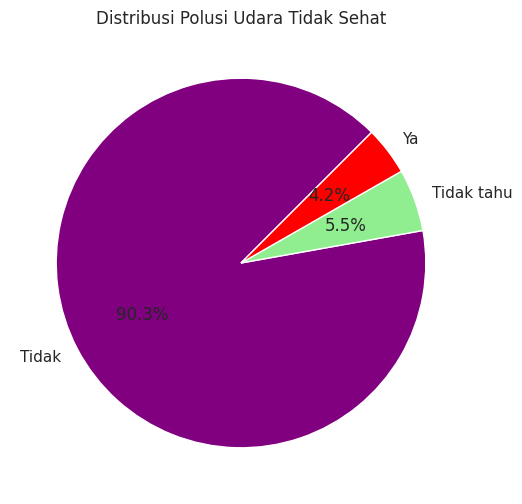

In [ ]:
polusi_counts = noout_df['Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(polusi_counts, labels=polusi_counts.index, autopct='%1.1f%%', startangle=45, colors=['Purple','Lightgreen','Red'])
plt.title('Distribusi Polusi Udara Tidak Sehat')
plt.show()

Text(0, 0.5, 'Jumlah')

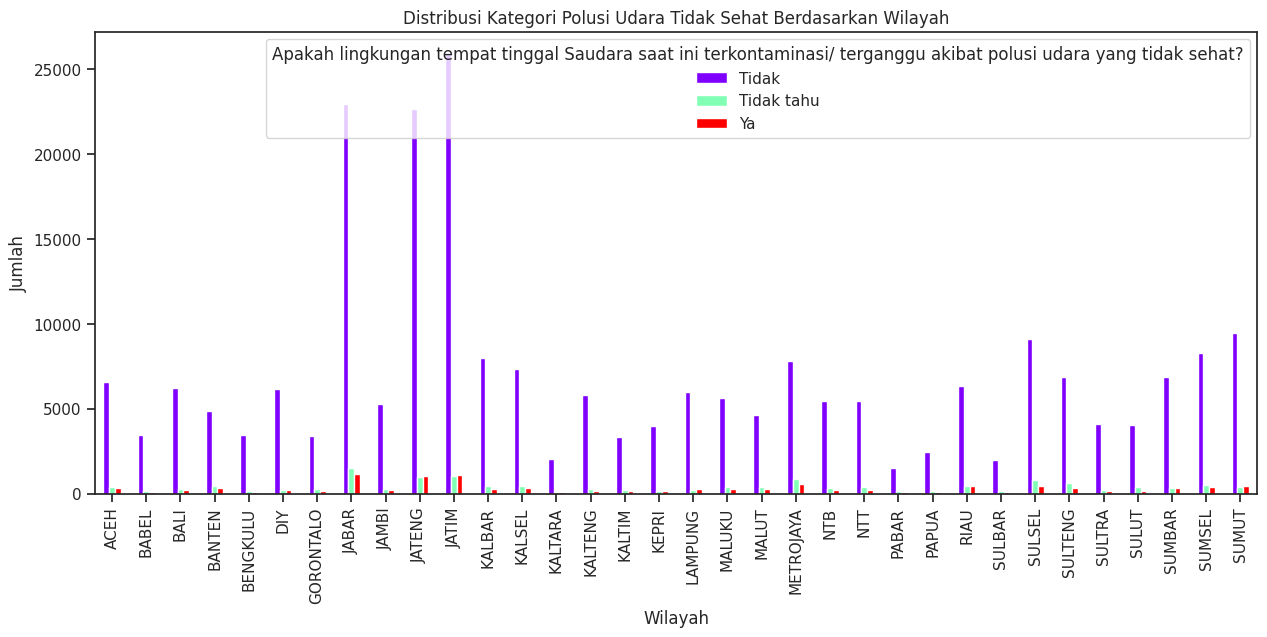

In [ ]:
imt_counts = noout_df.groupby(['WILAYAH', 'Apakah lingkungan tempat tinggal Saudara saat ini terkontaminasi/ terganggu akibat polusi udara yang tidak sehat?']).size().unstack(fill_value=0)
imt_counts.plot(kind='bar', stacked=False, colormap='rainbow', figsize=(15,6))
plt.title('Distribusi Kategori Polusi Udara Tidak Sehat Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')

SUMBER AIR BERSIH

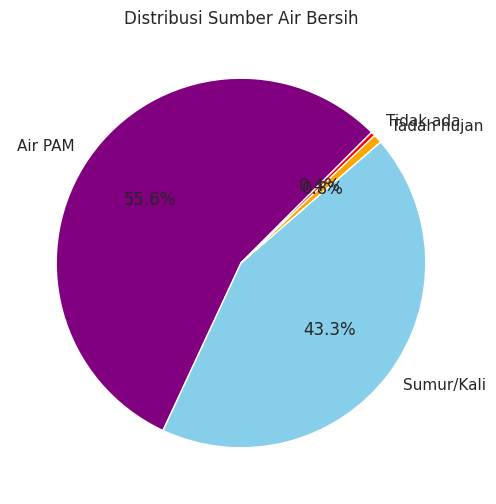

In [ ]:
airbersih_counts = noout_df['Sumber air bersih di tempat tinggal saudara ?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(airbersih_counts, labels=airbersih_counts.index, autopct='%1.1f%%', startangle=45, colors=['Purple','SkyBlue','Orange','Red'])
plt.title('Distribusi Sumber Air Bersih')
plt.show()

Text(0, 0.5, 'Jumlah')

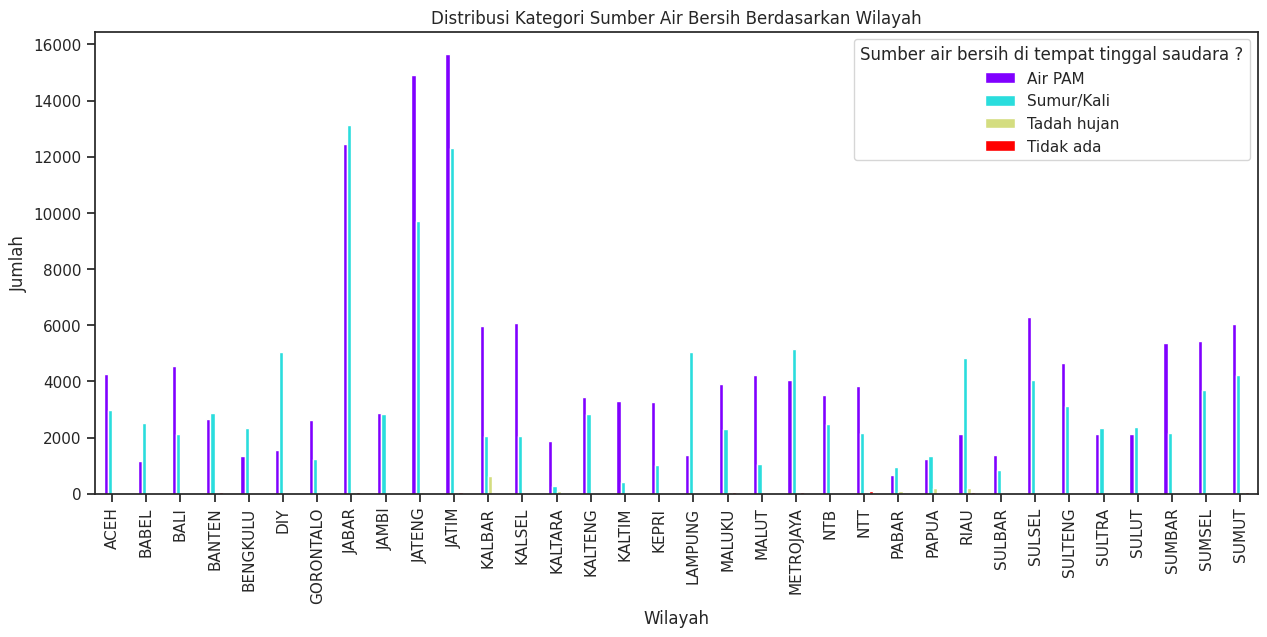

In [ ]:
imt_counts = noout_df.groupby(['WILAYAH', 'Sumber air bersih di tempat tinggal saudara ?']).size().unstack(fill_value=0)
imt_counts.plot(kind='bar', stacked=False, colormap='rainbow', figsize=(15,6))
plt.title('Distribusi Kategori Sumber Air Bersih Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')

SANITASI RUMAH TANGGA

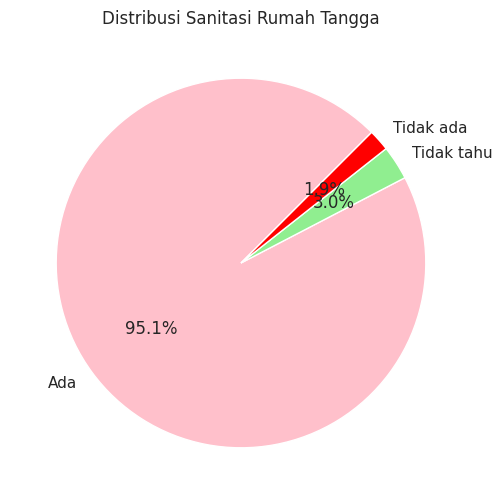

In [ ]:
sanitasi_counts = noout_df['Bagaimana saluran pembuangan air (sanitasi) rumah tangga?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sanitasi_counts, labels=sanitasi_counts.index, autopct='%1.1f%%', startangle=45, colors=['Pink','Lightgreen','Red'])
plt.title('Distribusi Sanitasi Rumah Tangga')
plt.show()

Text(0, 0.5, 'Jumlah')

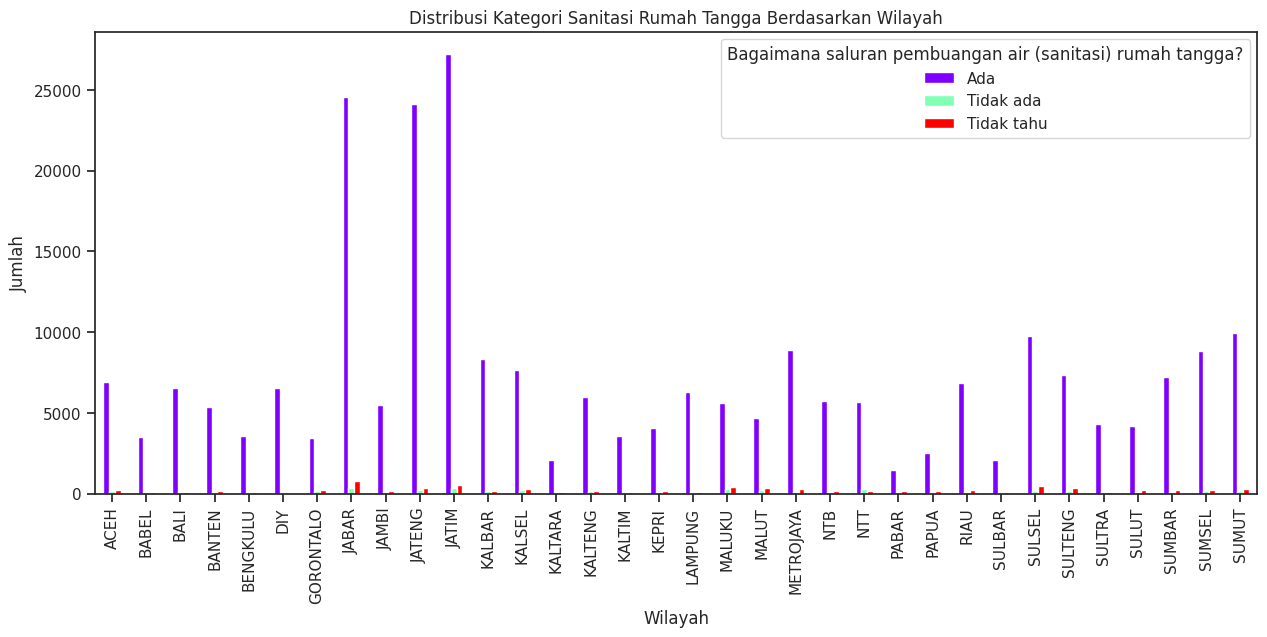

In [ ]:
imt_counts = noout_df.groupby(['WILAYAH', 'Bagaimana saluran pembuangan air (sanitasi) rumah tangga?']).size().unstack(fill_value=0)
imt_counts.plot(kind='bar', stacked=False, colormap='rainbow', figsize=(15,6))
plt.title('Distribusi Kategori Sanitasi Rumah Tangga Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')

PERSEDIAAN TEMPAT SAMPAH

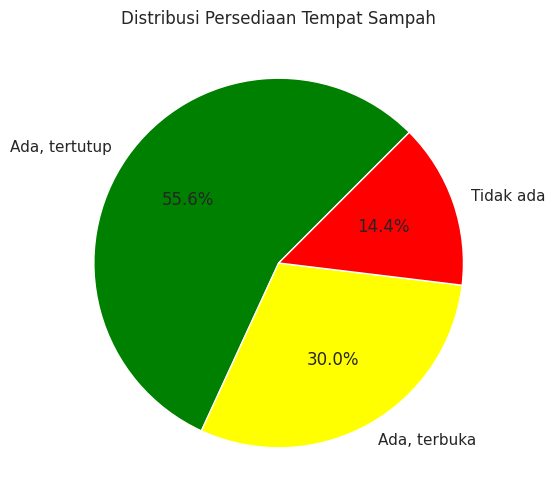

In [ ]:
tempatsampah_counts = noout_df['Apakah terdapat tempat sampah di sekitar rumah? '].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(tempatsampah_counts, labels=tempatsampah_counts.index, autopct='%1.1f%%', startangle=45, colors=['Green','Yellow','Red'])
plt.title('Distribusi Persediaan Tempat Sampah')
plt.show()

Text(0, 0.5, 'Jumlah')

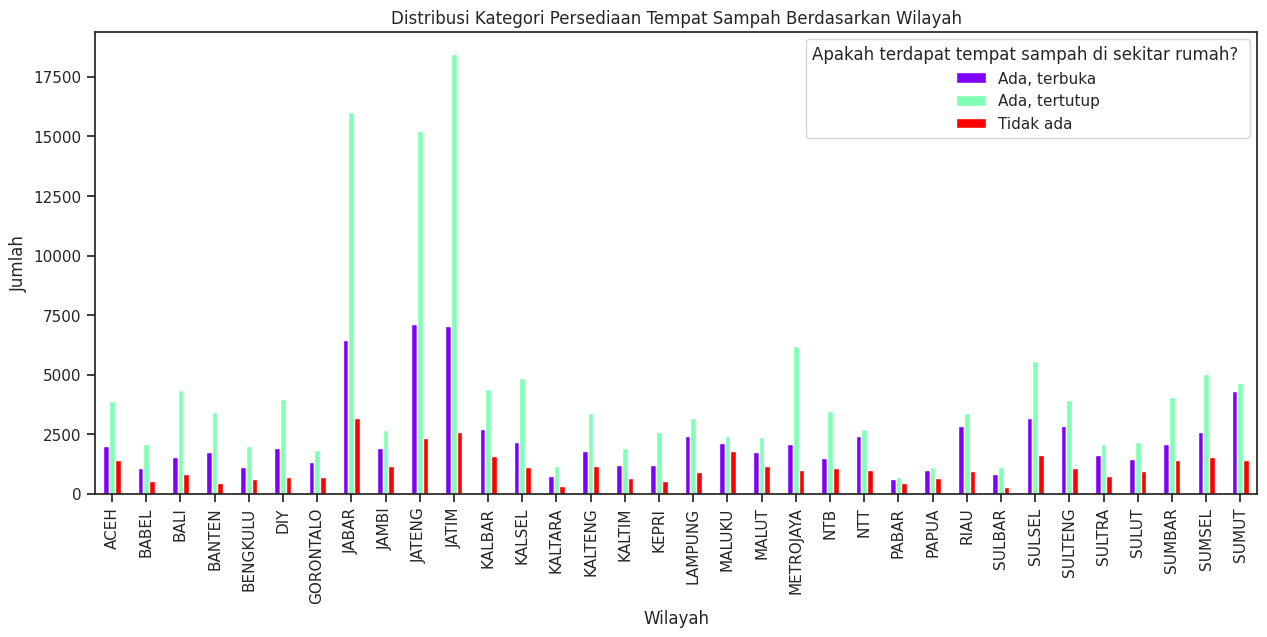

In [ ]:
imt_counts = noout_df.groupby(['WILAYAH', 'Apakah terdapat tempat sampah di sekitar rumah? ']).size().unstack(fill_value=0)
imt_counts.plot(kind='bar', stacked=False, colormap='rainbow', figsize=(15,6))
plt.title('Distribusi Kategori Persediaan Tempat Sampah Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')

PERSEDIAAN FASILITAS UMUM UNTUK KEGIATAN OLAHRAGA

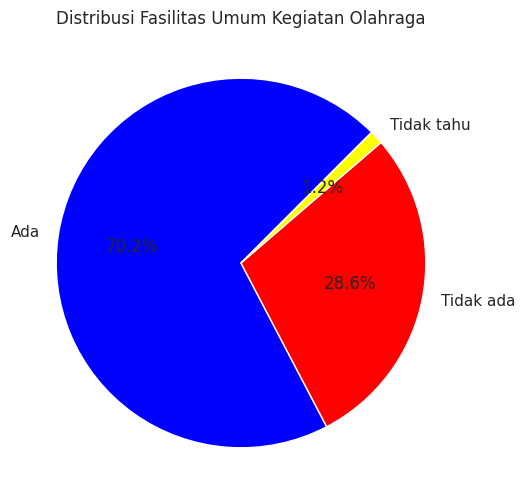

In [ ]:
fasilitasumum_counts = noout_df['Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fasilitasumum_counts, labels=fasilitasumum_counts.index, autopct='%1.1f%%', startangle=45, colors=['Blue','Red','Yellow'])
plt.title('Distribusi Fasilitas Umum Kegiatan Olahraga')
plt.show()

Text(0, 0.5, 'Jumlah')

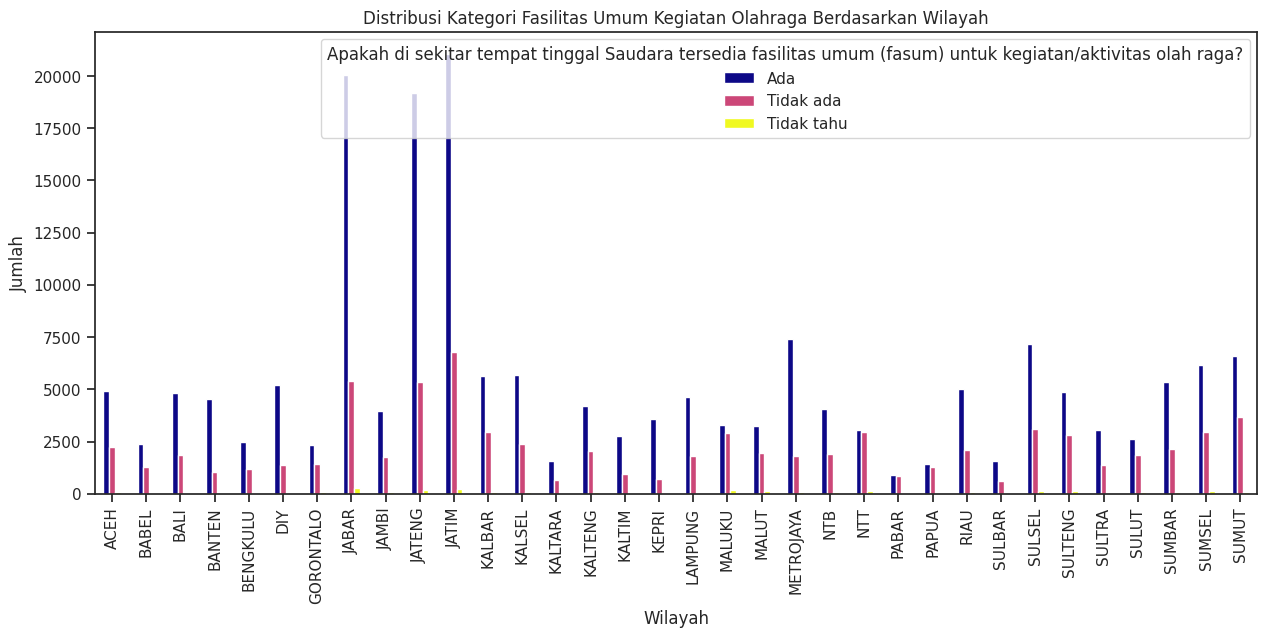

In [ ]:
imt_counts = noout_df.groupby(['WILAYAH', 'Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?']).size().unstack(fill_value=0)
imt_counts.plot(kind='bar', stacked=False, colormap='plasma', figsize=(15,6))
plt.title('Distribusi Kategori Fasilitas Umum Kegiatan Olahraga Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah')

# **MODEL REGRESI LOGISTIK ORDINAL**

In [ ]:
#making new dataframe for the ordinal logit model including its dummy variables

new_columns = [
    'USIA',
    'kategori kesehatan mental',
    'JENIS KELAMIN',
    'Status Perkawinan',
    'PENGELUARAN/BULAN',
    'Apakah saudara merokok ?',
    'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?'
]

df_logit = noout_df[new_columns]
columns_to_encode = df_logit.columns[2:7]

df_logit = pd.get_dummies(df_logit, columns=columns_to_encode)

In [ ]:
#dropping baseline variables
columns_to_drop = [
    'JENIS KELAMIN_PEREMPUAN',
    'Status Perkawinan_Belum Menikah',
    'PENGELUARAN/BULAN_Rp. 2 Juta s.d. 6 Juta',
    'Apakah saudara merokok ?_Ya',
    'Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?_Tidak pernah'
]


df_logit = df_logit.drop(columns=columns_to_drop)

df_logit.head()

USIA kategori kesehatan mental  JENIS KELAMIN_LAKI - LAKI  \
0    34                     sehat                          1   
1    43                     sehat                          1   
2    21                     sehat                          1   
3    40                     sehat                          1   
4    28                     sehat                          1   

   Status Perkawinan_Duda  Status Perkawinan_Janda  Status Perkawinan_Menikah  \
0                       0                        0                          1   
1                       0                        0                          1   
2                       0                        0                          0   
3                       0                        0                          1   
4                       0                        0                          1   

   PENGELUARAN/BULAN_Di atas Rp. 15 Juta  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   PENGELUARAN/BULAN_Rp. 11 Juta s.d. 14 Juta  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   PENGELUARAN/BULAN_Rp. 7 Juta s.d. 10 Juta  Apakah saudara merokok ?_Tidak  \
0                                          1                               0   
1                                          0                               1   
2                                          0                               1   
3                                          1                               1   
4                                          0                               0   

   Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?_Kurang dari 25ml  \
0                                                  0                             
1                                                  0                             
2                                                  0                             
3                                                  0                             
4                                                  0                             

   Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?_lebih dari 25ml  
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                           
4                                                  0

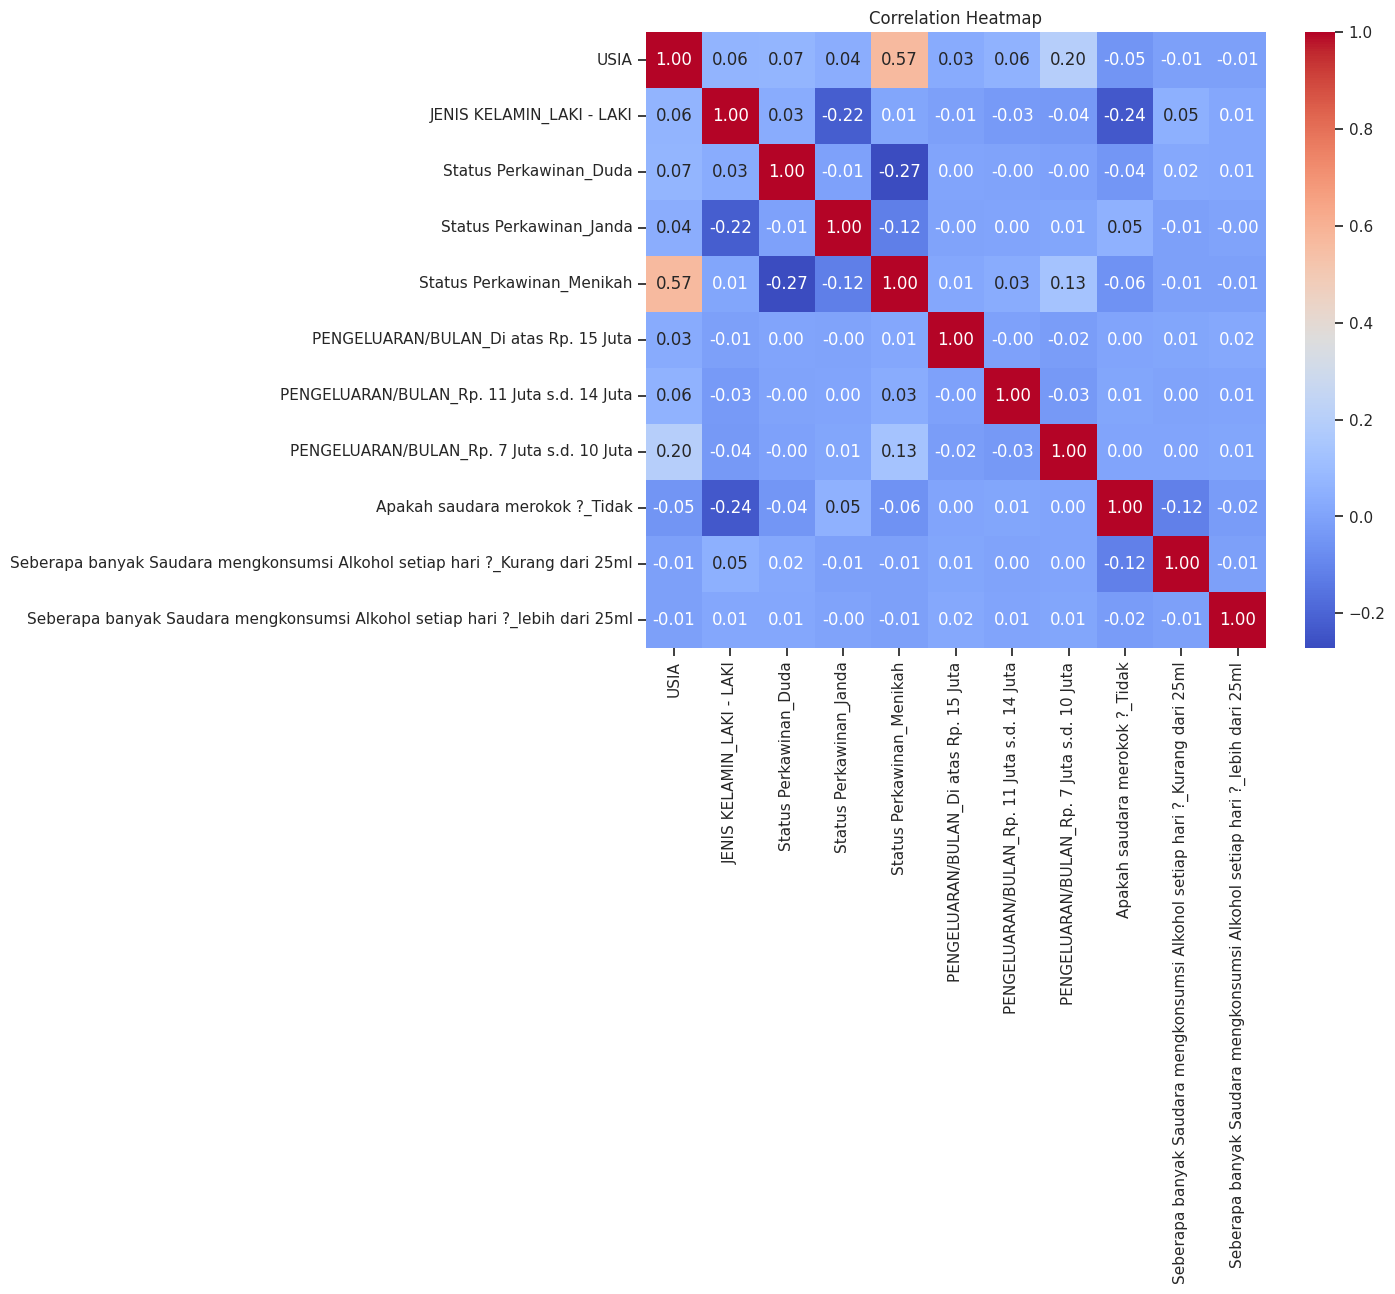

In [ ]:
#checking for multicollinearity
correlation_matrix = df_logit.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')


plt.show()

In [ ]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_num = df_logit.select_dtypes(include = ('uint8'))

X = df_logit.drop(columns=['kategori kesehatan mental'])
vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
#note VIF > 10 ada indikasi multico

                                             Variabel        VIF
0                                                USIA  20.974746
1                           JENIS KELAMIN_LAKI - LAKI   9.592579
2                              Status Perkawinan_Duda   1.207224
3                             Status Perkawinan_Janda   1.084671
4                           Status Perkawinan_Menikah   9.402626
5               PENGELUARAN/BULAN_Di atas Rp. 15 Juta   1.004795
6          PENGELUARAN/BULAN_Rp. 11 Juta s.d. 14 Juta   1.015312
7           PENGELUARAN/BULAN_Rp. 7 Juta s.d. 10 Juta   1.194280
8                      Apakah saudara merokok ?_Tidak   1.931956
9   Seberapa banyak Saudara mengkonsumsi Alkohol s...   1.059056
10  Seberapa banyak Saudara mengkonsumsi Alkohol s...   1.004502


In [ ]:
from sklearn.preprocessing import RobustScaler

#terdapat indikasi multico pada variabel usia, kemungkinan karena belum discaling nilainya
column_names = X.columns.tolist()

scaler = RobustScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=column_names)

#cek ulang VIF
df_num = df_logit.select_dtypes(include = ('uint8'))

vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                             Variabel       VIF
0                                                USIA  1.693594
1                           JENIS KELAMIN_LAKI - LAKI  1.090323
2                              Status Perkawinan_Duda  1.200478
3                             Status Perkawinan_Janda  1.100259
4                           Status Perkawinan_Menikah  1.942254
5               PENGELUARAN/BULAN_Di atas Rp. 15 Juta  1.003552
6          PENGELUARAN/BULAN_Rp. 11 Juta s.d. 14 Juta  1.010394
7           PENGELUARAN/BULAN_Rp. 7 Juta s.d. 10 Juta  1.120259
8                      Apakah saudara merokok ?_Tidak  1.209614
9   Seberapa banyak Saudara mengkonsumsi Alkohol s...  1.058086
10  Seberapa banyak Saudara mengkonsumsi Alkohol s...  1.004524


In [ ]:
#build the model
df_logit.reset_index(drop=True, inplace=True)
target = df_logit['kategori kesehatan mental']

prediktor = X

model_logit = OrderedModel(target, prediktor, distr='logit')

res_log = model_logit.fit(method='bfgs', disp=False)
res_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OrderedModel Results                                
=====================================================================================
Dep. Variable:     kategori kesehatan mental   Log-Likelihood:                -18926.
Model:                          OrderedModel   AIC:                         3.788e+04
Method:                   Maximum Likelihood   BIC:                         3.801e+04
Date:                       Thu, 21 Dec 2023                                         
Time:                               08:40:40                                         
No. Observations:                     263396                                         
Df Residuals:                         263383                                         
Df Model:                                 11                                         
===============================================================================================================================================
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
USIA                                                                           -0.2638      0.033     -7.987      0.000      -0.329      -0.199
JENIS KELAMIN_LAKI - LAKI                                                       0.3067      0.087      3.544      0.000       0.137       0.476
Status Perkawinan_Duda                                                         -1.2415      0.106    -11.719      0.000      -1.449      -1.034
Status Perkawinan_Janda                                                        -1.4131      0.210     -6.738      0.000      -1.824      -1.002
Status Perkawinan_Menikah                                                      -0.4393      0.071     -6.200      0.000      -0.578      -0.300
PENGELUARAN/BULAN_Di atas Rp. 15 Juta                                          -1.4193      0.164     -8.659      0.000      -1.741      -1.098
PENGELUARAN/BULAN_Rp. 11 Juta s.d. 14 Juta                                     -0.7513      0.128     -5.853      0.000      -1.003      -0.500
PENGELUARAN/BULAN_Rp. 7 Juta s.d. 10 Juta                                      -0.3550      0.045     -7.957      0.000      -0.442      -0.268
Apakah saudara merokok ?_Tidak                                                  0.6599      0.038     17.384      0.000       0.586       0.734
Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?_Kurang dari 25ml    -1.2823      0.048    -26.492      0.000      -1.377      -1.187
Seberapa banyak Saudara mengkonsumsi Alkohol setiap hari ?_lebih dari 25ml     -1.9665      0.125    -15.781      0.000      -2.211      -1.722
tidak sehat/kurang sehat                                                       -7.9553      0.083    -95.693      0.000      -8.118      -7.792
kurang sehat/sehat                                                              1.1327      0.024     46.371      0.000       1.085       1.181
===============================================================================================================================================
"""

Model logistik ordinal yang terbentuk sebagai berikut:
![Model](https://github.com/FavianSulthanW/DataMining-BI/blob/main/Model%20logit%20ordinal%20UAS.png?raw=true)

dengan variabel Y adalah "kategori kesehatan mental" di mana,


*  Y = 1 (tidak sehat)
* Y = 2 (kurang sehat)
* Y = 3 (sehat)

Interpretasi:
* Untuk setiap kenaikan 1 usia, odds kesehatan mental seseorang berada di kategori tidak sehat maupun kurang sehat akan menurun sebesar exp(-0.2638) = 0.7681 kali, dengan asumsi variabel lain tetap
* Odds kesehatan mental seorang laki-laki berada di kategori tidak sehat maupun kurang sehat  meningkat sebesar exp(0.3067) = 1.358 kali dari seorang perempuan, dengan asumsi variabel lain tetap
* Odds kesehatan mental seorang duda berada di kategori tidak sehat maupun kurang sehat menurun sebesar exp(-1.2415) = 0.28895 kali dari seseorang yang belum menikah, dengan asumsi variabel lain tetap
* Odds kesehatan mental seorang janda berada di kategori tidak sehat maupun kurang sehat menurun sebesar exp(-1.4131) = 0.24338 kali dari seseorang yang belum menikah, dengan asumsi variabel lain tetap
* Odds kesehatan mental seseorang yang sudah menikah berada di kategori tidak sehat maupun kurang sehat menurun sebesar exp(-0.4393) = 0.64448 kali dari seseorang yang belum menikah
* Odds kesehatan mental orang dengan pengeluaran/bulan > 15 juta berada di kategori tidak sehat maupun kurang sehat menurun sebesar exp(-1.4193) = 0.2443 kali dari seseorang dengan pengeluaran/bulan 2-6 juta, dengan asumsi variabel lain tetap
* Odds kesehatan mental orang dengan pengeluaran/bulan 11-14 juta berada di kategori tidak sehat maupun kurang sehat menurun sebesar exp(-0.7513) = 0.4717 kali dari seseorang dengan pengeluaran/bulan 2-6 juta, dengan asumsi variabel lain tetap
* Odds kesehatan mental orang dengan pengeluaran/bulan 7-10 juta berada di kategori tidak sehat maupun kurang sehat menurun sebesar exp(-0.355) = 0.7011 kali dari seseorang dengan pengeluaran/bulan 2-6 juta, dengan asumsi variabel lain tetap, dengan asumsi variabel lain tetap
* Odds kesehatan mental orang yang tidak merokok berada di kategori tidak sehat maupun kurang sehat meningkat sebesar exp(0.6599) = 1.934 kali orang dari yang merokok, dengan asumsi variabel lain tetap
* Odds kesehatan mental orang yang minum < 25ml alkohol setiap hari berada di kategori tidak sehat maupun kurang sehat menurun sebesar exp(-1.2823) = 0.2773 kali dari orang yang tidak minum alkohol, dengan asumsi variabel lain tetap
* Odds kesehatan mental orang yang minum > 25ml alkohol setiap hari berada di kategori tidak sehat maupun kurang sehat menurun sebesar exp(-1.9665) = 0.13994 kali dari orang yang tidak minum alkohol, dengan asumsi variabel lain tetap

Kesimpulan:
1. **Perempuan** memiliki **odds kesehatan mental sehat lebih tinggi** daripada laki-laki
2. **Seseorang yang sudah menikah** memiliki **odds kesehatan mental sehat lebih tinggi** daripada seorang duda, janda, dan belum menikah. **Orang yang belum menikah** memiliki **odds kesehatan mental sehat terkecil**
3. **Seseorang dengan pengeluaran/bulan > 15 juta** memiliki **odds kesehatan mental sehat lebih tinggi** daripada pengeluaran/bulan 11-14 juta, 7-10 juta, dan 2-6 juta. **Orang yang pengeluaran/bulannya 2-6 juta** memiliki **odds kesehatan mental sehat terkecil**
4. **Seseorang yang merokok** memiliki **odds kesehatan mental sehat lebih tinggi** daripada orang yang tidak merokok
5. **Orang yang minum > 25ml alkohol setiap hari** memiliki **odds kesehatan mental sehat lebih tinggi** daripada orang minum < 25 alkohol setiap hari atau tidak minum alkohol. **Orang yang tidak minum alkohol** memiliki **odds kesehatan mental sehat terkecil**
6. **Semakin tua** seseorang, **odds kesehatan mental sehat akan lebih tinggi**


# Klasifikasi

Klasifikasi akan dibagi menjadi dua bagian, yang pertama adalah menggunakan decision tree dan randomforest untuk mengklasifikasikan imt berdasarkan variabel yang berhubungan dengan gejala kesehatan mental dan riwayat penyakit. Yang kedua adalah dengan menggunakan bantuan catboost untuk mengklasifikasi menggunakan kategori2 yang lain dan secara keseluruhan

#### IMT dengan Kesehatan Mental

In [ ]:
df1=noout_df.copy()

In [ ]:
#ubah var kategorik ke numerik untuk variabel-variabel "kesehatan mental" supaya dapat dibuat pengklasifikasian
mapping = {'Tidak': 0, 'Kadang - kadang': 1, 'Ya': 2}
df1.iloc[:, 31:51] = df1.iloc[:, 31:51].replace(mapping)

In [ ]:
df1.iloc[:, 31:51]

Sering menderita sakit kepala ?  Tidak nafsu makan ?  Sulit tidur ?  \
0                                     1                    0              0   
1                                     0                    0              0   
2                                     1                    0              0   
3                                     0                    0              0   
4                                     1                    0              0   
...                                 ...                  ...            ...   
263391                                0                    0              0   
263392                                0                    0              0   
263393                                0                    0              0   
263394                                0                    0              0   
263395                                0                    0              0   

        Mudah takut ?  Merasa tegang, cemas atau kuatir ?  \
0                   0                                   0   
1                   0                                   0   
2                   1                                   0   
3                   0                                   0   
4                   0                                   0   
...               ...                                 ...   
263391              0                                   0   
263392              0                                   0   
263393              0                                   0   
263394              0                                   0   
263395              0                                   0   

        Tangan anda gemetar ?  Pencernaan anda terganggu / buruk ?  \
0                           0                                    0   
1                           0                                    0   
2                           0                                    0   
3                           0                                    0   
4                           0                                    0   
...                       ...                                  ...   
263391                      0                                    0   
263392                      0                                    0   
263393                      0                                    0   
263394                      0                                    0   
263395                      0                                    0   

        Sulit untuk berpikir jernih ?  Merasa tidak bahagia ?  \
0                                   0                       0   
1                                   0                       0   
2                                   0                       0   
3                                   0                       0   
4                                   0                       0   
...                               ...                     ...   
263391                              0                       0   
263392                              0                       0   
263393                              0                       0   
263394                              0                       0   
263395                              0                       0   

        Menangis lebih sering ?  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   
...                         ...   
263391                        0   
263392                        0   
263393                        0   
263394                        0   
263395                        0   

        Merasa sulit untuk menikmati kegiatan sehari – hari?  \
0                                                       0      
1                                                       0      
2                                                       0      
3                          

In [ ]:
df1.drop(df1.iloc[:, 0:31], inplace=True, axis=1) #buang yang bukan variabel-variabel "kesehatan mental"

In [ ]:
df1.drop(df1.iloc[:, 20:45], inplace=True, axis=1) #buang yang bukan variabel-variabel "kesehatan mental"

In [ ]:
#buat variabel y dan x
y=df1['IMT']
x=df1.iloc[:,0:20]

In [ ]:
y #cek variabel responnya (IMT)

0         Obesitas
1           Normal
2           Normal
3         Obesitas
4           Normal
            ...   
263391      Normal
263392      Normal
263393      Normal
263394      Normal
263395       Kurus
Name: IMT, Length: 263396, dtype: object

In [ ]:
#splitting ke train and test data
df1_train, df1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.3, random_state=33)
print(df1_train.shape, df1_test.shape)

(184377, 20) (79019, 20)


DECISION TREE

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter untuk sementara
DT = DT.fit(df1_train, y1_train)
y_DT1 = DT.predict(df1_test)

print(confusion_matrix(y1_test, y_DT1))
print(classification_report(y1_test, y_DT1))

[[  648     8 17034  1005     0]
 [   14     1   178    15     0]
 [ 1148    14 35054  1806     1]
 [  923    12 19576  1581     0]
 [    0     0     1     0     0]]
              precision    recall  f1-score   support

       Gemuk       0.24      0.03      0.06     18695
       Kurus       0.03      0.00      0.01       208
      Normal       0.49      0.92      0.64     38023
    Obesitas       0.36      0.07      0.12     22092
Sangat Kurus       0.00      0.00      0.00         1

    accuracy                           0.47     79019
   macro avg       0.22      0.21      0.17     79019
weighted avg       0.39      0.47      0.35     79019



Diperoleh hasil akurasinya yang cukup buruk yakni 0.47

In [ ]:
DT.feature_importances_ #feature importance

array([0.0531841 , 0.03146507, 0.0678962 , 0.06436569, 0.05663276,
       0.06362787, 0.04728165, 0.06871243, 0.06758279, 0.03471491,
       0.04903537, 0.06530371, 0.05391929, 0.04154959, 0.04889047,
       0.0357055 , 0.01170619, 0.06689262, 0.05319901, 0.01833476])

In [ ]:
# Buat model
trees = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(trees, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
#execute model
%%time
tree1.fit(df1_train, y1_train)

CPU times: user 3min 18s, sys: 3.12 s, total: 3min 21s
Wall time: 4min 3s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'roc_auc', 'precision', 'recall', 'f1'})

In [ ]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=x.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

gini_importance
Tidak nafsu makan ?                         0.368407
Sering menderita sakit kepala ?             0.332863
Mudah lelah ?                               0.101905
Mengalami rasa tidak enak di perut?         0.089610
Sulit tidur ?                               0.062912
Pencernaan anda terganggu / buruk ?         0.044303

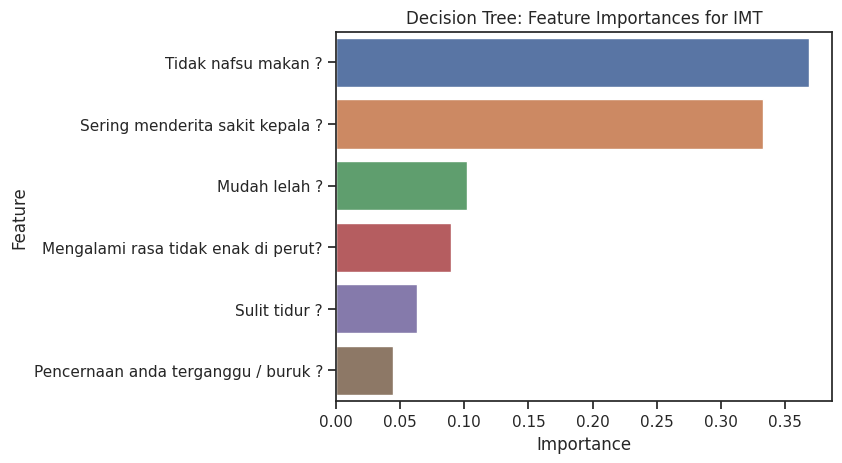

In [ ]:
# Buat plot feature importance
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for IMT", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

Diperoleh bahwa "tidak nafsu makan" dan "sering menderita sakit kepala" paling berpengaruh terhadap pengklasifikasian IMT

In [ ]:
!pip install graphviz
!pip install six
!pip install pydotplus
# Untuk memplot decision tree

In [ ]:
y_class_names=list(noout_df['IMT'].unique()) #inisiasi untuk grafik nanti

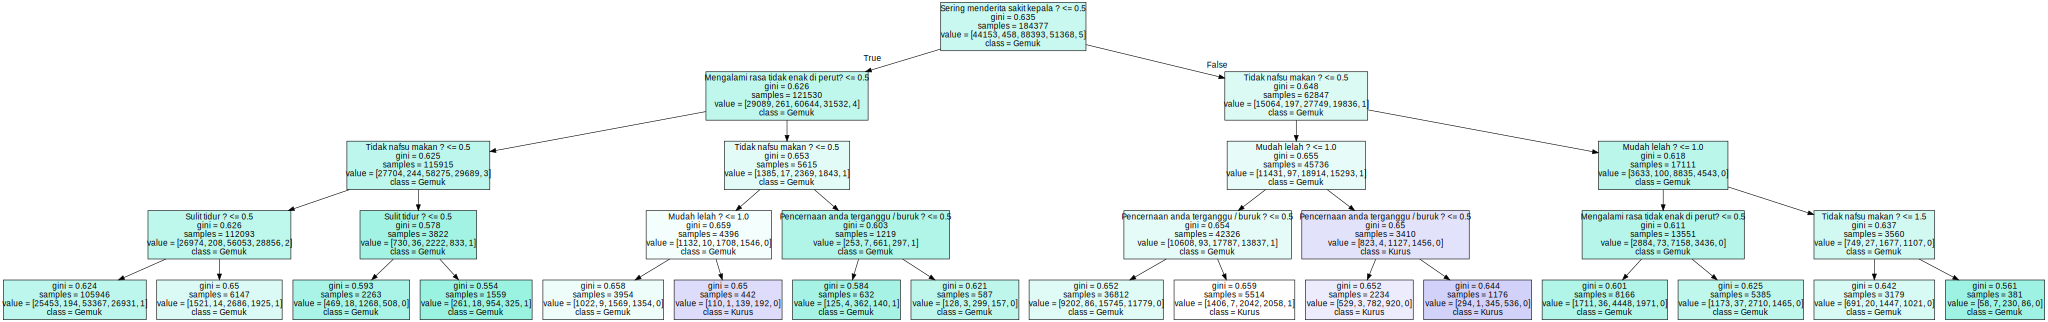

In [ ]:
#grafik decision tree
import graphviz
from graphviz import Source
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# DOT data
dot_data = tree.export_graphviz(tree1.best_estimator_, out_file=None,
                                feature_names=x.columns,
                                class_names=y_class_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

RANDOM FOREST

In [ ]:
# Mari coba perbaiki dengan Random Forest
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf = RandomForestClassifier()
rf.fit(df1_train, y1_train)
y_rf1 = rf.predict(df1_test)

# Hasil/akurasi model
print(confusion_matrix(y1_test, y_rf1))
print(classification_report(y1_test, y_rf1))

[[  358     1 17160  1176     0]
 [    4     0   185    19     0]
 [  645     4 35387  1987     0]
 [  521     2 19809  1760     0]
 [    0     0     1     0     0]]
              precision    recall  f1-score   support

       Gemuk       0.23      0.02      0.04     18695
       Kurus       0.00      0.00      0.00       208
      Normal       0.49      0.93      0.64     38023
    Obesitas       0.36      0.08      0.13     22092
Sangat Kurus       0.00      0.00      0.00         1

    accuracy                           0.47     79019
   macro avg       0.22      0.21      0.16     79019
weighted avg       0.39      0.47      0.35     79019



Diperoleh akurasi modelnya 0.47 yang mana masih lebih baik dengan decision tree

In [ ]:
# Varible importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(20):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.077302)
2. feature 0 (0.076046)
3. feature 4 (0.064274)
4. feature 5 (0.061271)
5. feature 7 (0.060771)
6. feature 11 (0.059013)
7. feature 8 (0.058730)
8. feature 17 (0.054566)
9. feature 3 (0.054405)
10. feature 6 (0.053939)
11. feature 18 (0.053869)
12. feature 10 (0.048272)
13. feature 14 (0.047954)
14. feature 12 (0.047457)
15. feature 1 (0.046587)
16. feature 15 (0.036179)
17. feature 13 (0.032848)
18. feature 9 (0.029689)
19. feature 19 (0.026963)
20. feature 16 (0.009865)


Diperoleh urutan feature yang paling berpengaruh terhadapa pengklasifikasian random forest

#### IMT dengan Riwayat Penyakit





In [ ]:
df2 = noout_df.copy()

In [ ]:
#ubah kategorik ke numerik buat variabel-variabel "riwayat penyakit"
mapping = {'Tidak': 0, 'Ya': 1}
df2.iloc[:, 11:31] = df2.iloc[:, 11:31].replace(mapping)

In [ ]:
x=df2.iloc[:,11:31]

In [ ]:
x.head()

Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?  \
0                                                  0                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?  \
0                                                  0                              
1                                                  0                              
2                                                  0                              
3                                                  0                              
4                                                  0                              

   Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?  \
0                                                  0                        
1                                                  0                        
2                                                  0                        
3                                                  0                        
4                                                  0                        

   Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?  \
0                                                  0                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?  \
0                                                  0                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?  \
0                                                  0                           
1                                                  0                           
2                                                  0                           
3                                                  0                           
4                                                  0                           

   Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?  \
0                                                  1                     
1                                                  0                     
2                                                  0                     
3                                                  0                 

In [ ]:
#splitting ke train and test data
df2_train, df2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.3, random_state=33)
print(df2_train.shape, df2_test.shape)

(184377, 20) (79019, 20)


DECISION TREE

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
clf =DecisionTreeClassifier()
# Sengaja menggunakan default parameter
clf = clf.fit(df2_train, y2_train)
y_DT2 = clf.predict(df2_test)

print(confusion_matrix(y2_test, y_DT2))
print(classification_report(y2_test, y_DT2))

[[  114     2 17448  1131     0]
 [    2     0   200     6     0]
 [  191     1 36468  1363     0]
 [  218     2 19694  2178     0]
 [    0     0     1     0     0]]
              precision    recall  f1-score   support

       Gemuk       0.22      0.01      0.01     18695
       Kurus       0.00      0.00      0.00       208
      Normal       0.49      0.96      0.65     38023
    Obesitas       0.47      0.10      0.16     22092
Sangat Kurus       0.00      0.00      0.00         1

    accuracy                           0.49     79019
   macro avg       0.24      0.21      0.17     79019
weighted avg       0.42      0.49      0.36     79019



Diperoleh akurasinya 0.49, yang mana juga masih kurang baik

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
#execute
%%time
tree1.fit(df2_train, y2_train)

CPU times: user 2min 55s, sys: 2.99 s, total: 2min 58s
Wall time: 3min 21s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy', 'roc_auc', 'precision', 'recall', 'f1'})

In [ ]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=x.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

gini_importance
Apakah saudara pernah di diagnosa atau menderit...         0.775620
Apakah saudara pernah di diagnosa atau menderit...         0.086810
Apakah saudara pernah di diagnosa atau menderit...         0.059388
Apakah saudara pernah di diagnosa atau menderit...         0.033974
Apakah saudara pernah di diagnosa atau menderit...         0.013293
Apakah saudara pernah di diagnosa atau menderit...         0.010180
Apakah saudara pernah di diagnosa atau menderit...         0.009021
Apakah saudara pernah di diagnosa atau menderit...         0.005130
Apakah saudara pernah di diagnosa atau menderit...         0.004911
Apakah saudara pernah di diagnosa atau menderit...         0.001672

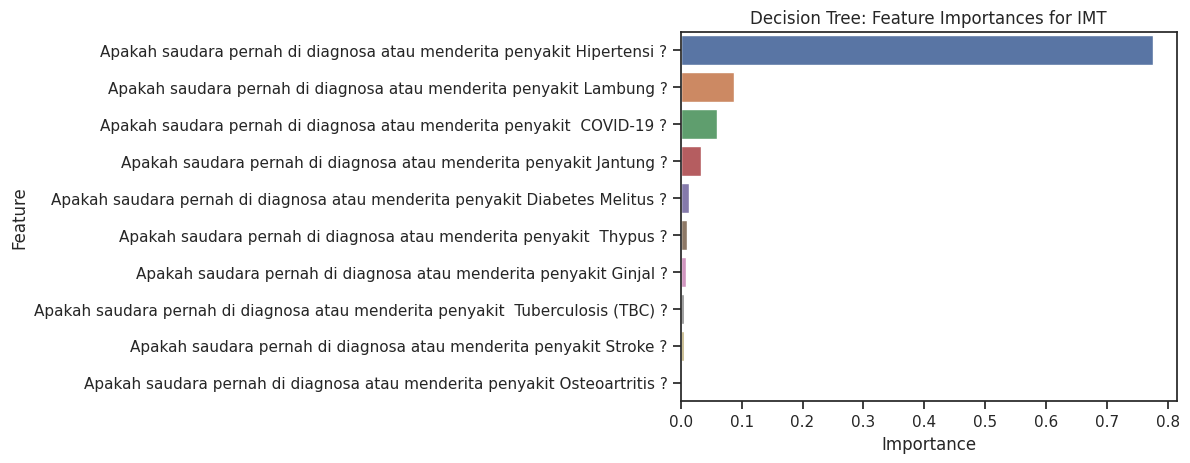

In [ ]:
#plot feature importance
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for IMT", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

Dapat dilihat bahwa riwayat penyakit hipertensi paling berpengaruh terhadap pengklasifikasian IMT

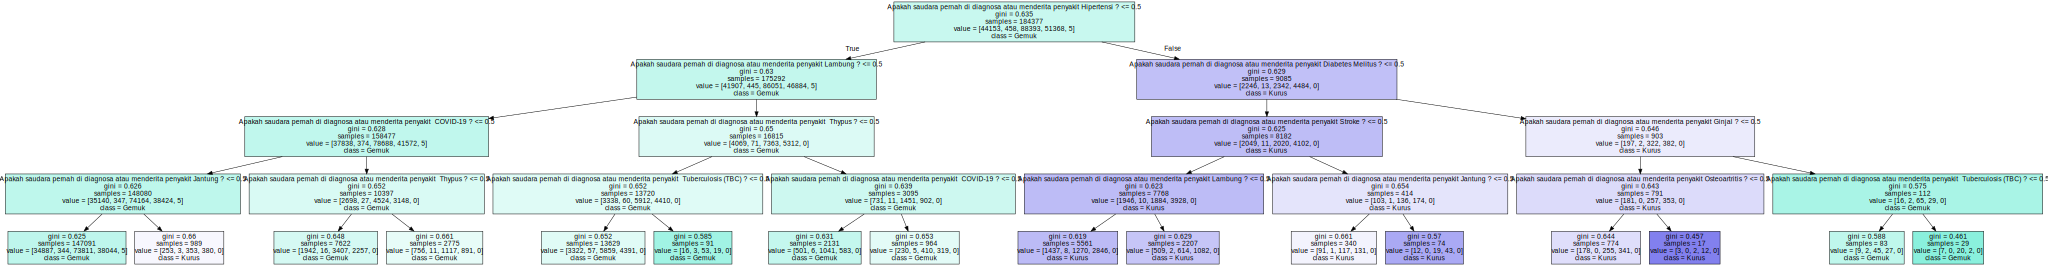

In [ ]:
# graph decision tree
from graphviz import Source
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dot_data2 = tree.export_graphviz(tree1.best_estimator_, out_file=None,
                                feature_names=x.columns,
                                class_names=y_class_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data2, format="png")
graph

RANDOM FOREST

In [ ]:
#Random Forest
rf.fit(df2_train, y2_train)
y_rf2 = rf.predict(df2_test)

print(confusion_matrix(y2_test, y_rf2))
print(classification_report(y2_test, y_rf2))

[[   77     0 17437  1181     0]
 [    1     0   201     6     0]
 [  136     2 36454  1431     0]
 [  149     1 19659  2283     0]
 [    0     0     1     0     0]]
              precision    recall  f1-score   support

       Gemuk       0.21      0.00      0.01     18695
       Kurus       0.00      0.00      0.00       208
      Normal       0.49      0.96      0.65     38023
    Obesitas       0.47      0.10      0.17     22092
Sangat Kurus       0.00      0.00      0.00         1

    accuracy                           0.49     79019
   macro avg       0.23      0.21      0.17     79019
weighted avg       0.42      0.49      0.36     79019



Akurasi randomforest juga tidak terlalu baik yakni 0.49

#### IMT dengan Kebiasaan Menjaga Diri

In [ ]:
# akan digunakan package catboost, karena variabel tidak mudah untuk dibuat numerik

In [ ]:
!pip3 install catboost

from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.8 MB/s eta 0:00:00


In [ ]:
df3 = noout_df.copy()

In [ ]:
df3 = df3.fillna("Tidak") #fill na dengan tidak (anggapan bahwa tidak mengisi berarti menjawab tidak)

In [ ]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
x3 = df3.iloc[:, 51:67]
y = df3['IMT']
categorical_features = list(x3.columns)
# Define which features are categorical
# split the data into training and 'testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.3)

model = cb.CatBoostClassifier(iterations=100,learning_rate=0.1,loss_function='MultiClass')
#iterasi dibatasi sampai 100 karena terlalu memakan waktu lam dan sudah cukup konvergen di kisaran 100
# Fit the model on the training data
model.fit(x3_train, y3_train, cat_features=categorical_features,eval_set=(x3_test, y3_test))
# execute predictions on the test data
y3_pred = model.predict(x3_test)

0:	learn: 1.5303923	test: 1.5303948	best: 1.5303948 (0)	total: 1.65s	remaining: 2m 43s
1:	learn: 1.4671620	test: 1.4671718	best: 1.4671718 (1)	total: 2.69s	remaining: 2m 11s
2:	learn: 1.4149124	test: 1.4149542	best: 1.4149542 (2)	total: 4.03s	remaining: 2m 10s
3:	learn: 1.3713232	test: 1.3713789	best: 1.3713789 (3)	total: 4.83s	remaining: 1m 56s
4:	learn: 1.3341370	test: 1.3342262	best: 1.3342262 (4)	total: 5.96s	remaining: 1m 53s
5:	learn: 1.3022450	test: 1.3023670	best: 1.3023670 (5)	total: 7.09s	remaining: 1m 51s
6:	learn: 1.2746721	test: 1.2748262	best: 1.2748262 (6)	total: 8.22s	remaining: 1m 49s
7:	learn: 1.2506807	test: 1.2508662	best: 1.2508662 (7)	total: 9.49s	remaining: 1m 49s
8:	learn: 1.2296978	test: 1.2299141	best: 1.2299141 (8)	total: 11.4s	remaining: 1m 55s
9:	learn: 1.2112687	test: 1.2115152	best: 1.2115152 (9)	total: 13.1s	remaining: 1m 58s
10:	learn: 1.1950262	test: 1.1953024	best: 1.1953024 (10)	total: 14.3s	remaining: 1m 55s
11:	learn: 1.1806693	test: 1.1809746	best

In [ ]:
# Evaluasi Performa Model
print(confusion_matrix(y3_test, y3_pred))
print(classification_report(y3_test, y3_pred))

[[    0     0 17836   949     0]
 [    0     0   201    12     0]
 [    0     0 36571  1378     0]
 [    0     0 20450  1619     0]
 [    0     0     3     0     0]]
              precision    recall  f1-score   support

       Gemuk       0.00      0.00      0.00     18785
       Kurus       0.00      0.00      0.00       213
      Normal       0.49      0.96      0.65     37949
    Obesitas       0.41      0.07      0.12     22069
Sangat Kurus       0.00      0.00      0.00         3

    accuracy                           0.48     79019
   macro avg       0.18      0.21      0.15     79019
weighted avg       0.35      0.48      0.35     79019



Akurasinya hampir sama dengan kategori2 sebelumnya dan masih cukup buruk yakni 0.48

Text(0.5, 1.0, 'Feature Importance')

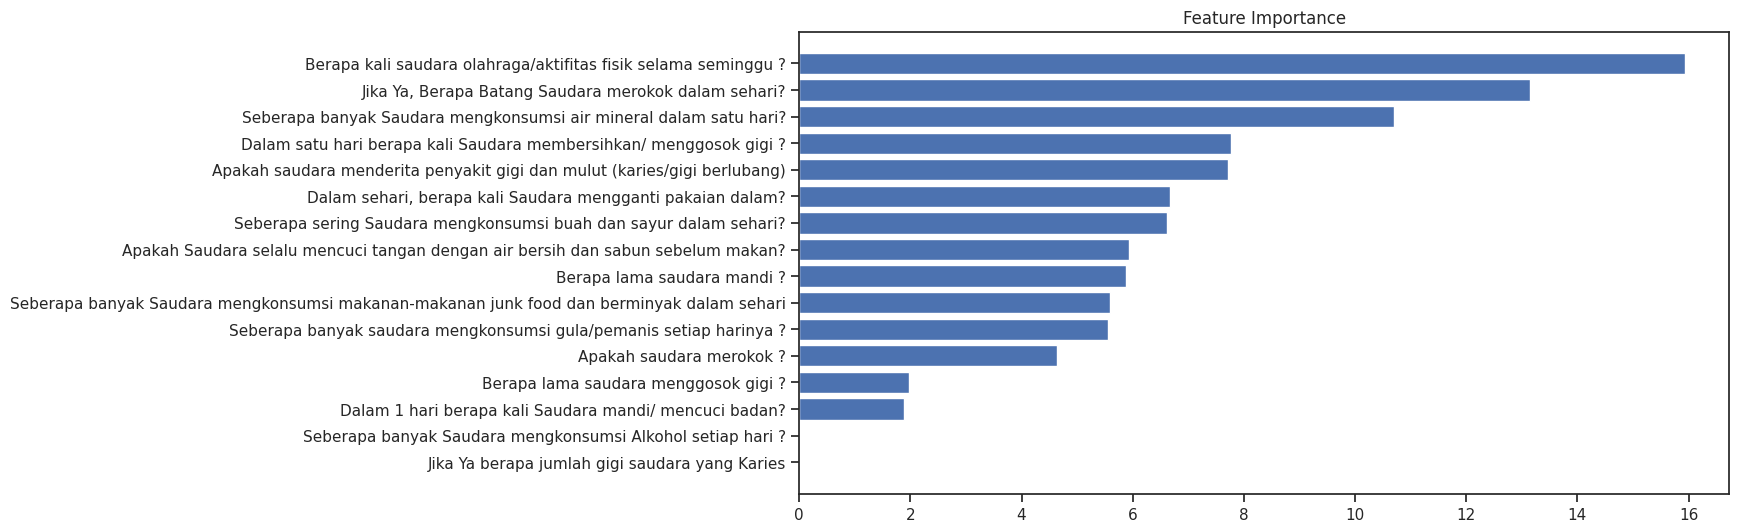

In [ ]:
#feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x3_test.columns)[sorted_idx])
plt.title('Feature Importance')

Terlihat bahwa variabel "Berapa kali saudara berolahraga/aktivitas fisik dalam seminggu" mempunyai kontribusi yang besar pada pengklasifikasian IMT

#### IMT dengan Lingkugan Hidup

In [ ]:
# Untuk Lingkungan Hidup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
x4 = df3.iloc[:, 67:76]
y = df3['IMT']
categorical_features = list(x4.columns)
# Define which features are categorical
# split the data into training and 'testing sets
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y, test_size=0.3)

model = cb.CatBoostClassifier(iterations=100,learning_rate=0.1,loss_function='MultiClass')
# Fit the model on the training data
model.fit(x4_train, y4_train, cat_features=categorical_features,eval_set=(x4_test, y4_test))
# i'tike predictions on the test data
y4_pred = model.predict(x4_test)

0:	learn: 1.5307467	test: 1.5313066	best: 1.5313066 (0)	total: 736ms	remaining: 1m 12s
1:	learn: 1.4677240	test: 1.4687054	best: 1.4687054 (1)	total: 2.21s	remaining: 1m 48s
2:	learn: 1.4158500	test: 1.4171662	best: 1.4171662 (2)	total: 3.8s	remaining: 2m 2s
3:	learn: 1.3723470	test: 1.3739381	best: 1.3739381 (3)	total: 4.37s	remaining: 1m 44s
4:	learn: 1.3353748	test: 1.3371932	best: 1.3371932 (4)	total: 5.52s	remaining: 1m 44s
5:	learn: 1.3036337	test: 1.3056445	best: 1.3056445 (5)	total: 6.5s	remaining: 1m 41s
6:	learn: 1.2761691	test: 1.2783450	best: 1.2783450 (6)	total: 7.11s	remaining: 1m 34s
7:	learn: 1.2522573	test: 1.2545759	best: 1.2545759 (7)	total: 7.69s	remaining: 1m 28s
8:	learn: 1.2313337	test: 1.2337770	best: 1.2337770 (8)	total: 8.31s	remaining: 1m 23s
9:	learn: 1.2129497	test: 1.2155026	best: 1.2155026 (9)	total: 9.57s	remaining: 1m 26s
10:	learn: 1.1967412	test: 1.1993918	best: 1.1993918 (10)	total: 10.1s	remaining: 1m 21s
11:	learn: 1.1824112	test: 1.1851483	best: 1

In [ ]:
# Evaluasi Performa Model
print(confusion_matrix(y4_test, y4_pred))
print(classification_report(y4_test, y4_pred))

[[    0     0 18916     0     0]
 [    0     0   212     0     0]
 [    0     0 37647     0     0]
 [    0     0 22243     0     0]
 [    0     0     1     0     0]]
              precision    recall  f1-score   support

       Gemuk       0.00      0.00      0.00     18916
       Kurus       0.00      0.00      0.00       212
      Normal       0.48      1.00      0.65     37647
    Obesitas       0.00      0.00      0.00     22243
Sangat Kurus       0.00      0.00      0.00         1

    accuracy                           0.48     79019
   macro avg       0.10      0.20      0.13     79019
weighted avg       0.23      0.48      0.31     79019



Akurasinya hampir sama dengan kategori2 sebelumnya dan masih cukup buruk yakni 0.48

Text(0.5, 1.0, 'Feature Importance')

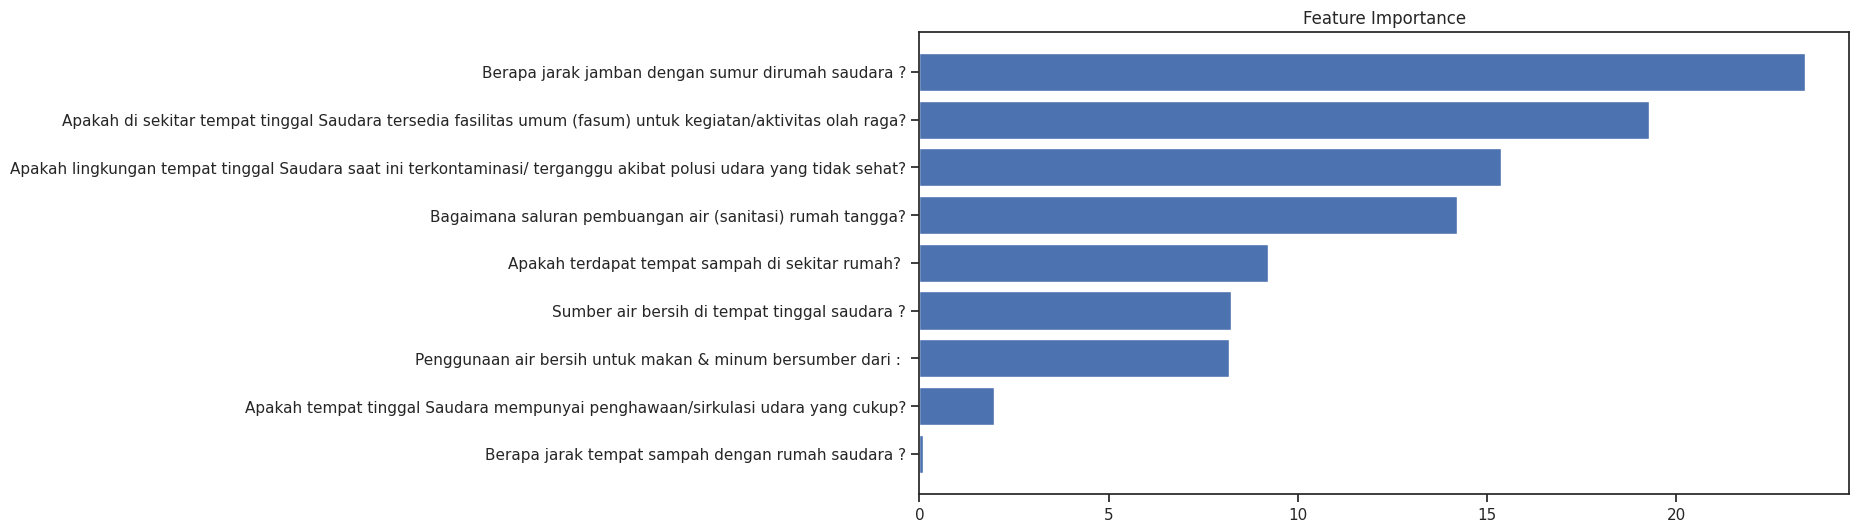

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x4_test.columns)[sorted_idx])
plt.title('Feature Importance')

Terlihat bahwa variabel "jarak jamban dengan sumur" serta "apakah di sekitar tempat tinggal tersedia fasum untuk kegiatan olahraga" memiliki kontribusi yang cukup besar terhadap pengklasifikasian IMT

#### IMT dengan Identitas

In [ ]:
# Untuk Identitas
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the dataset
feature = ['WILAYAH','JENIS KELAMIN','USIA','PENDIDIKAN TERAKHIR','Status Perkawinan','PENGELUARAN/BULAN']
x5 = noout_df[feature]
y = noout_df['IMT']
# Define which features are categorical
categorical_features = ['WILAYAH','JENIS KELAMIN','PENDIDIKAN TERAKHIR','Status Perkawinan','PENGELUARAN/BULAN']
# split the data into training and 'testing sets
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y, test_size=0.3)

model = cb.CatBoostClassifier(iterations=100,learning_rate=0.1,loss_function='MultiClass')
# Fit the model on the training data
model.fit(x5_train, y5_train, cat_features=categorical_features,eval_set=(x5_test, y5_test))
# i'tike predictions on the test data
y5_pred = model.predict(x5_test)

0:	learn: 1.5179444	test: 1.5175808	best: 1.5175808 (0)	total: 1.18s	remaining: 1m 56s
1:	learn: 1.4477860	test: 1.4471819	best: 1.4471819 (1)	total: 2.14s	remaining: 1m 45s
2:	learn: 1.3917016	test: 1.3909348	best: 1.3909348 (2)	total: 2.89s	remaining: 1m 33s
3:	learn: 1.3442206	test: 1.3433235	best: 1.3433235 (3)	total: 4.22s	remaining: 1m 41s
4:	learn: 1.3043735	test: 1.3033895	best: 1.3033895 (4)	total: 5.45s	remaining: 1m 43s
5:	learn: 1.2704676	test: 1.2693956	best: 1.2693956 (5)	total: 6.43s	remaining: 1m 40s
6:	learn: 1.2412347	test: 1.2401215	best: 1.2401215 (6)	total: 7.7s	remaining: 1m 42s
7:	learn: 1.2161047	test: 1.2149446	best: 1.2149446 (7)	total: 9.26s	remaining: 1m 46s
8:	learn: 1.1940438	test: 1.1928680	best: 1.1928680 (8)	total: 10.9s	remaining: 1m 50s
9:	learn: 1.1748564	test: 1.1736492	best: 1.1736492 (9)	total: 12.2s	remaining: 1m 49s
10:	learn: 1.1577600	test: 1.1565421	best: 1.1565421 (10)	total: 12.8s	remaining: 1m 43s
11:	learn: 1.1427239	test: 1.1415091	best:

In [ ]:
# Evaluasi Performa Model
print(confusion_matrix(y5_test, y5_pred))
print(classification_report(y5_test, y5_pred))

[[    0     0 16127  2741     0]
 [    0     0   199    10     0]
 [    0     0 34744  3327     0]
 [    0     0 18138  3732     0]
 [    0     0     1     0     0]]
              precision    recall  f1-score   support

       Gemuk       0.00      0.00      0.00     18868
       Kurus       0.00      0.00      0.00       209
      Normal       0.50      0.91      0.65     38071
    Obesitas       0.38      0.17      0.24     21870
Sangat Kurus       0.00      0.00      0.00         1

    accuracy                           0.49     79019
   macro avg       0.18      0.22      0.18     79019
weighted avg       0.35      0.49      0.38     79019



Akurasinya hampir sama dengan kategori2 sebelumnya dan masih cukup buruk yakni 0.49

Text(0.5, 1.0, 'Feature Importance')

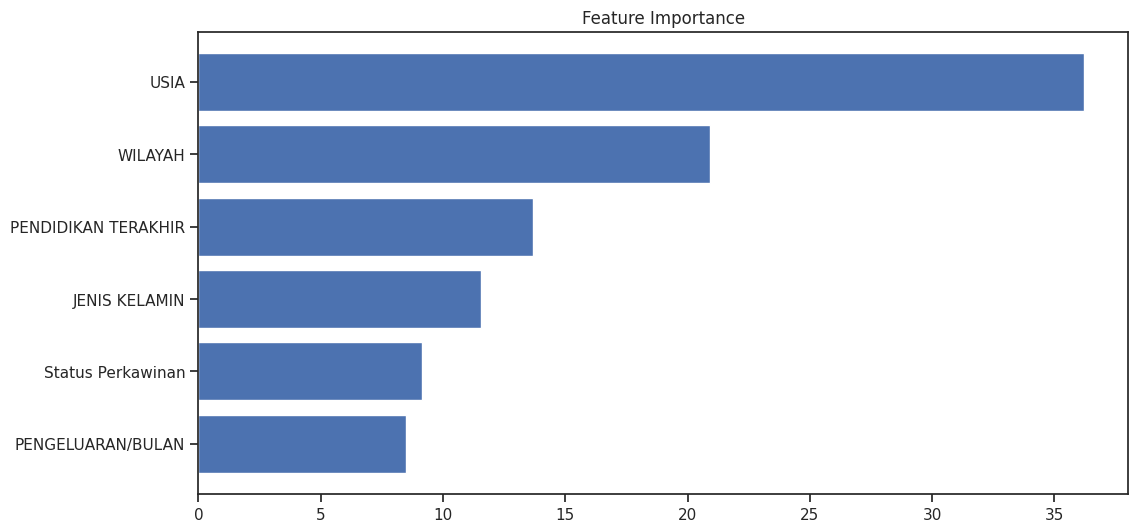

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x5_test.columns)[sorted_idx])
plt.title('Feature Importance')

Dapat dilihat bahwa "USIA" berkontribusi besar terhadap pengklasifikasian IMT

#### Dengan keseluruhan variabel (kecuali berat dan tinggi)

In [ ]:
df4 = df3.copy()

In [ ]:
df4.drop(df4.iloc[:, 6:8], inplace=True, axis=1) #drop berat badan dan tinggi

In [ ]:
df4.head()

ID WILAYAH JENIS KELAMIN  USIA  LAMA BERDINAS PENDIDIKAN TERAKHIR  \
0   1  KALBAR   LAKI - LAKI  34.0           16.0                 SMA   
1   2  KALBAR   LAKI - LAKI  43.0           23.0                 SMA   
2   3  KALBAR   LAKI - LAKI  21.0            1.0                 SMA   
3   4  KALBAR   LAKI - LAKI  40.0           23.0                  S2   
4   5  KALBAR   LAKI - LAKI  28.0            9.0                 SMA   

   LINGKAR PINGGANG Status Perkawinan        PENGELUARAN/BULAN  \
0             100.0           Menikah  Rp. 7 Juta s.d. 10 Juta   
1              80.0           Menikah   Rp. 2 Juta s.d. 6 Juta   
2              78.0     Belum Menikah   Rp. 2 Juta s.d. 6 Juta   
3              34.0           Menikah  Rp. 7 Juta s.d. 10 Juta   
4              32.0           Menikah   Rp. 2 Juta s.d. 6 Juta   

  Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?  ...  \
0                                              Tidak                   ...   
1                                              Tidak                   ...   
2                                              Tidak                   ...   
3                                              Tidak                   ...   
4                                              Tidak                   ...   

  Sumber air bersih di tempat tinggal saudara ?  \
0                                       Air PAM   
1                                       Air PAM   
2                                       Air PAM   
3                                       Air PAM   
4                                       Air PAM   

  Penggunaan air bersih untuk makan & minum bersumber dari :   \
0                                        Tadah hujan            
1                              Air mineral isi ulang            
2                              Air mineral isi ulang            
3                              Air mineral isi ulang            
4                              Air mineral isi ulang            

  Berapa jarak jamban dengan sumur dirumah saudara ?  \
0                                Lebih dari 12 meter   
1                                Lebih dari 12 meter   
2                        Tidak memiliki jamban sehat   
3                        Tidak memiliki jamban sehat   
4                                Lebih dari 12 meter   

  Bagaimana saluran pembuangan air (sanitasi) rumah tangga?  \
0                                                Ada          
1                                                Ada          
2                                                Ada          
3                                                Ada          
4                                                Ada          

  Apakah terdapat tempat sampah di sekitar rumah?   \
0                                     Ada, terbuka   
1                                    Ada, tertutup   
2                                        Tidak ada   
3                                    Ada, tertutup   
4                                    Ada, tertutup   

  Berapa jarak tempat sampah dengan rumah saudara ?  \
0                               Lebih dari 10 meter   
1                               Lebih dari 10 meter   
2                                                 -   
3                               Lebih dari 10 meter   
4                               Lebih dari 10 meter   

  Apakah di sekitar tempat tinggal Saudara tersedia fasilitas umum (fasum) untuk kegiatan/aktivitas olah raga?  \
0                                          Tidak ada                                                             
1                                          Tidak ada                                                             
2                                          Tidak ada                                                             
3                                          Tidak ada                                                             
4                                                Ada            

In [ ]:
x6 = df4.iloc[:, 1:74]

In [ ]:
categorical_features = list(x6.columns)

In [ ]:
categorical_features.remove('USIA')
categorical_features.remove('LAMA BERDINAS')
categorical_features.remove('LINGKAR PINGGANG')

In [ ]:
categorical_features

['WILAYAH',
 'JENIS KELAMIN',
 'PENDIDIKAN TERAKHIR',
 'Status Perkawinan',
 'PENGELUARAN/BULAN',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Jantung ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Stroke ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Diabetes Melitus ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Hipertensi ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Kanker ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Ginjal ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Tumor ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Osteoartritis ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Lambung ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit Liver ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit  Tuberculosis (TBC) ?',
 'Apakah saudara pernah di diagnosa atau menderita penyakit  Demam Berdarah Dengue (DBD

In [ ]:
# Untuk Semua Variabel
from sklearn.model_selection import train_test_split
# Load the dataset
y = df3['IMT']
# Define which features are categorical
# split the data into training and 'testing sets
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y, test_size=0.3)

model = cb.CatBoostClassifier(iterations=100,learning_rate=0.1,loss_function='MultiClass')
# Fit the model on the training data
model.fit(x6_train, y6_train, cat_features=categorical_features,eval_set=(x6_test, y6_test))
# i'tike predictions on the test data
y6_pred = model.predict(x6_test)

0:	learn: 1.4961206	test: 1.4956097	best: 1.4956097 (0)	total: 7.49s	remaining: 12m 21s
1:	learn: 1.4107435	test: 1.4097825	best: 1.4097825 (1)	total: 16s	remaining: 13m 2s
2:	learn: 1.3451874	test: 1.3437979	best: 1.3437979 (2)	total: 24.1s	remaining: 12m 59s
3:	learn: 1.2884560	test: 1.2867341	best: 1.2867341 (3)	total: 30.8s	remaining: 12m 20s
4:	learn: 1.2415556	test: 1.2394855	best: 1.2394855 (4)	total: 39.6s	remaining: 12m 33s
5:	learn: 1.2019905	test: 1.1996213	best: 1.1996213 (5)	total: 46.3s	remaining: 12m 5s
6:	learn: 1.1684056	test: 1.1657467	best: 1.1657467 (6)	total: 55.1s	remaining: 12m 12s
7:	learn: 1.1402197	test: 1.1374067	best: 1.1374067 (7)	total: 1m 1s	remaining: 11m 50s
8:	learn: 1.1160280	test: 1.1131331	best: 1.1131331 (8)	total: 1m 10s	remaining: 11m 48s
9:	learn: 1.0939955	test: 1.0910026	best: 1.0910026 (9)	total: 1m 16s	remaining: 11m 30s
10:	learn: 1.0747337	test: 1.0716438	best: 1.0716438 (10)	total: 1m 27s	remaining: 11m 46s
11:	learn: 1.0580147	test: 1.05

In [ ]:
# Evaluasi Perforam Model
print(confusion_matrix(y6_test, y6_pred))
print(classification_report(y6_test, y6_pred))

[[  853     0 11971  5815     0]
 [    2     0   185     6     0]
 [  771     0 32444  4821     0]
 [  646     0  8941 12563     0]
 [    0     0     1     0     0]]
              precision    recall  f1-score   support

       Gemuk       0.38      0.05      0.08     18639
       Kurus       0.00      0.00      0.00       193
      Normal       0.61      0.85      0.71     38036
    Obesitas       0.54      0.57      0.55     22150
Sangat Kurus       0.00      0.00      0.00         1

    accuracy                           0.58     79019
   macro avg       0.30      0.29      0.27     79019
weighted avg       0.53      0.58      0.52     79019



Akurasi dengan menggunakan keseluruhan variabel meningkat, akan tetapi masih cukup buruk yakni 0.58

Text(0.5, 1.0, 'Feature Importance')

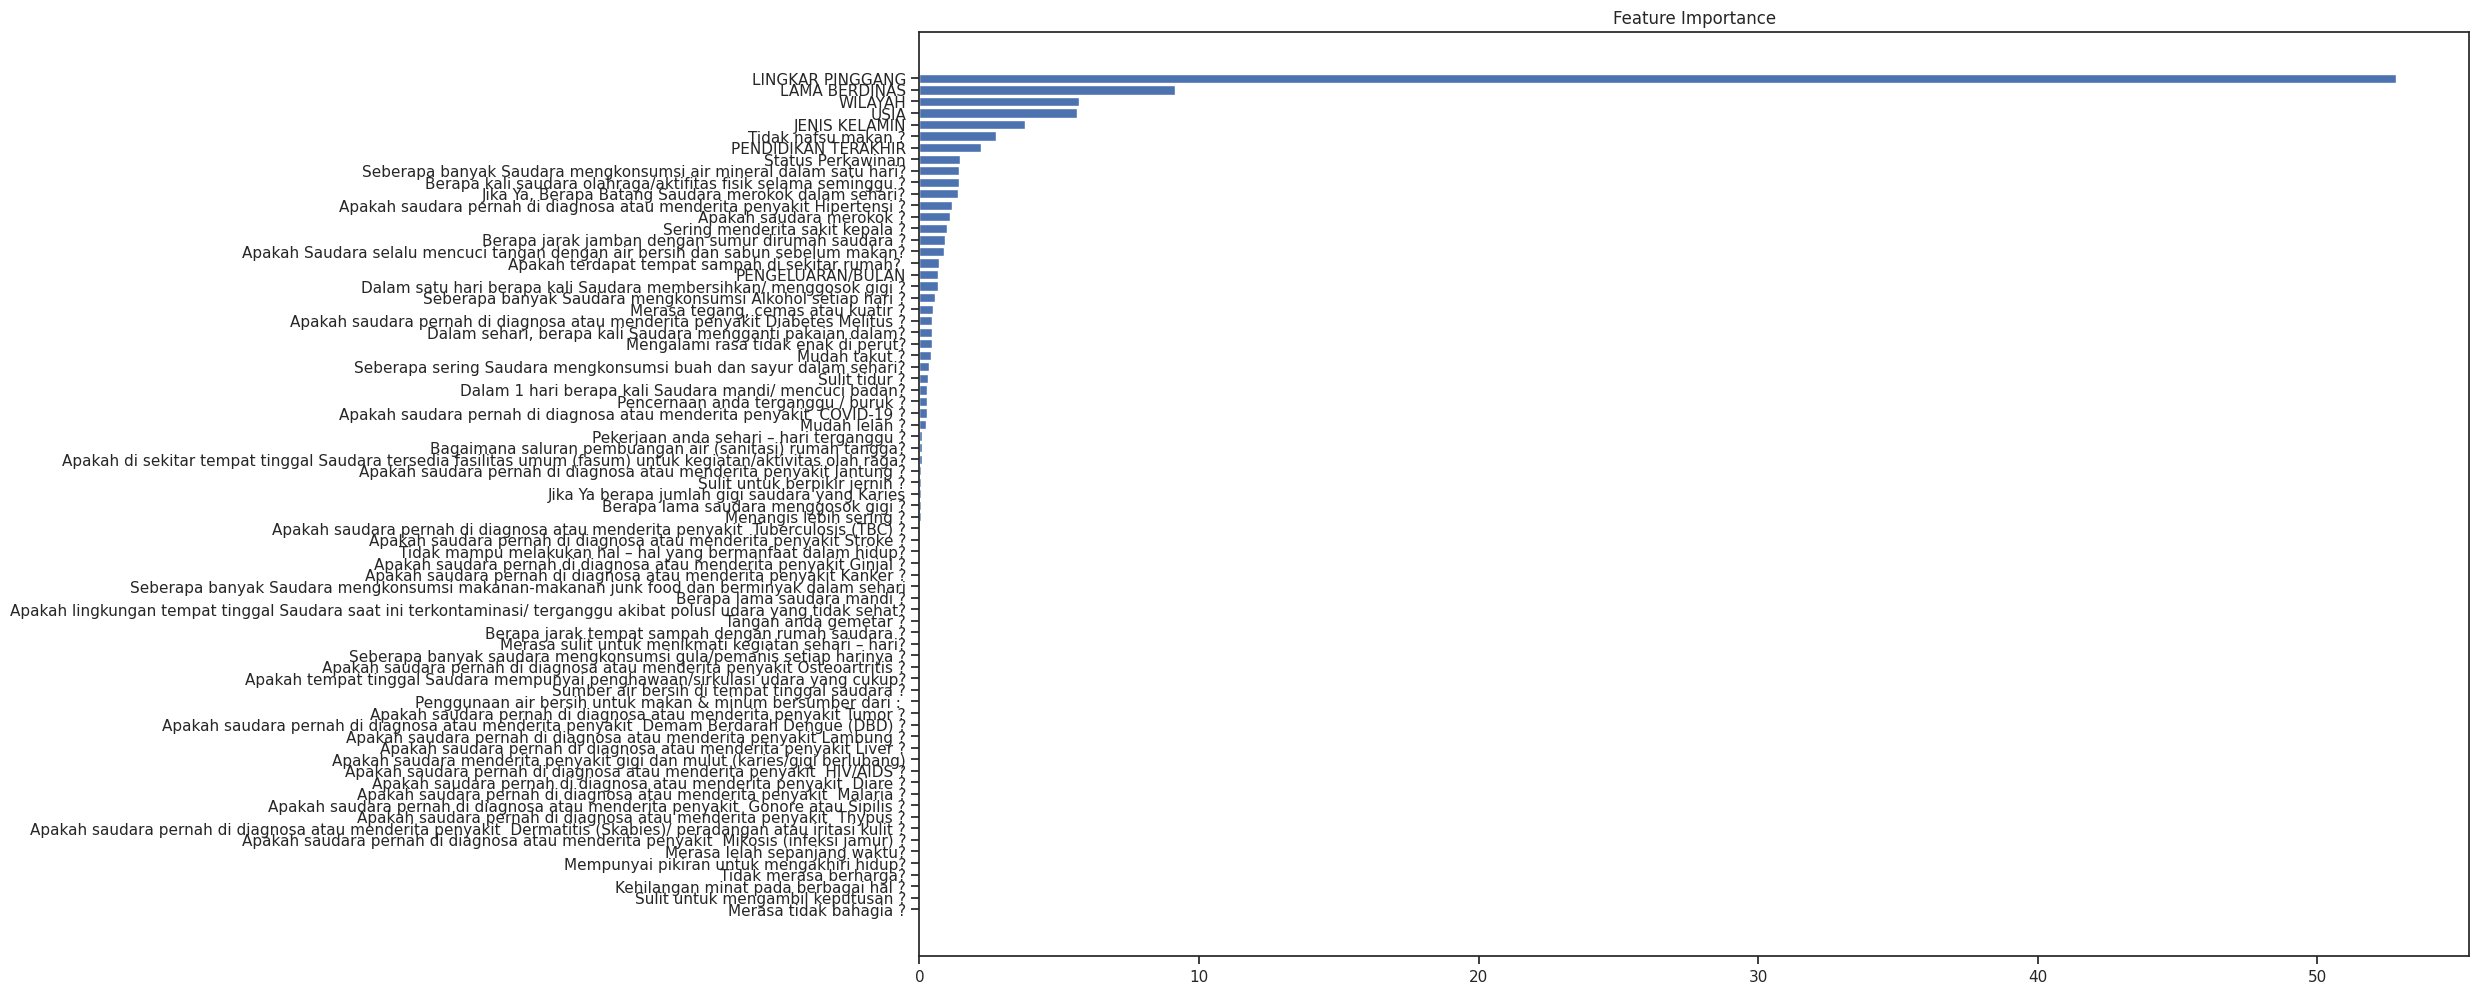

In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(x6_test.columns)[sorted_idx])
plt.title('Feature Importance')

Diperoleh bahwa variabel yang paling berkontribusi terhadap pengklasifikasian IMT adalah Lingkar Pinggang

# Kesimpulan

1. Semakin sehat mental seseorang, semakin rendah kecenderungannya untuk menjadi obesitas. Namun, semakin tinggi kecenderungannya untuk menjadi gemuk.
2. Seseorang yang merupakan perempuan, sudah menikah, pengeluaran/bulan > 15 juta, merokok,  minum > 25ml alkohol setiap hari, dan lebih tua, maka orang tersebuh akan memiliki odds kesehatan mental yang tinggi
3. Untuk seluruh variabel selain tinggi dan berat badan, variabel-variabel yang paling mempengaruhi Kategori IMT adalah lingkar pinggang, lama berdinas, wilayah, usia, jenis kelamin, tidak nafsu makan, dan pendidikan terakhir